# Part I: Data Exploration
We need to explore the dataset, find relationship between feature, discover how we should format or modify the dataset for the prediction analysis.

In [1]:
import numpy as np
import pandas
import seaborn

from matplotlib import pyplot as plt
from numpy import log1p

In [2]:
# Load dataset
data = pandas.read_csv('AmesHousing.csv', index_col="Order")

# Display dataset
data

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
Order,,,,,,,,,,,,,,,,,,,,,
1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000


### Data Preprocessingn
Quality Issues & Implementation Fixes

1. Handling Missing Values
LotFrontage (490 missing values)
Fix: Fill missing values using the median LotFrontage per neighborhood.
    
- Garage-related Features (GarageCars, GarageArea, GarageYrBlt, GarageType, etc.)
Fix: Replace missing values with 0 for numeric features and "None" for categorical.

- Basement Features (TotalBsmtSF, BsmtQual, BsmtCond, etc.)
Fix: Set numeric missing values to 0 and categorical ones to "None".
    
2. Handling Outliers
GrLivArea Outliers (Very large houses)
Fix: Remove outliers where GrLivArea > 4000 (identified in previous analysis).

3. Handling Skewed Data
Highly skewed features: SalePrice, LotArea, GrLivArea, TotalBsmtSF
Fix: Apply log transformation to normalize the distribution.

In [5]:
# Fill missing Lot Frontage values with the median per Neighborhood
data.loc[:, "Lot Frontage"] = data.groupby("Neighborhood")["Lot Frontage"].transform(lambda x: x.fillna(x.median()))

# Handle missing garage-related features
garage_features = ["Garage Cars", "Garage Area", "Garage Yr Blt", "Garage Type"]
for feature in garage_features:
    if data[feature].dtype == "object":
        data.loc[:, feature] = data[feature].fillna("None")
    else:
        data.loc[:, feature] = data[feature].fillna(0)

# Handle missing basement-related features
basement_features = ["Total Bsmt SF", "Bsmt Qual", "Bsmt Cond", "Bsmt Exposure"]
for feature in basement_features:
    if data[feature].dtype == "object":
        data.loc[:, feature] = data[feature].fillna("None")
    else:
        data.loc[:, feature] = data[feature].fillna(0)

# Remove extreme outliers in GrLivArea (above 4000 sqft)
data = data[data["Gr Liv Area"] < 4000].copy()

# Apply log transformation to normalize highly skewed features
skewed_features = ["SalePrice", "Lot Area", "Gr Liv Area", "Total Bsmt SF"]
for feature in skewed_features:
    data.loc[:, feature] = log1p(data[feature])


In [6]:
#Check the data preprocessing
data.info()  # Check if missing values are gone
data.describe()  # Ensure transformations were applied

<class 'pandas.core.frame.DataFrame'>
Index: 2925 entries, 1 to 2930
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2925 non-null   int64  
 1   MS SubClass      2925 non-null   int64  
 2   MS Zoning        2925 non-null   object 
 3   Lot Frontage     2922 non-null   float64
 4   Lot Area         2925 non-null   float64
 5   Street           2925 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2925 non-null   object 
 8   Land Contour     2925 non-null   object 
 9   Utilities        2925 non-null   object 
 10  Lot Config       2925 non-null   object 
 11  Land Slope       2925 non-null   object 
 12  Neighborhood     2925 non-null   object 
 13  Condition 1      2925 non-null   object 
 14  Condition 2      2925 non-null   object 
 15  Bldg Type        2925 non-null   object 
 16  House Style      2925 non-null   object 
 17  Overall Qual     29

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2.925000e+03,2925.000000,2922.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2902.000000,2924.000000,...,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000
mean,7.143931e+08,57.396581,69.297741,2.310257,6.088205,5.563761,1971.302906,1984.234188,100.710544,438.097469,...,93.392137,47.166838,23.050940,2.596923,16.029402,1.893333,44.909744,6.216752,2007.791453,2.565990
std,1.887274e+08,42.668752,21.142528,0.051425,1.402953,1.112262,30.242474,20.861774,176.034290,438.032289,...,126.034142,66.571810,64.186809,25.162589,56.131397,32.964272,472.237990,2.711541,1.317408,0.031266
min,5.263011e+08,20.000000,21.000000,2.100578,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,2.347216
25%,5.284770e+08,20.000000,60.000000,2.293997,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,2.547212
50%,5.354532e+08,50.000000,70.000000,2.317626,6.000000,5.000000,1973.000000,1993.000000,0.000000,369.500000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,2.563636
75%,9.071801e+08,70.000000,80.000000,2.337131,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.250000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,2.585611
max,1.007100e+09,190.000000,313.000000,2.586224,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2288.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,15500.000000,12.000000,2010.000000,2.663437


In [7]:
# Function to map categorical features to int
def generate_ordinal_encoding(column):
    values = column.unique()
    mapping = {i: values[i] for i in range(len(values))}
    return mapping

def generate_ordinal_encoding_for_all_columns(dataset):
    encoding = {}
    for column in dataset.columns:
        if dataset[column].dtype == object:
            encoding[column] = generate_ordinal_encoding(dataset[column])
    return encoding

def apply_ordinal_encoding_to_all_columns(dataset, columns_dict):
    for column in columns_dict:
        dataset[column] = dataset[column].map({v: k for k, v in columns_dict[column].items()})

def apply_onehot_encoding(column):
    encoding = {}
    for feature in column.unique():
        encoding[feature] = column.apply(lambda x: x == feature)
    return pandas.DataFrame(encoding, index=column.index)

# Function to draw correlation matrix
def draw_correlation_matrix(dataset, figsize=None, title="Correlation Heatmap"):
    if figsize:
        plt.figure(figsize=figsize)
    seaborn.heatmap(dataset.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)
    plt.title(title)
    plt.show()

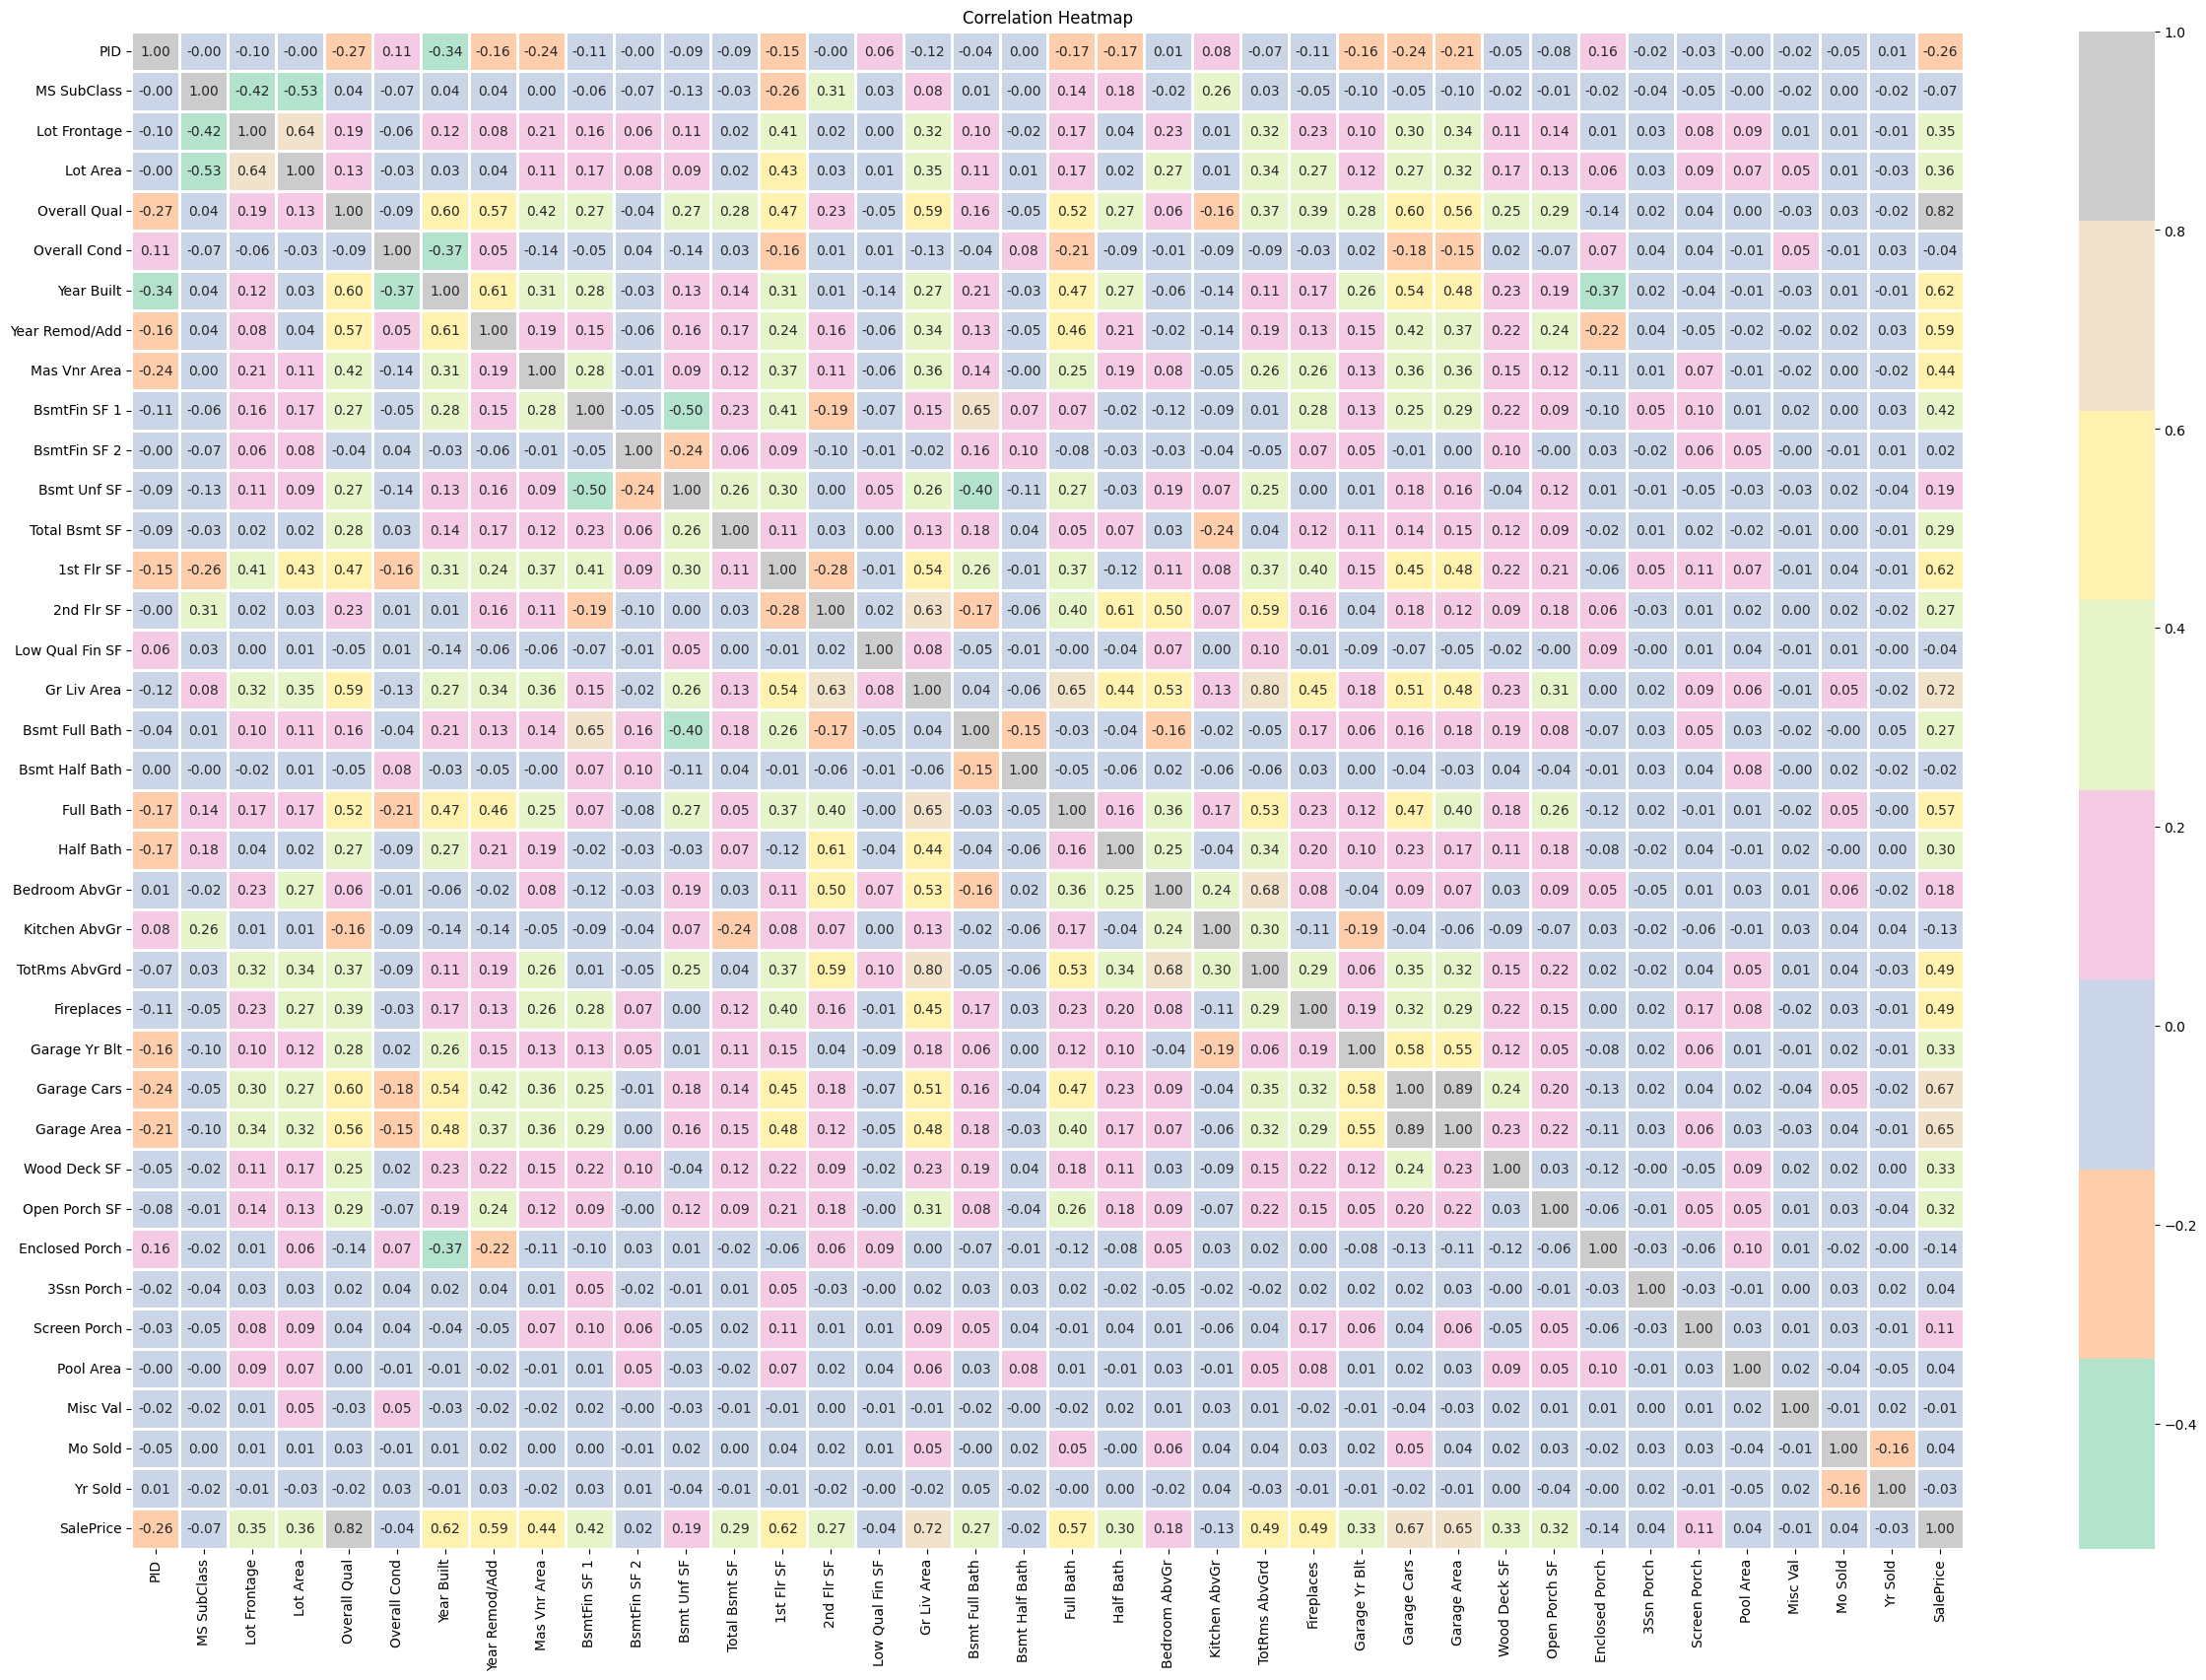

In [8]:
# Draw correlation matrix for numerical features
draw_correlation_matrix(data.select_dtypes(include=[np.number]), figsize=(30, 20))

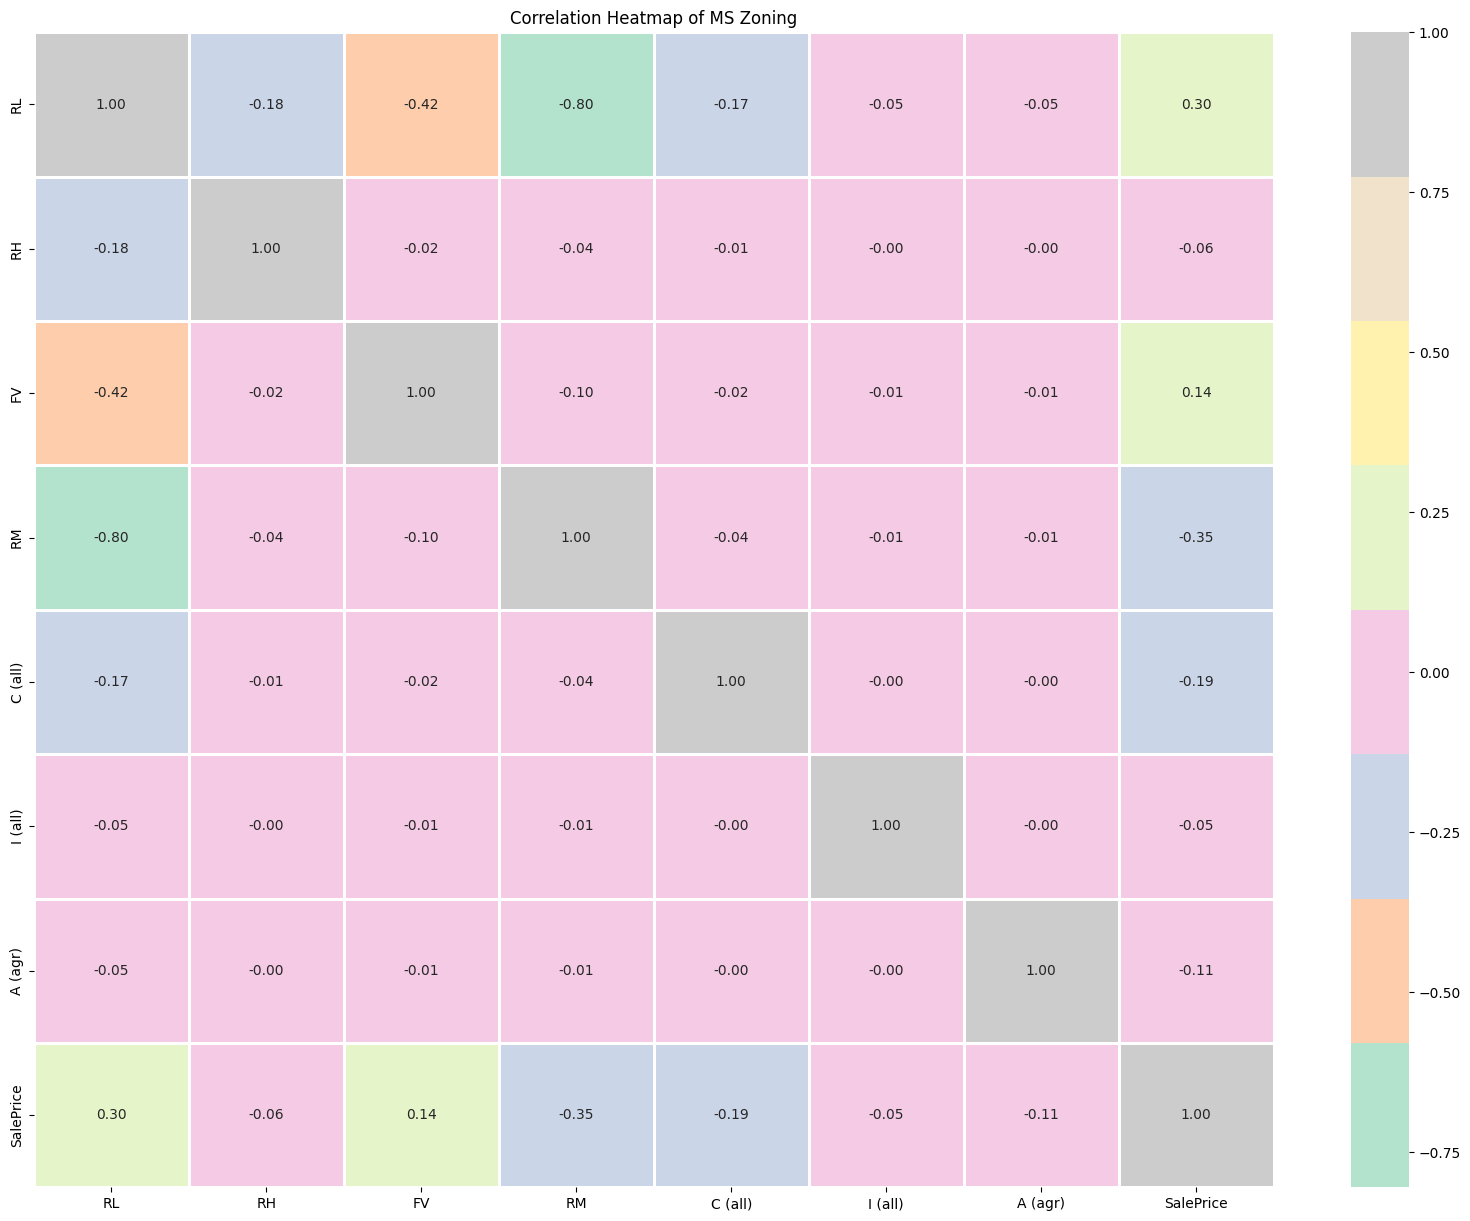

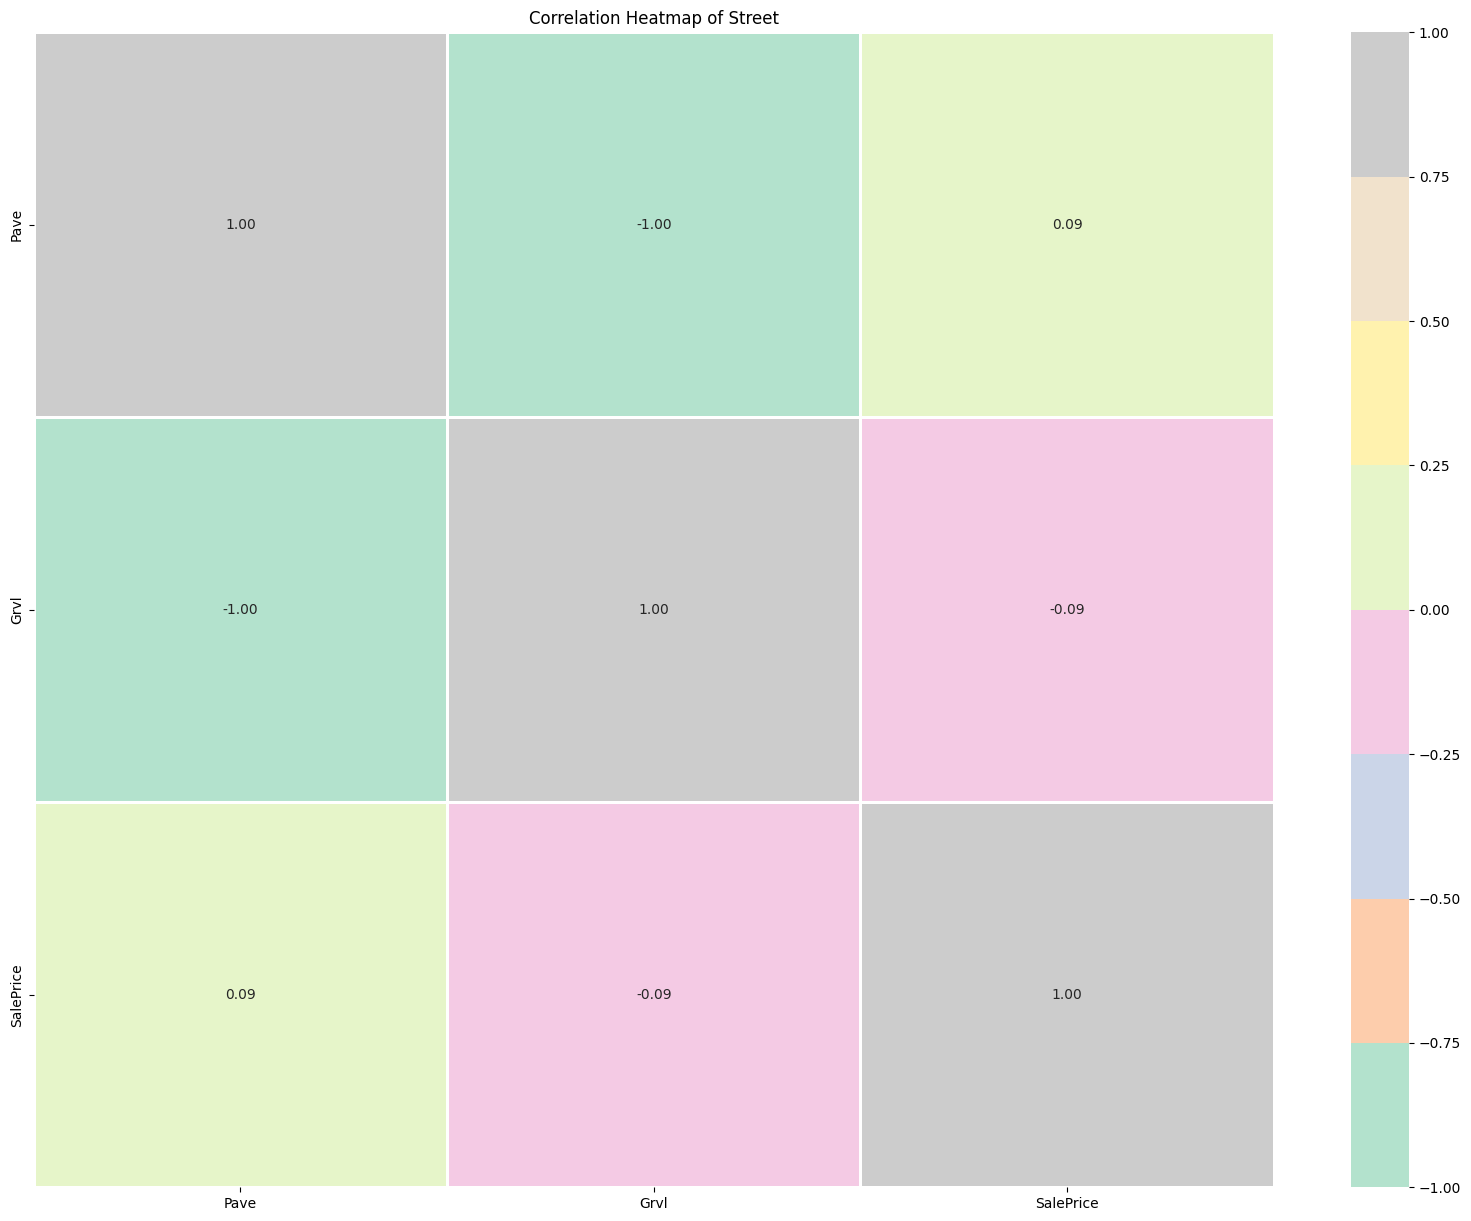

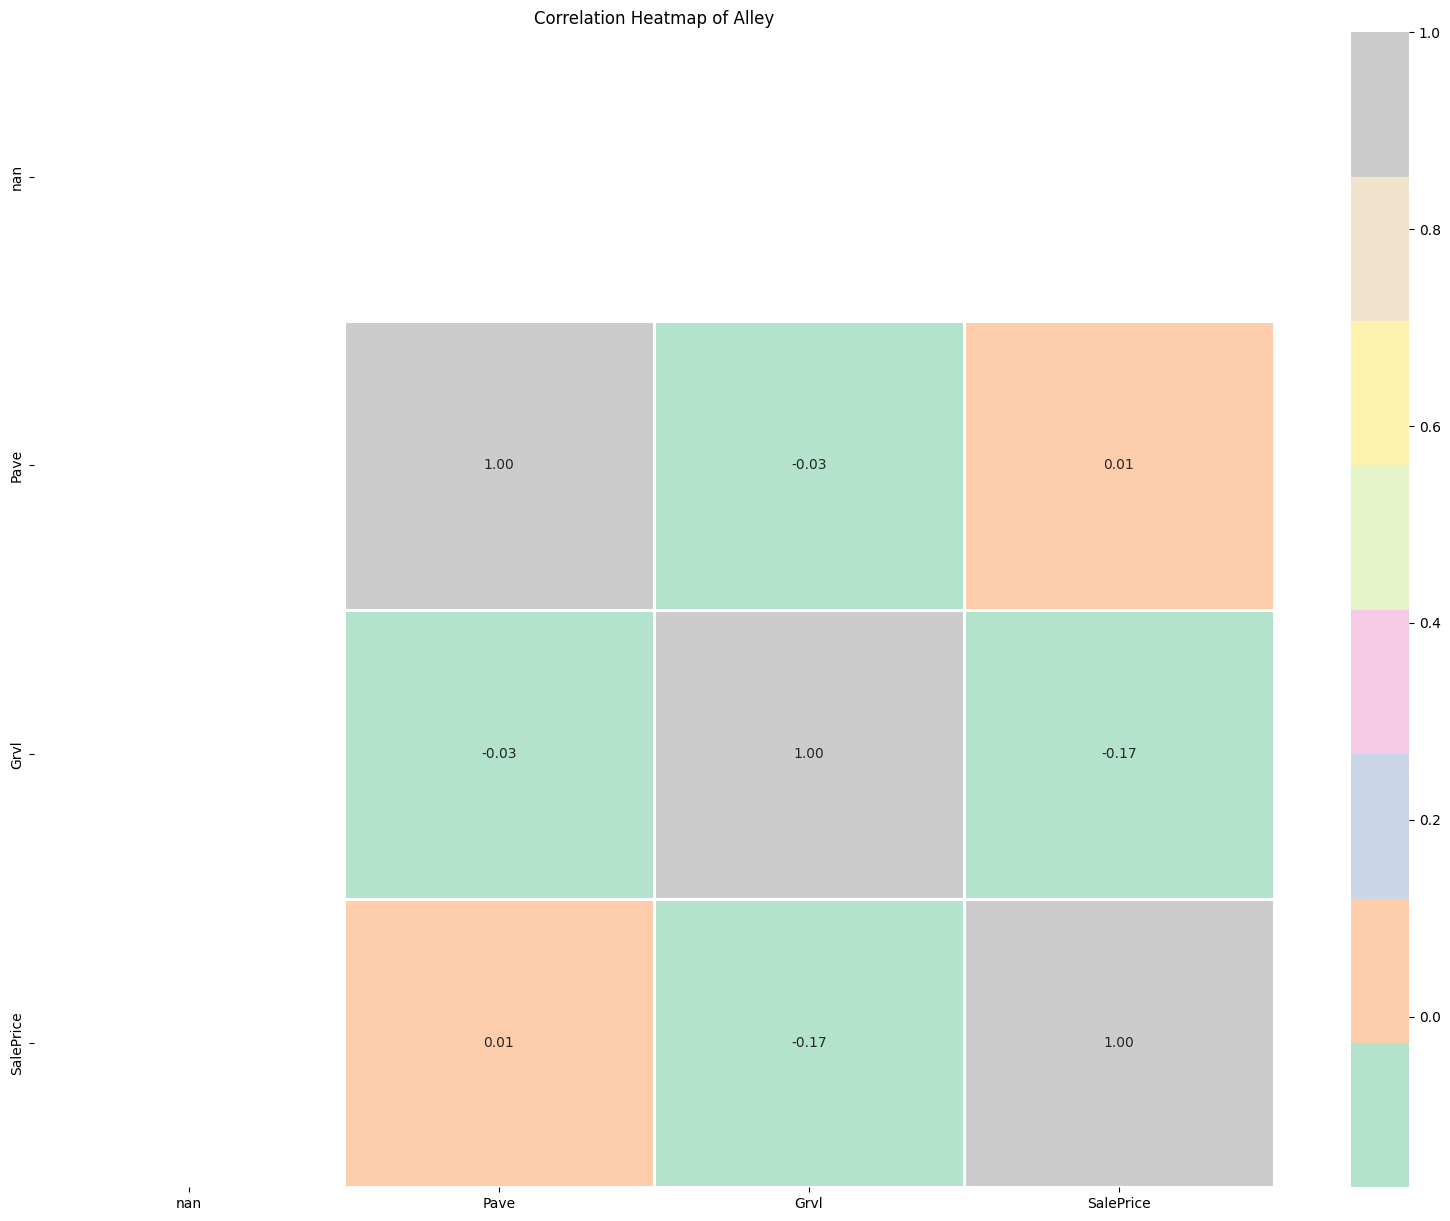

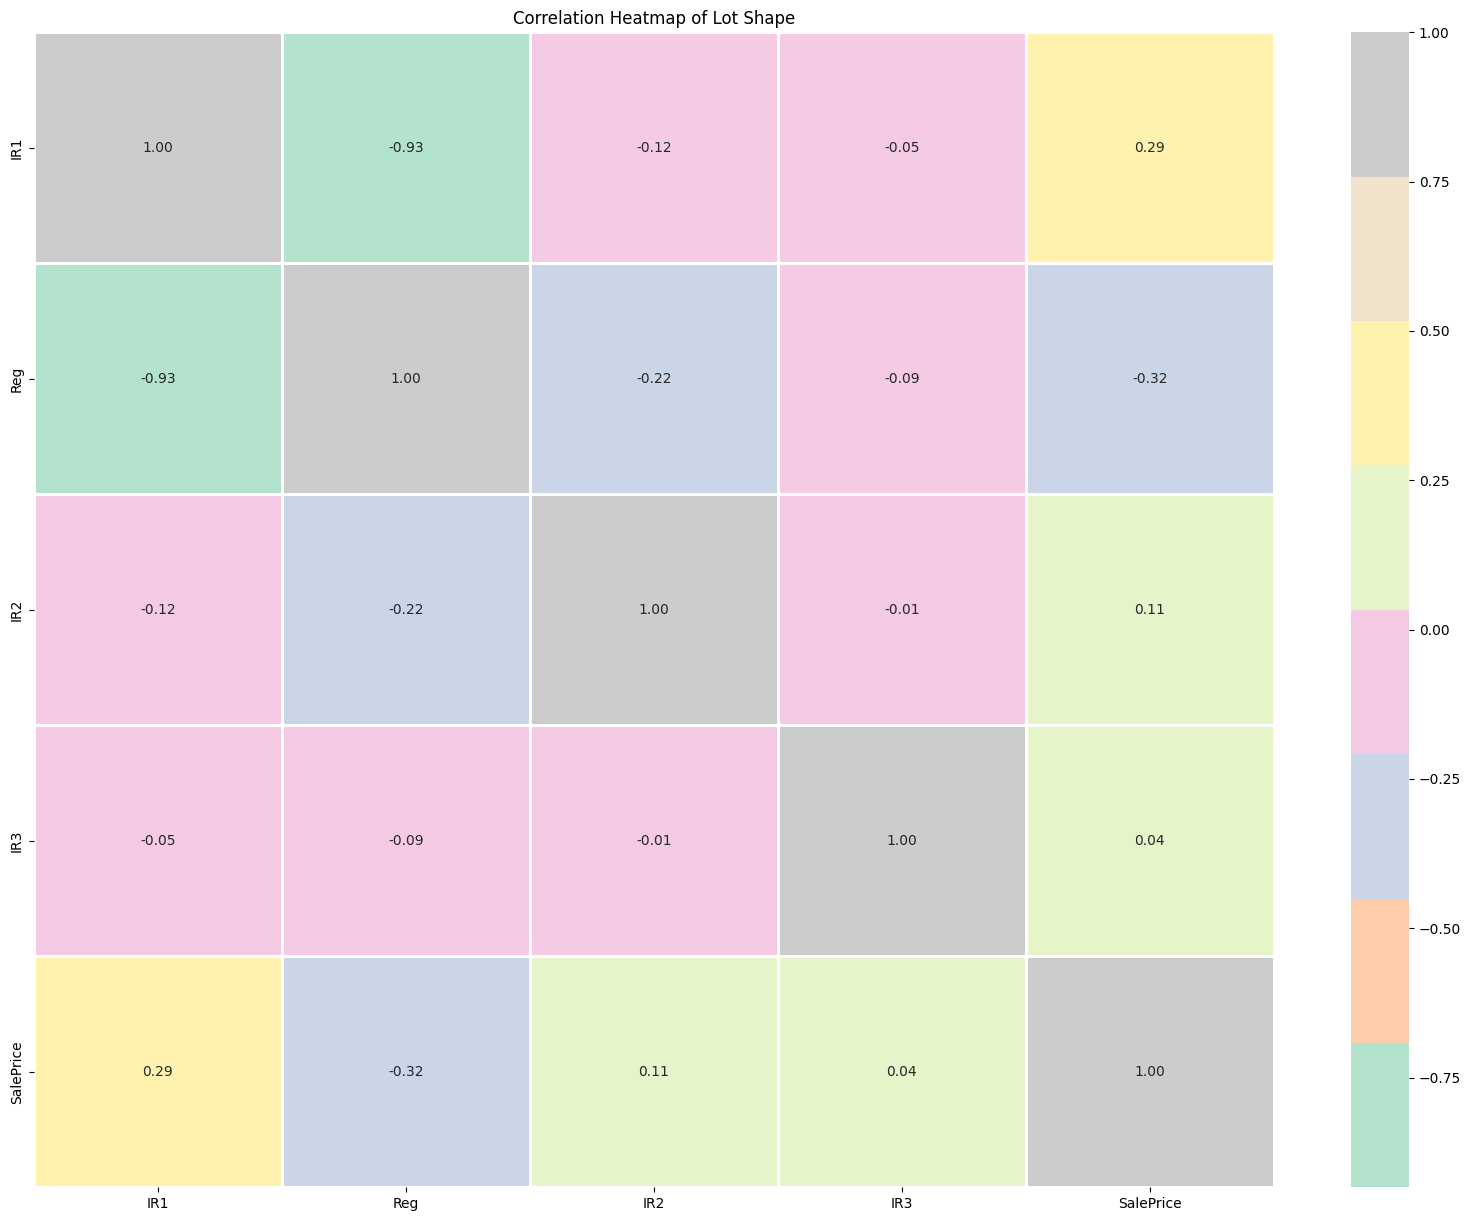

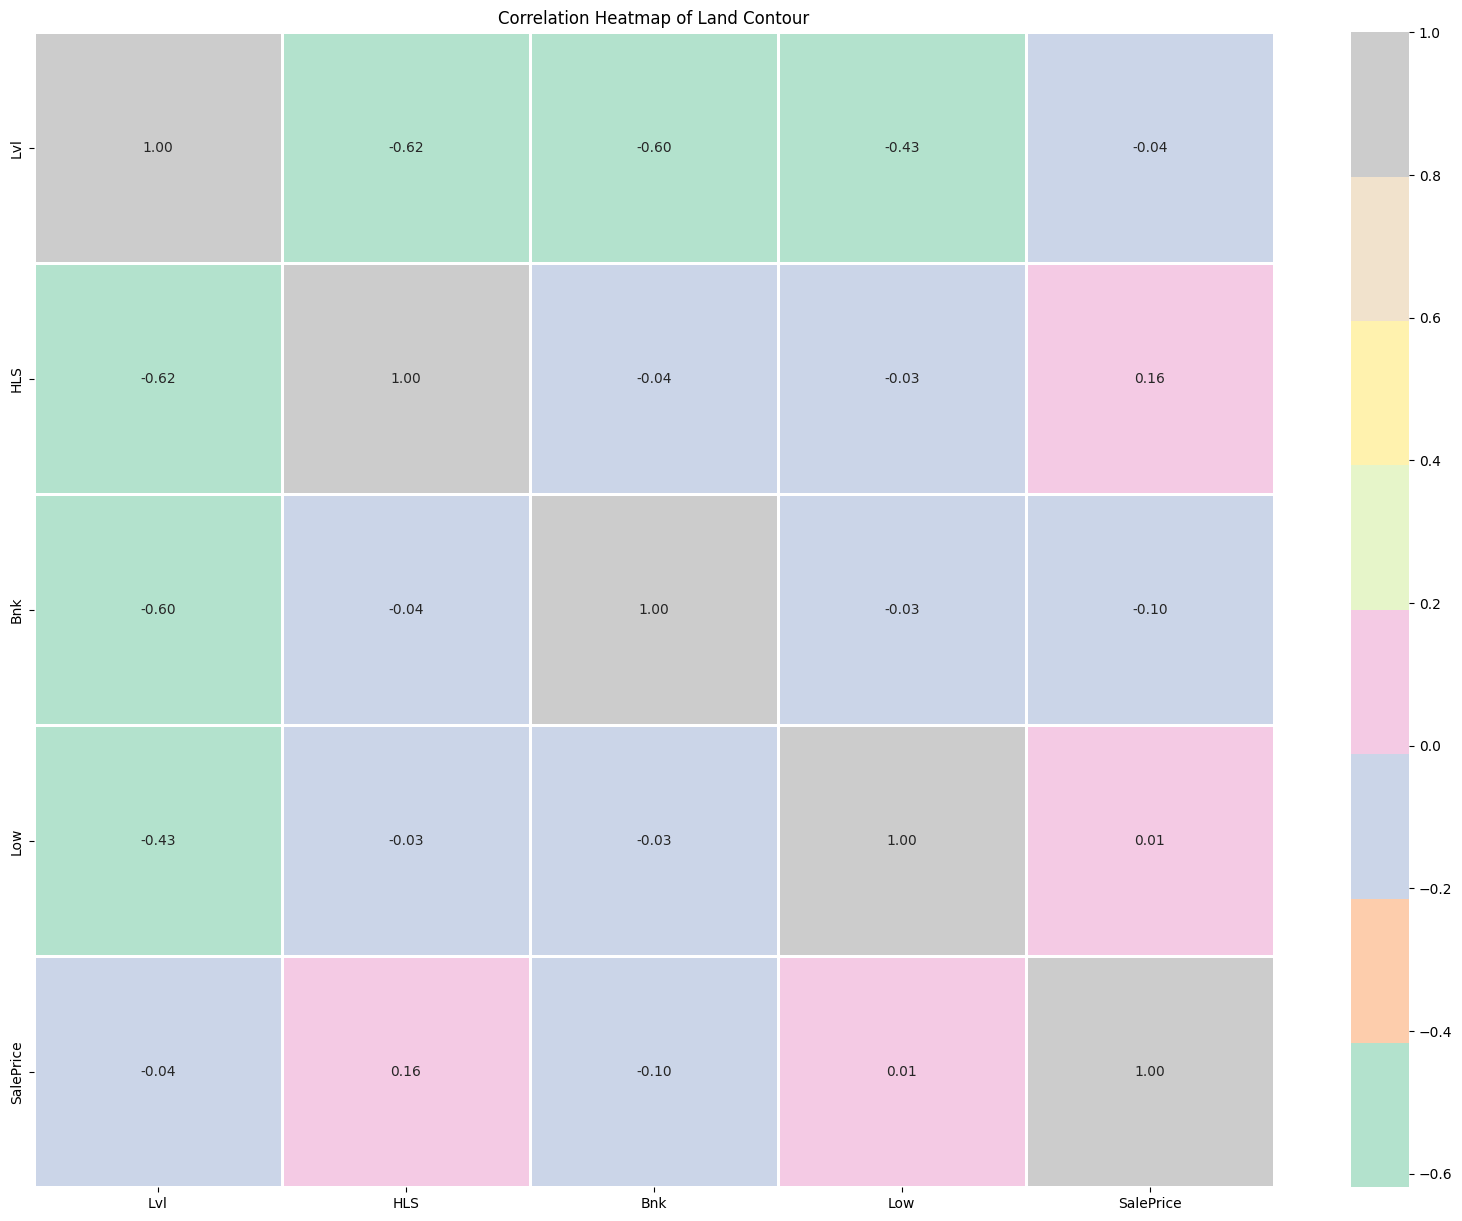

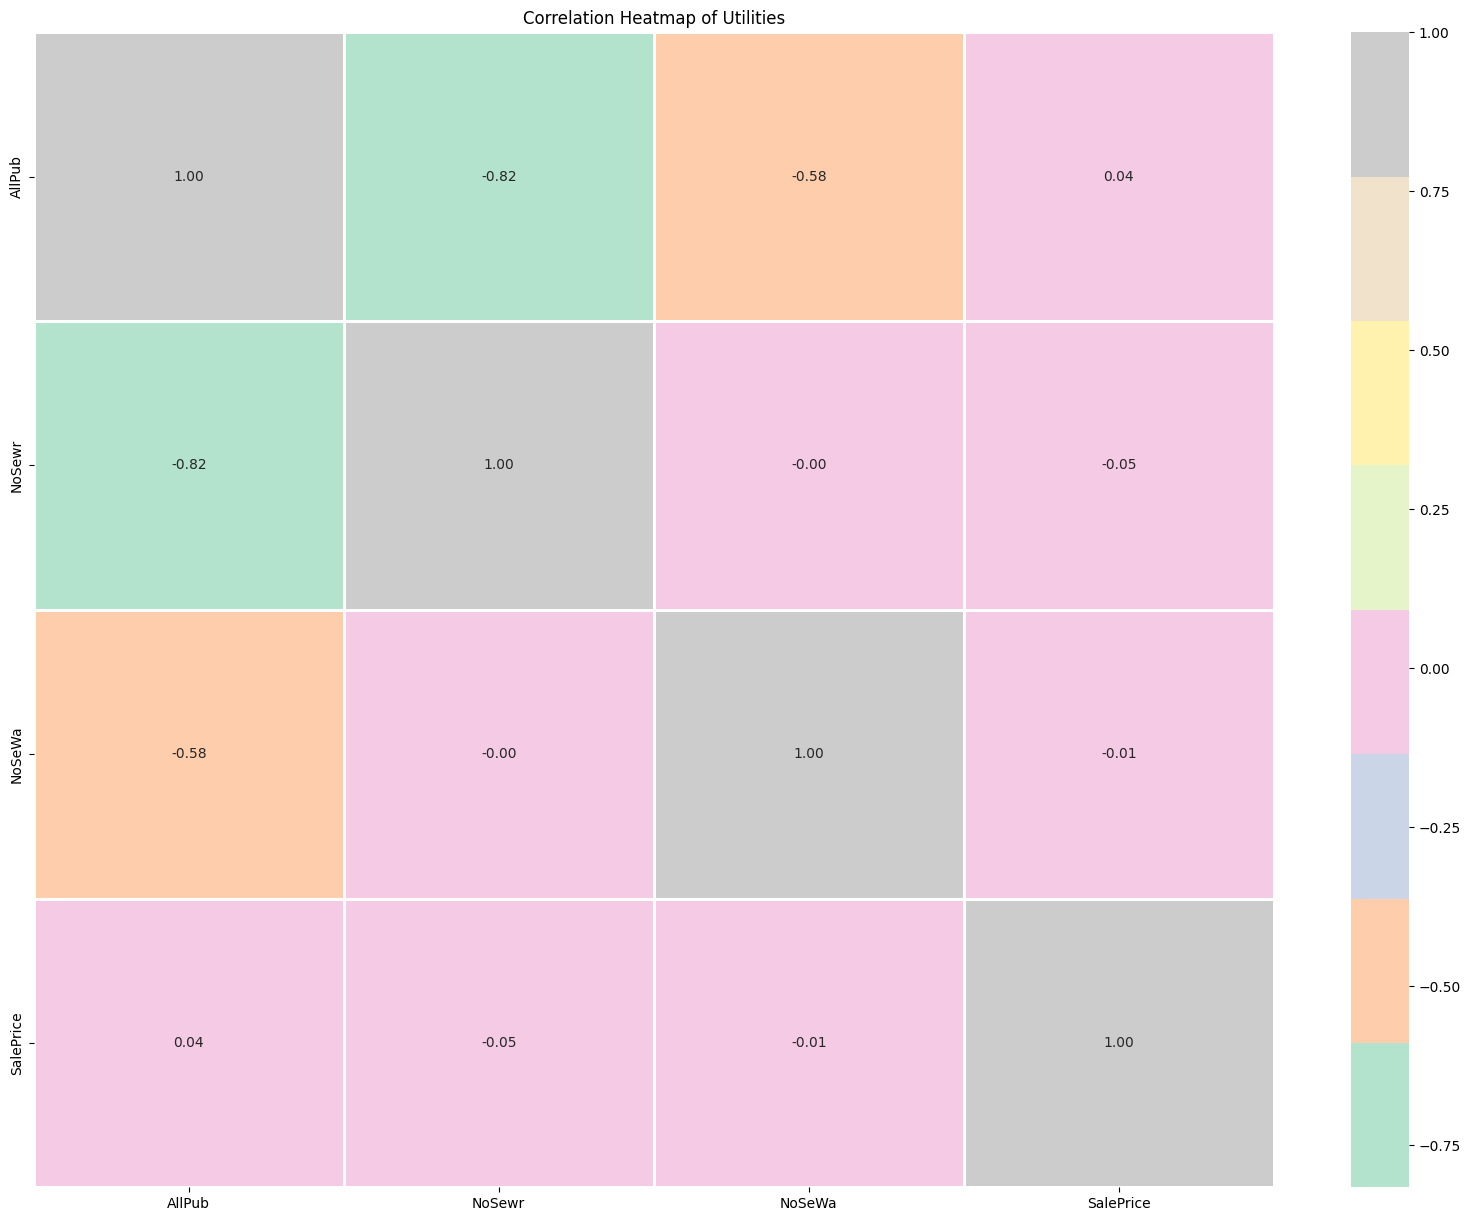

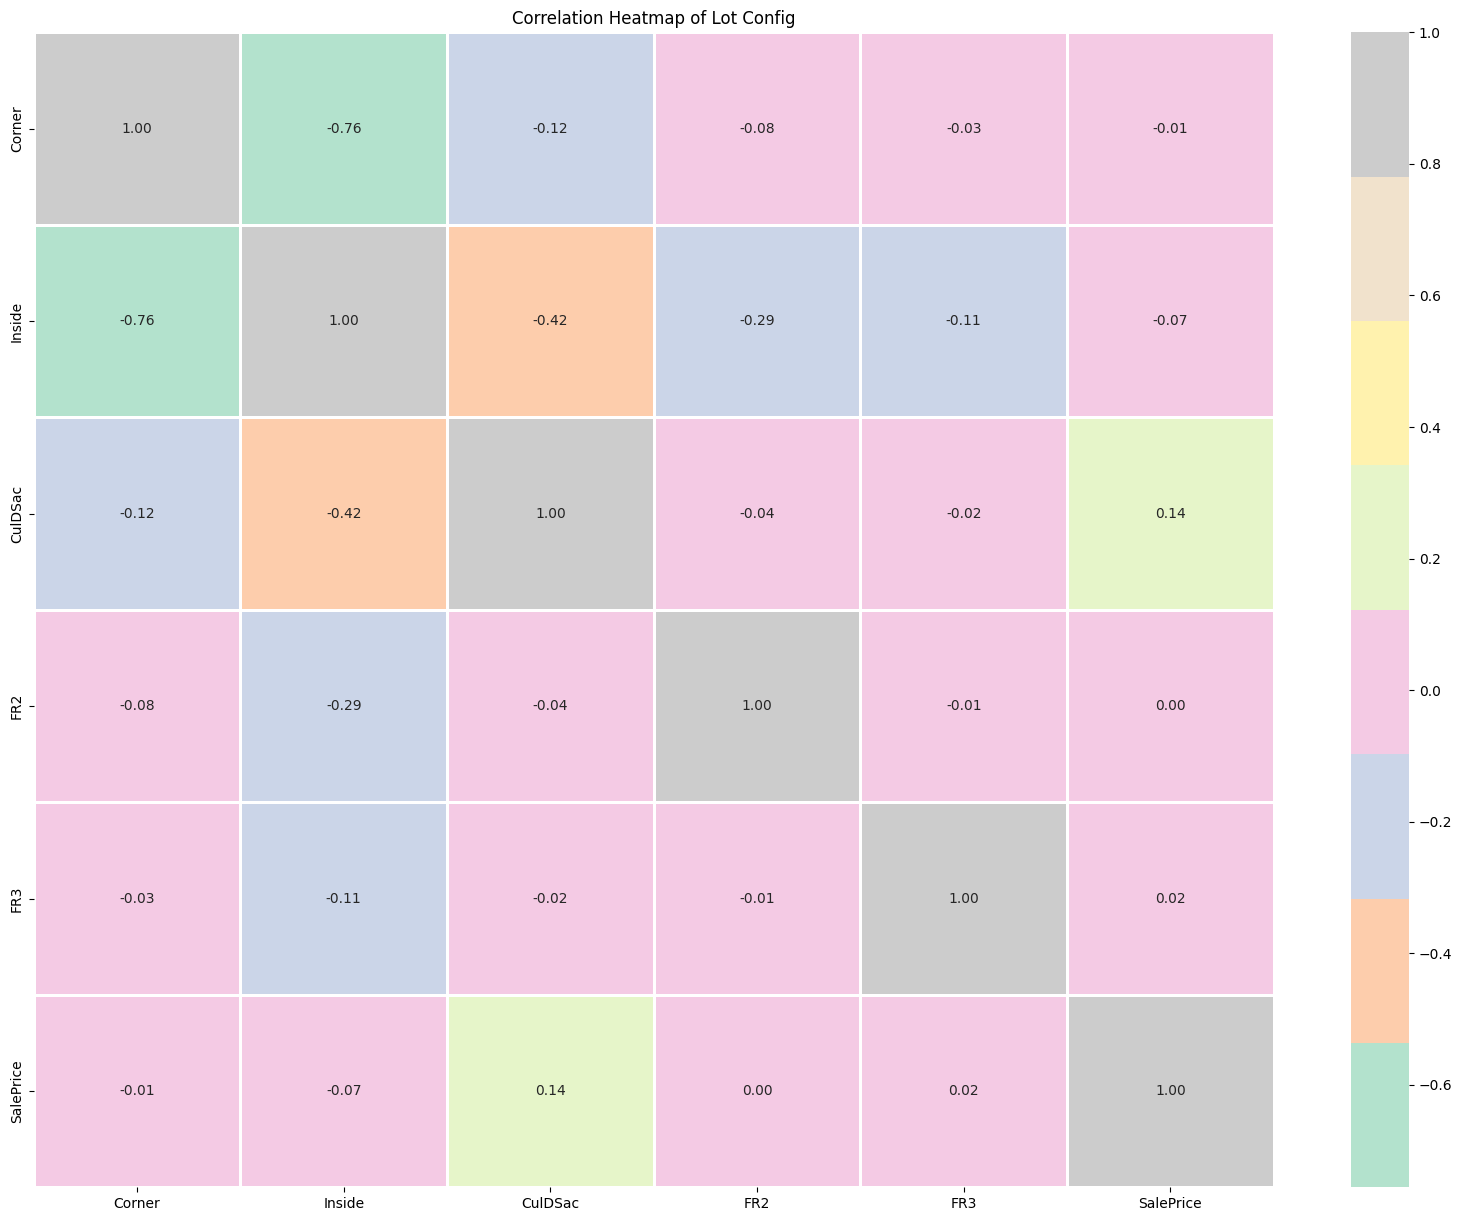

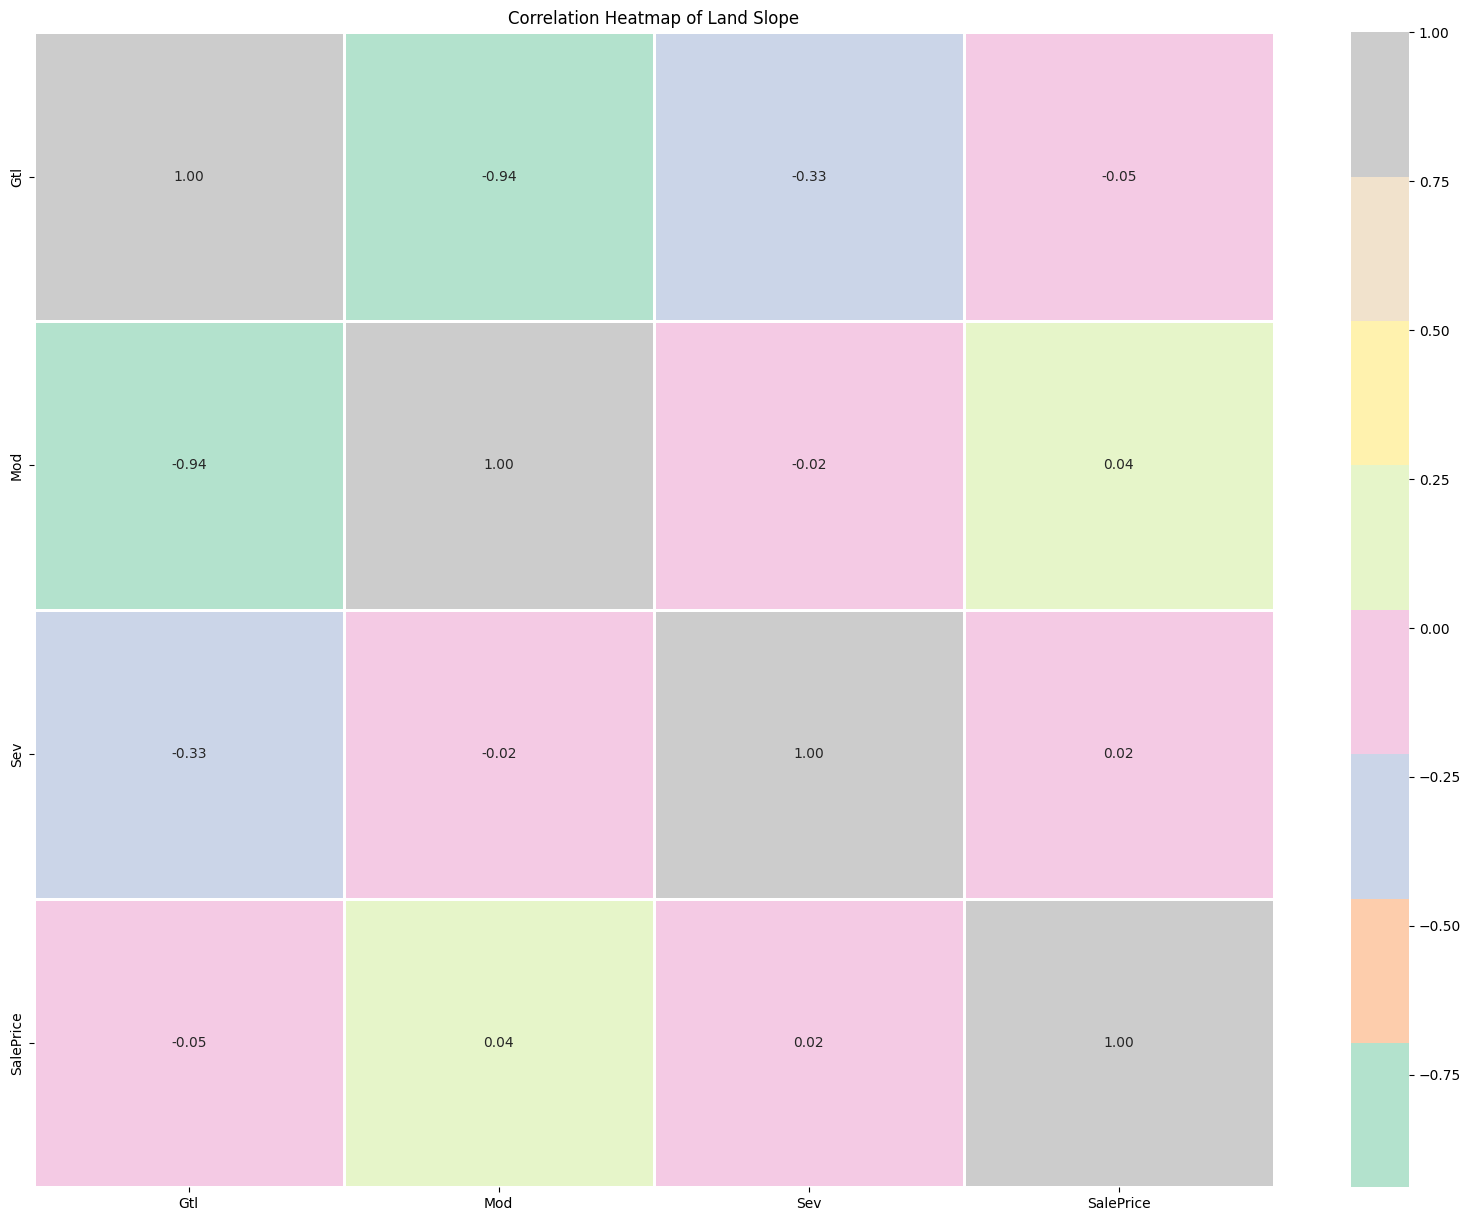

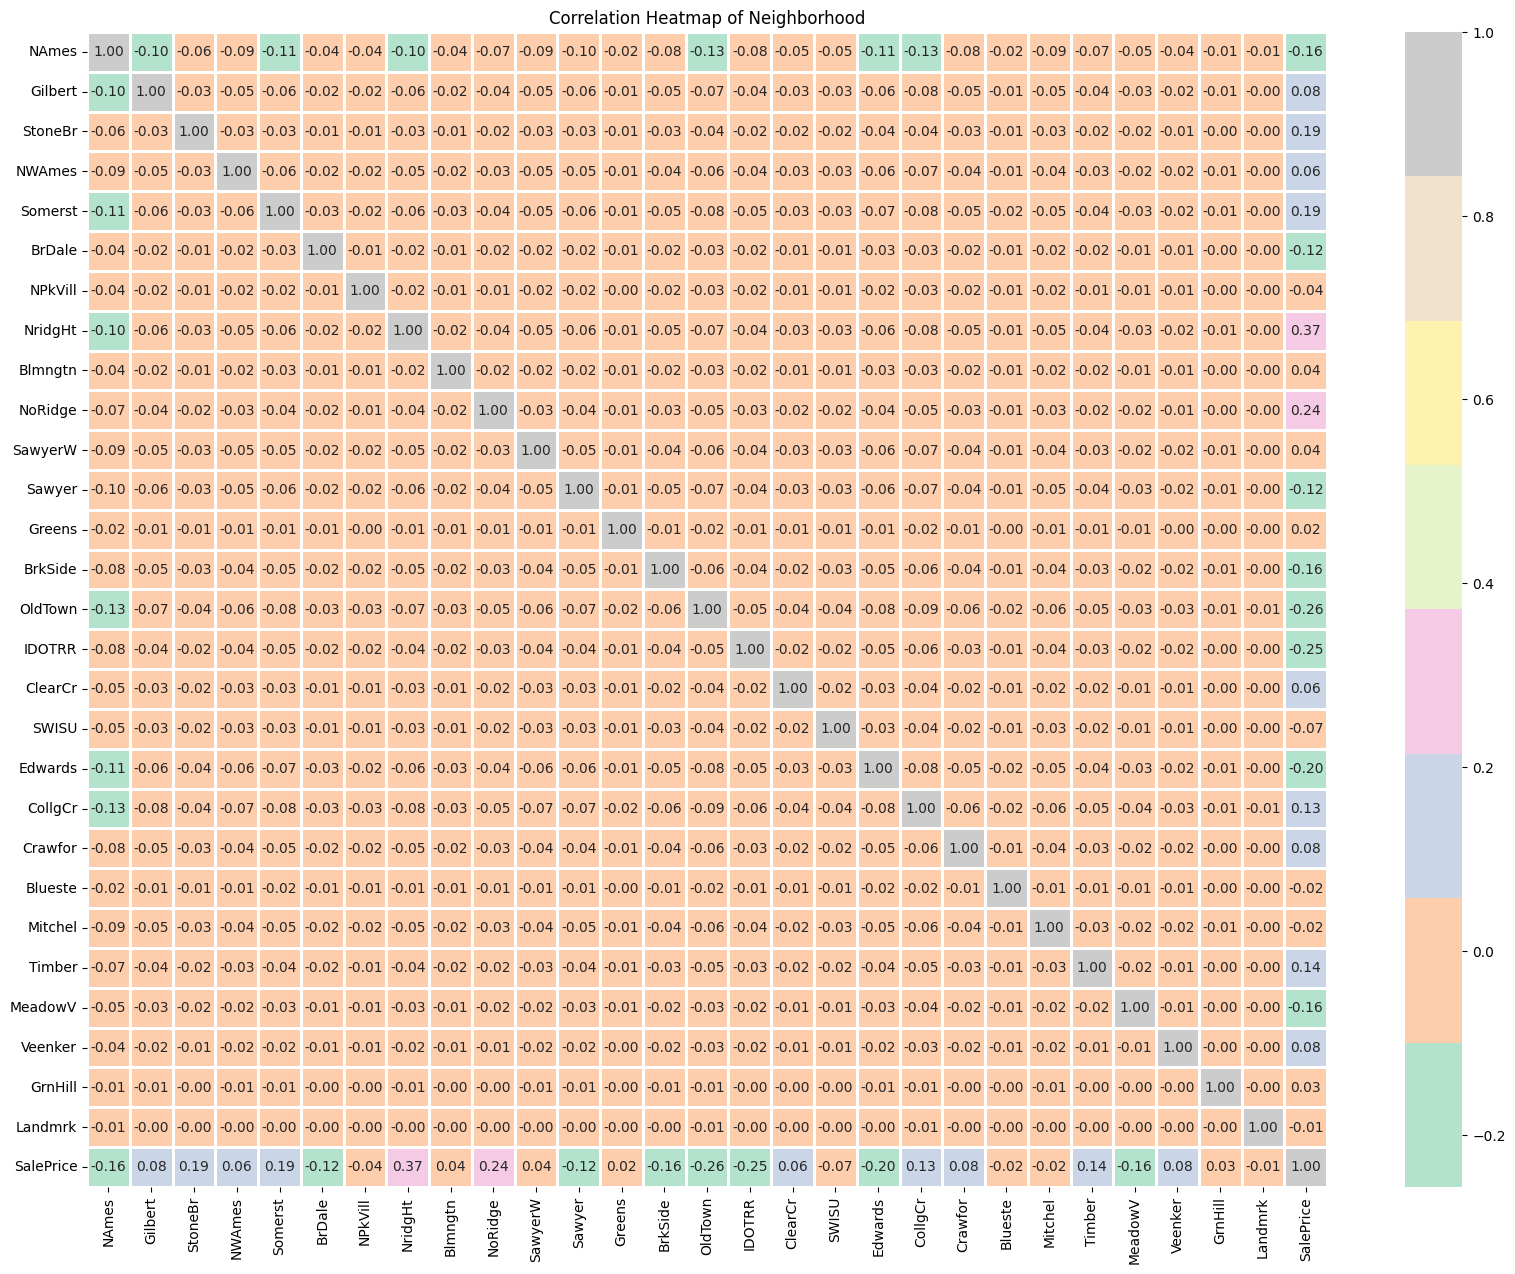

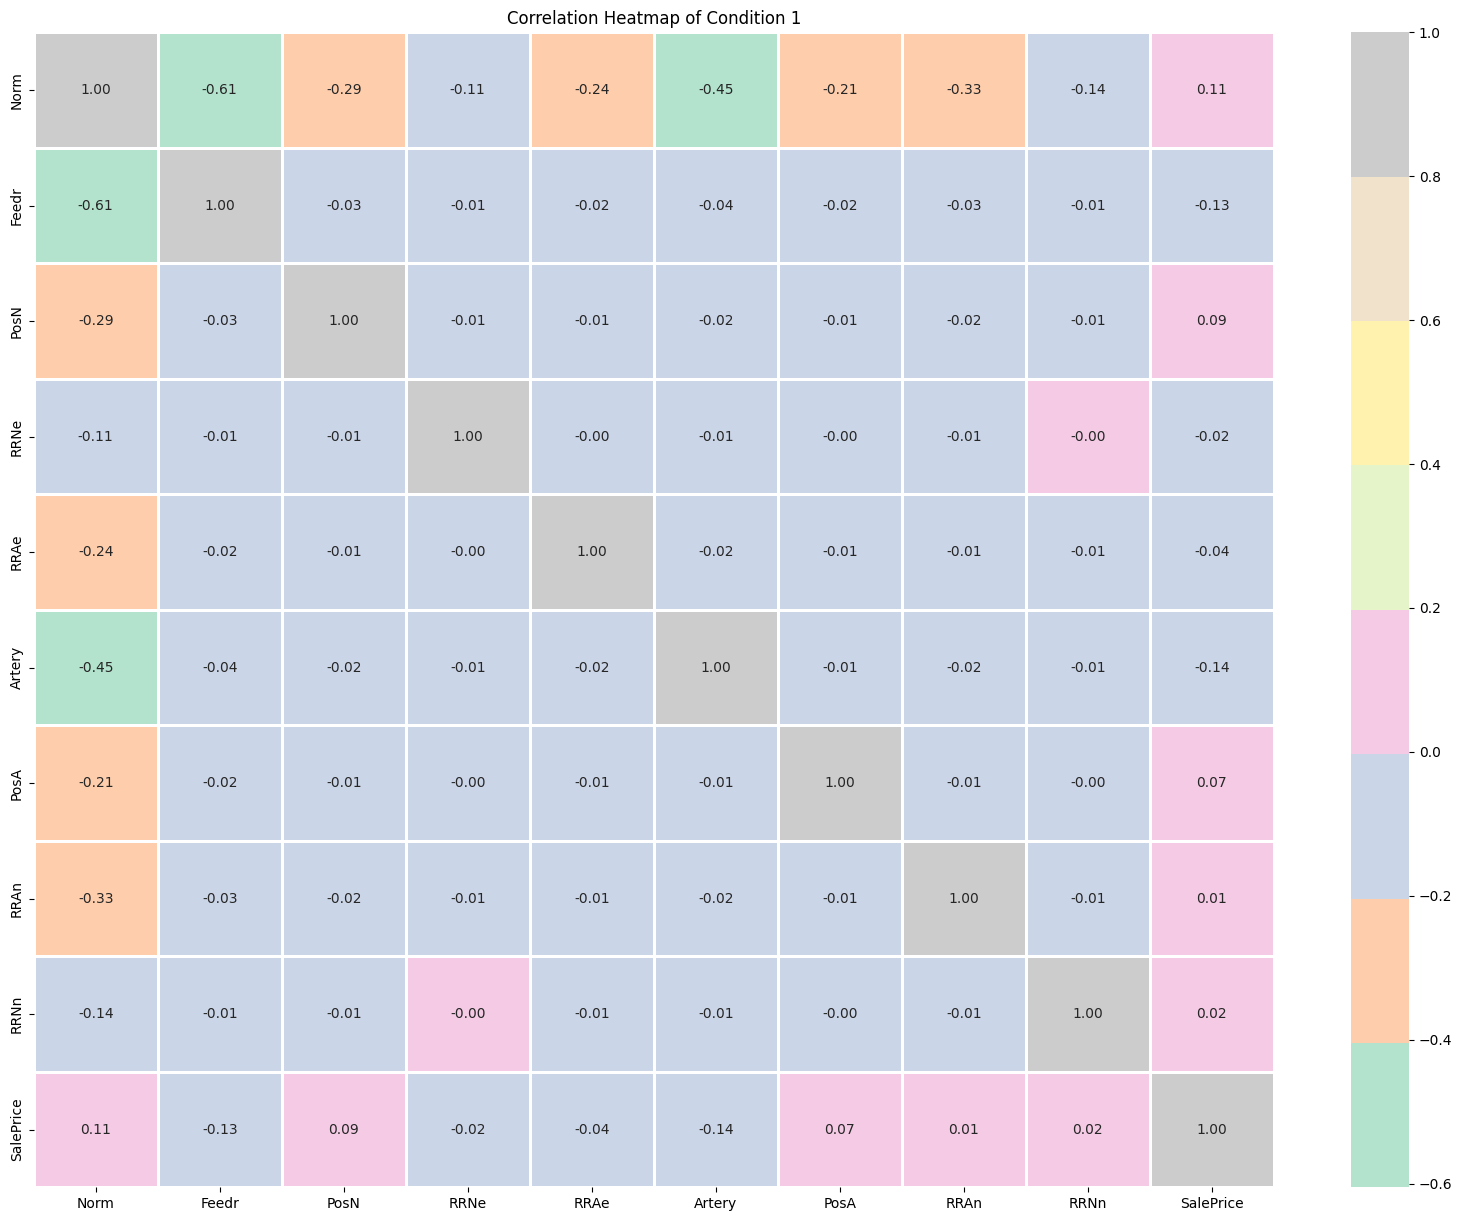

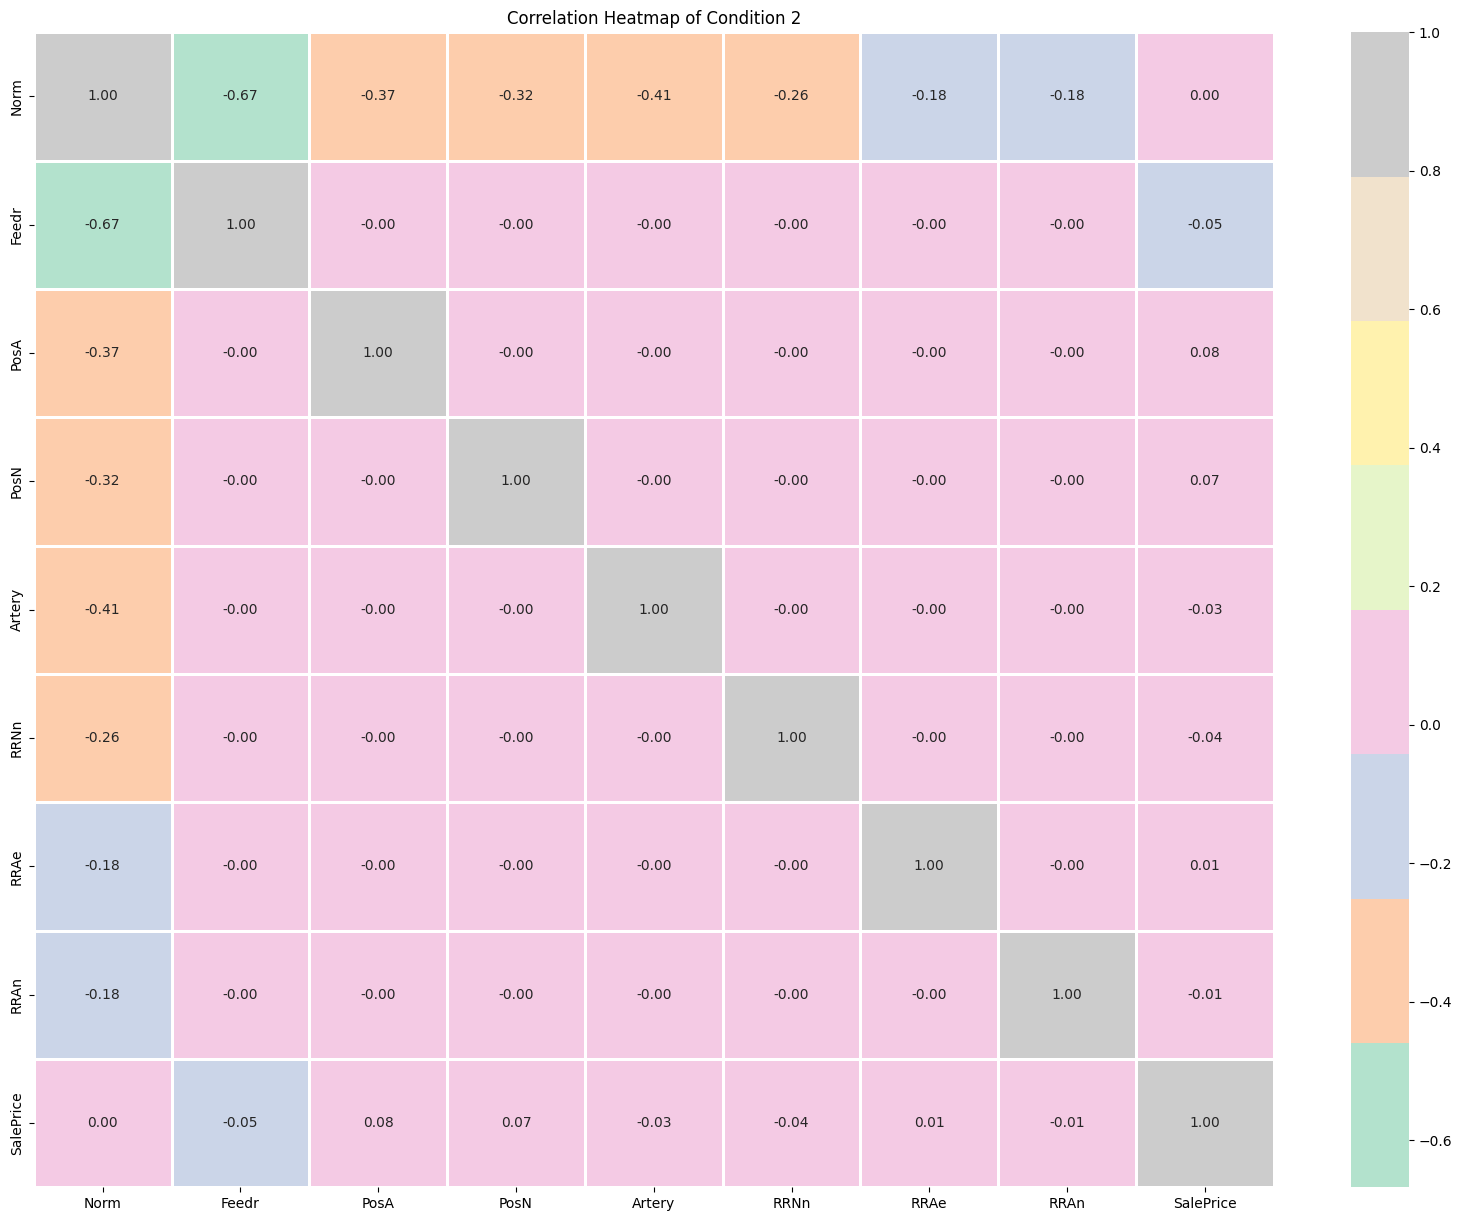

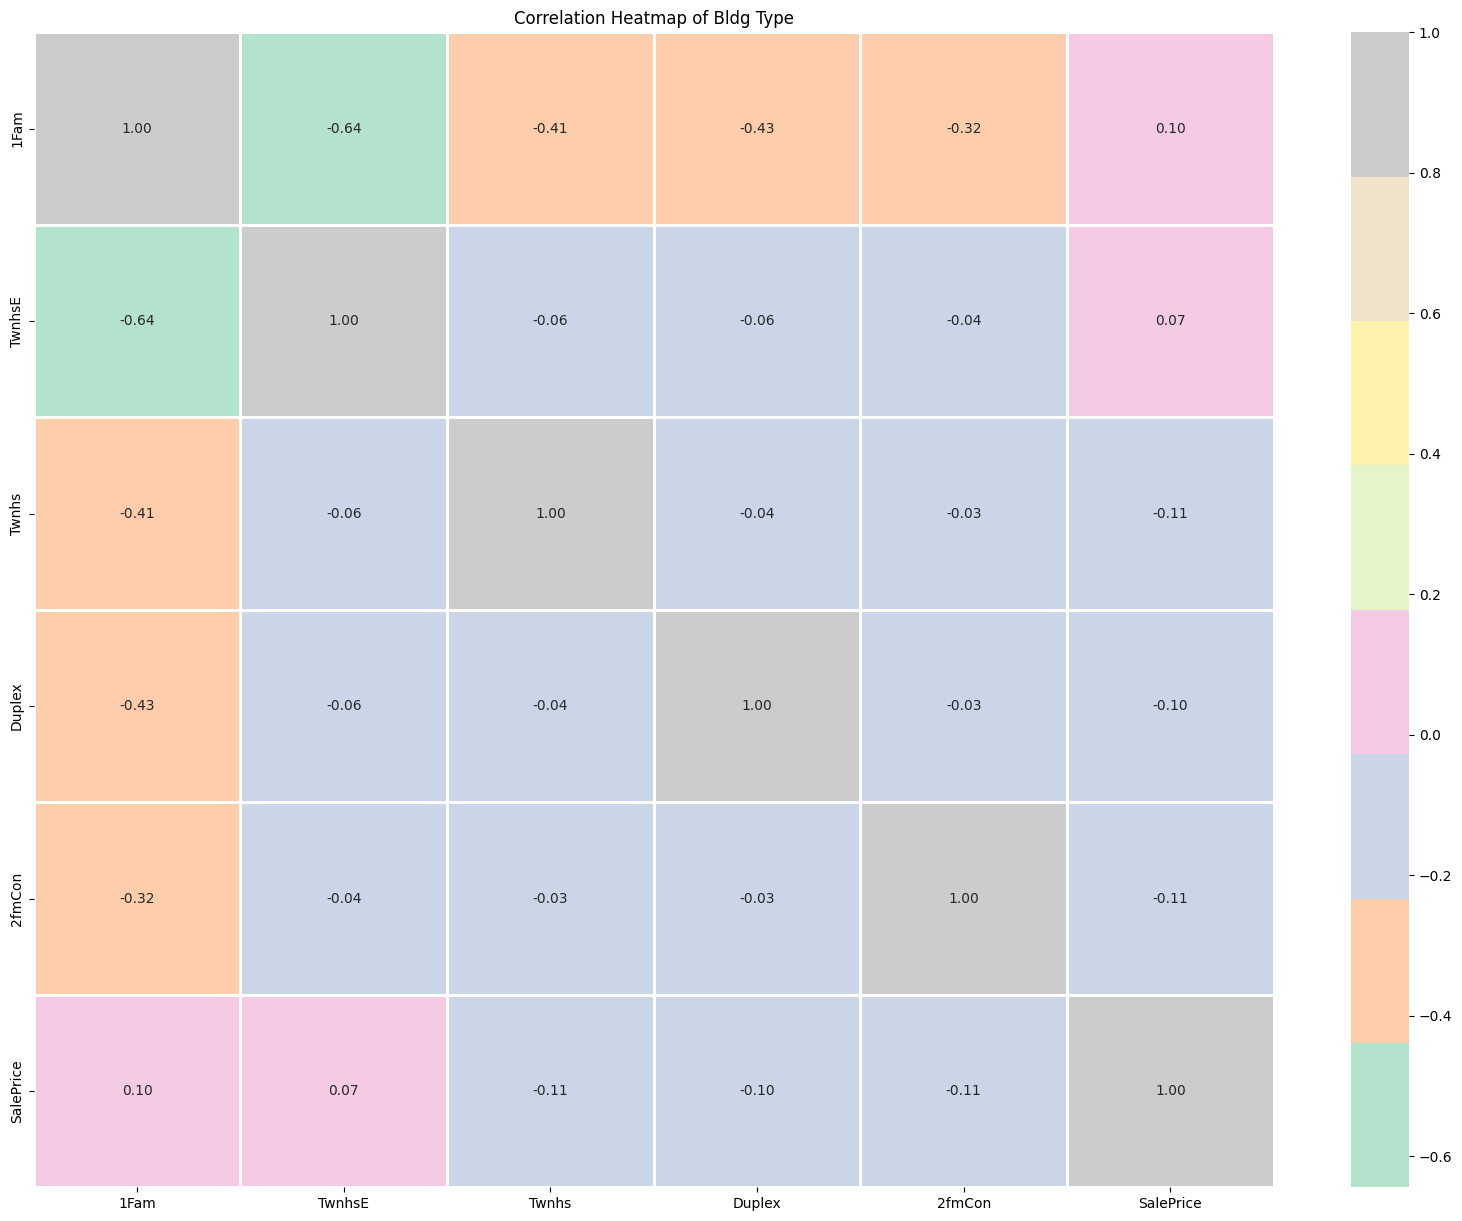

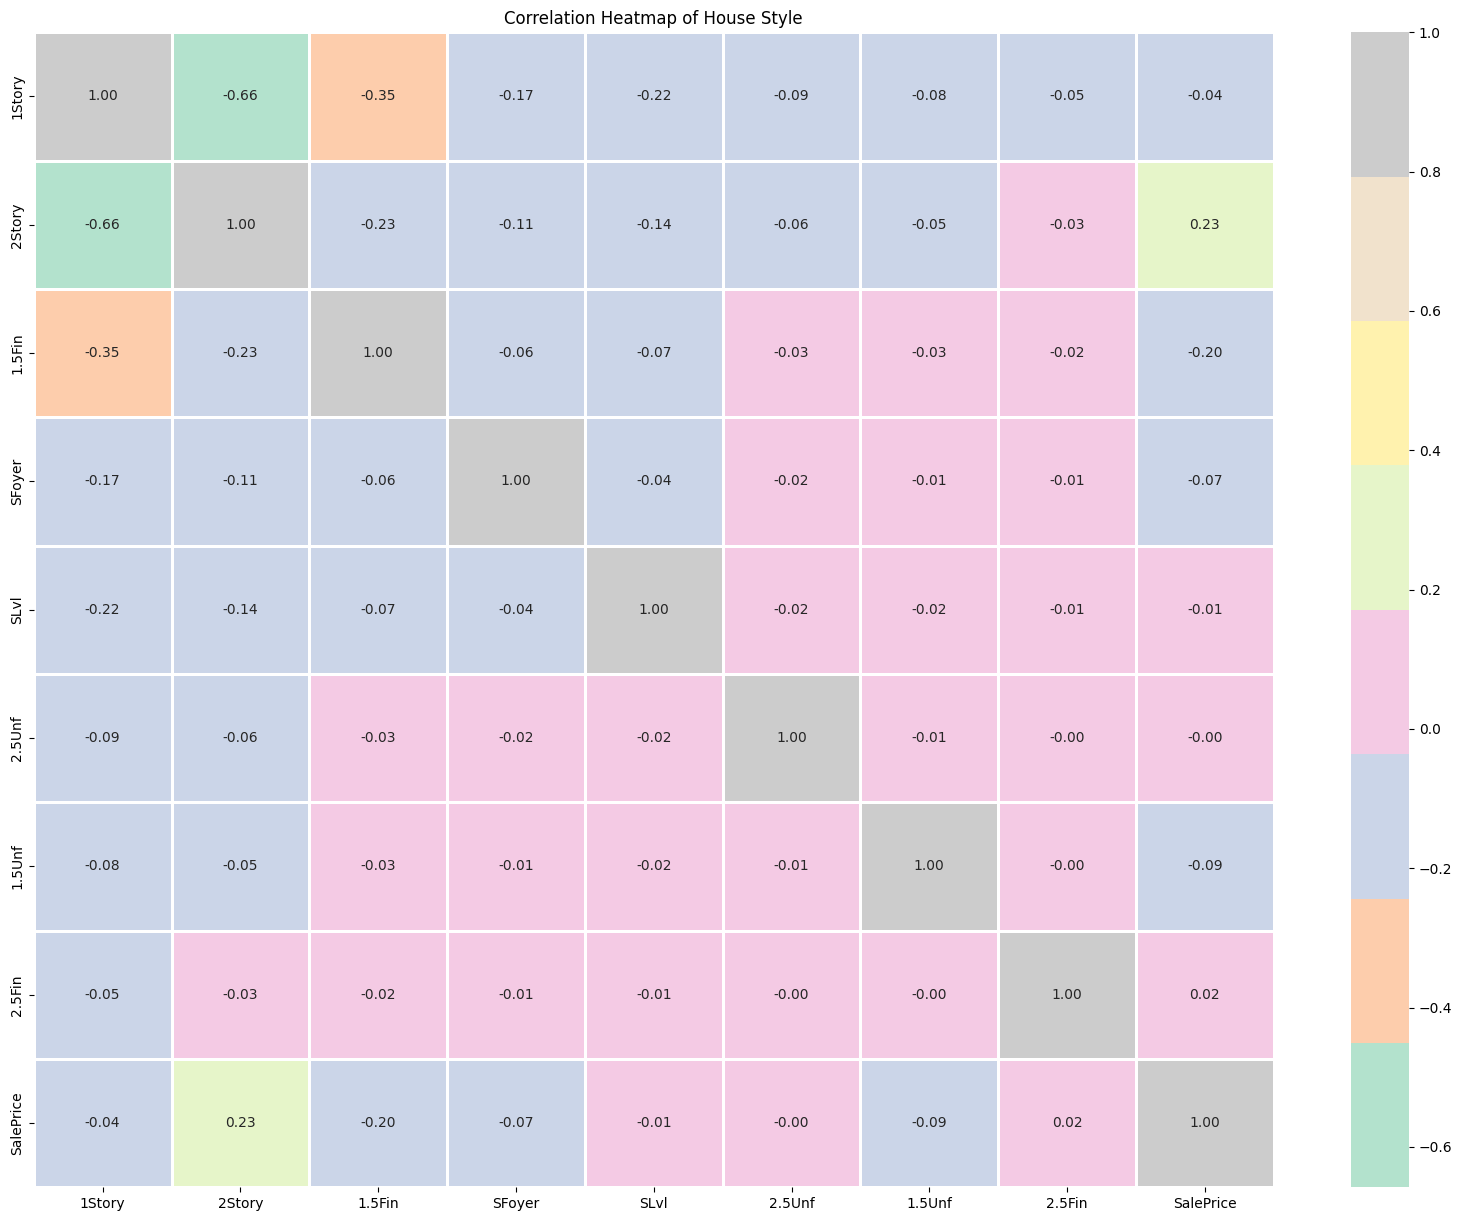

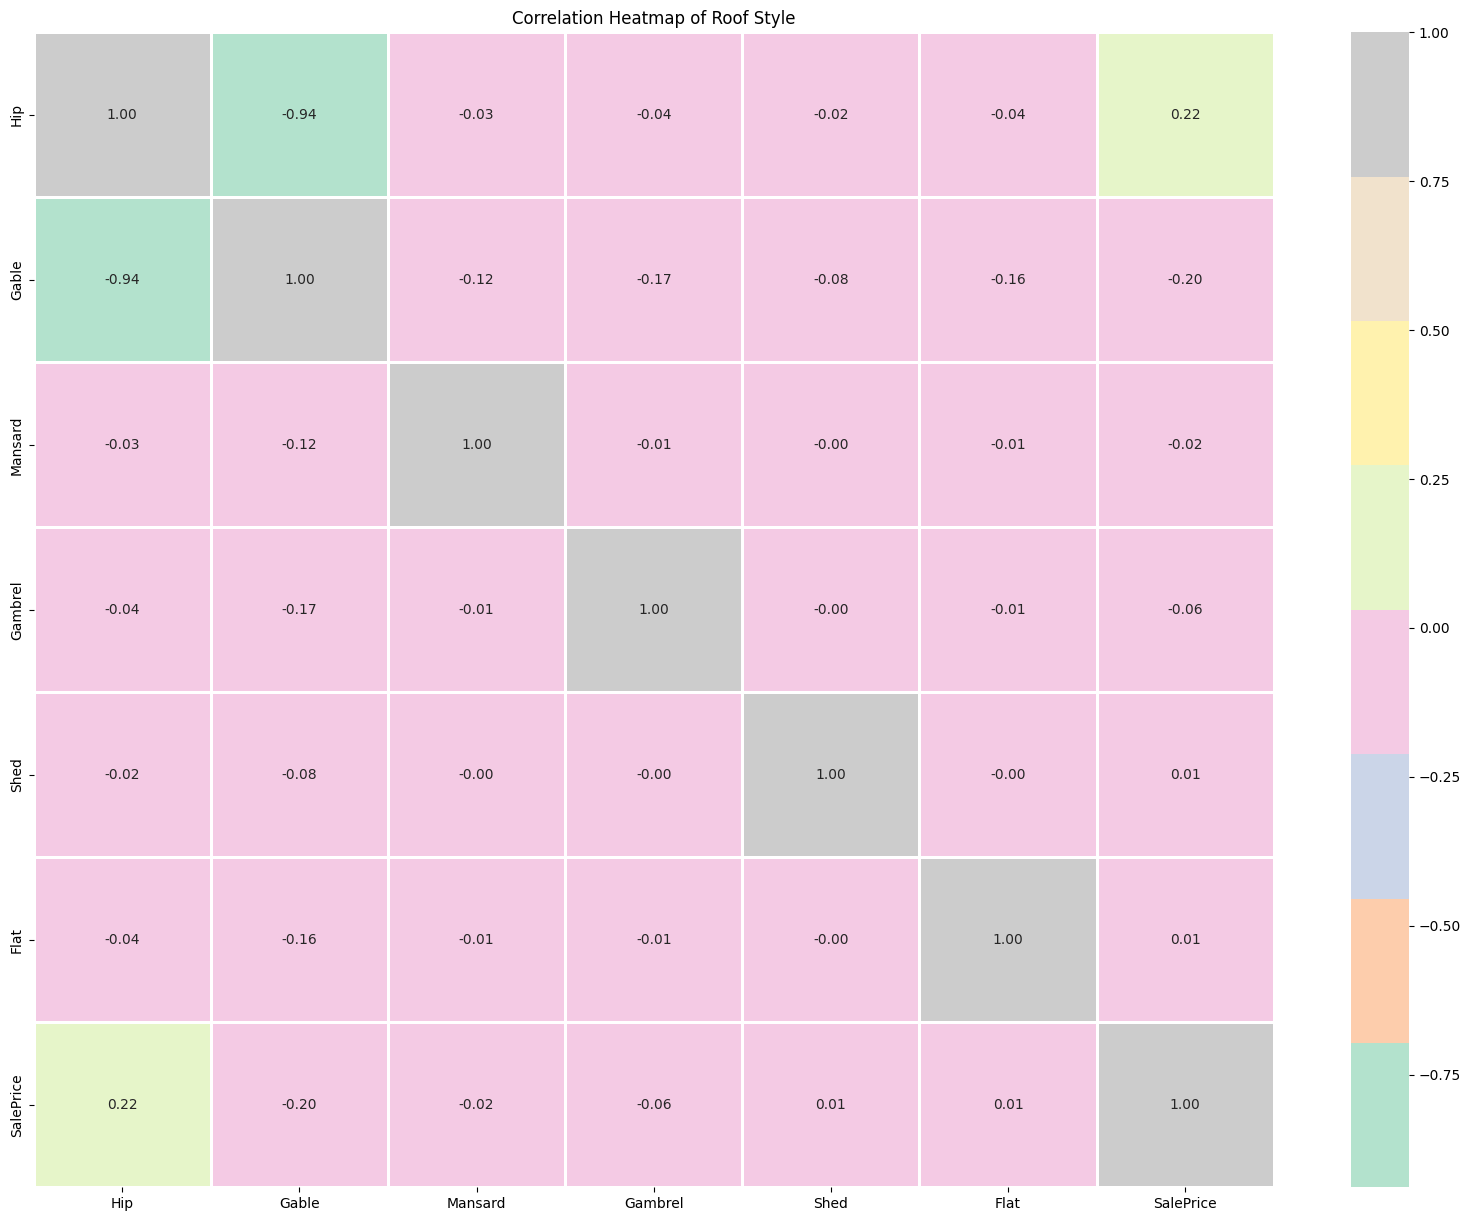

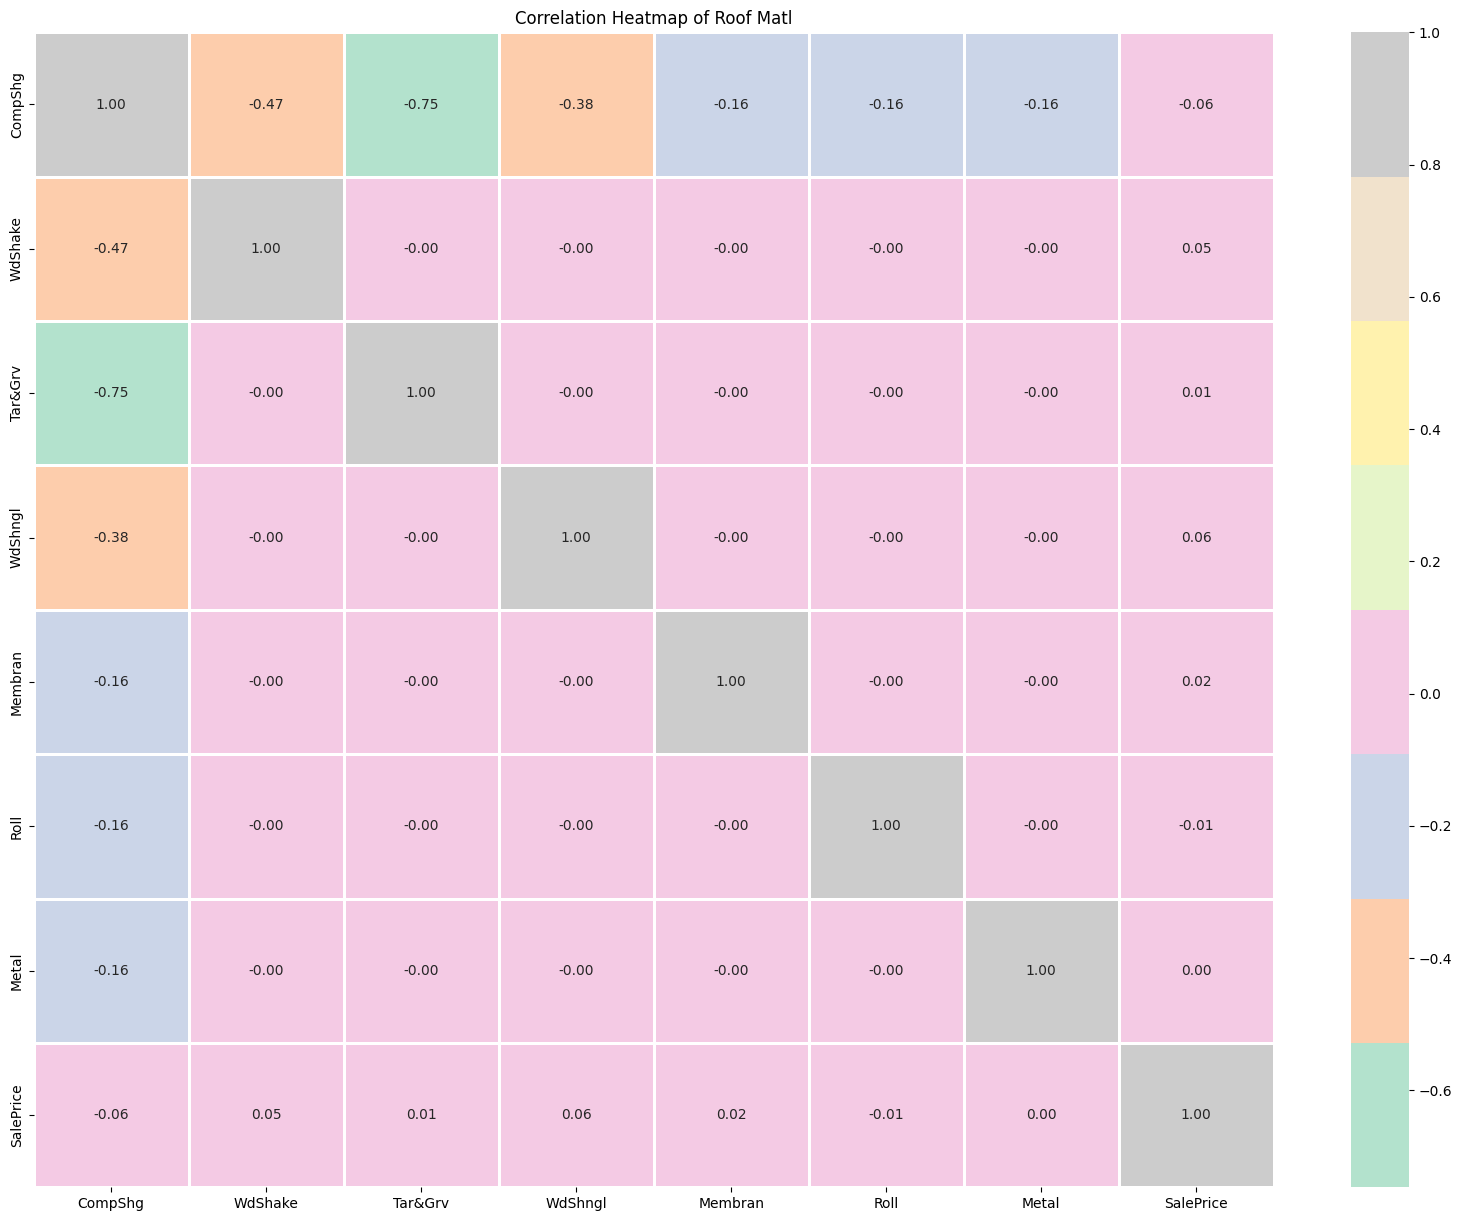

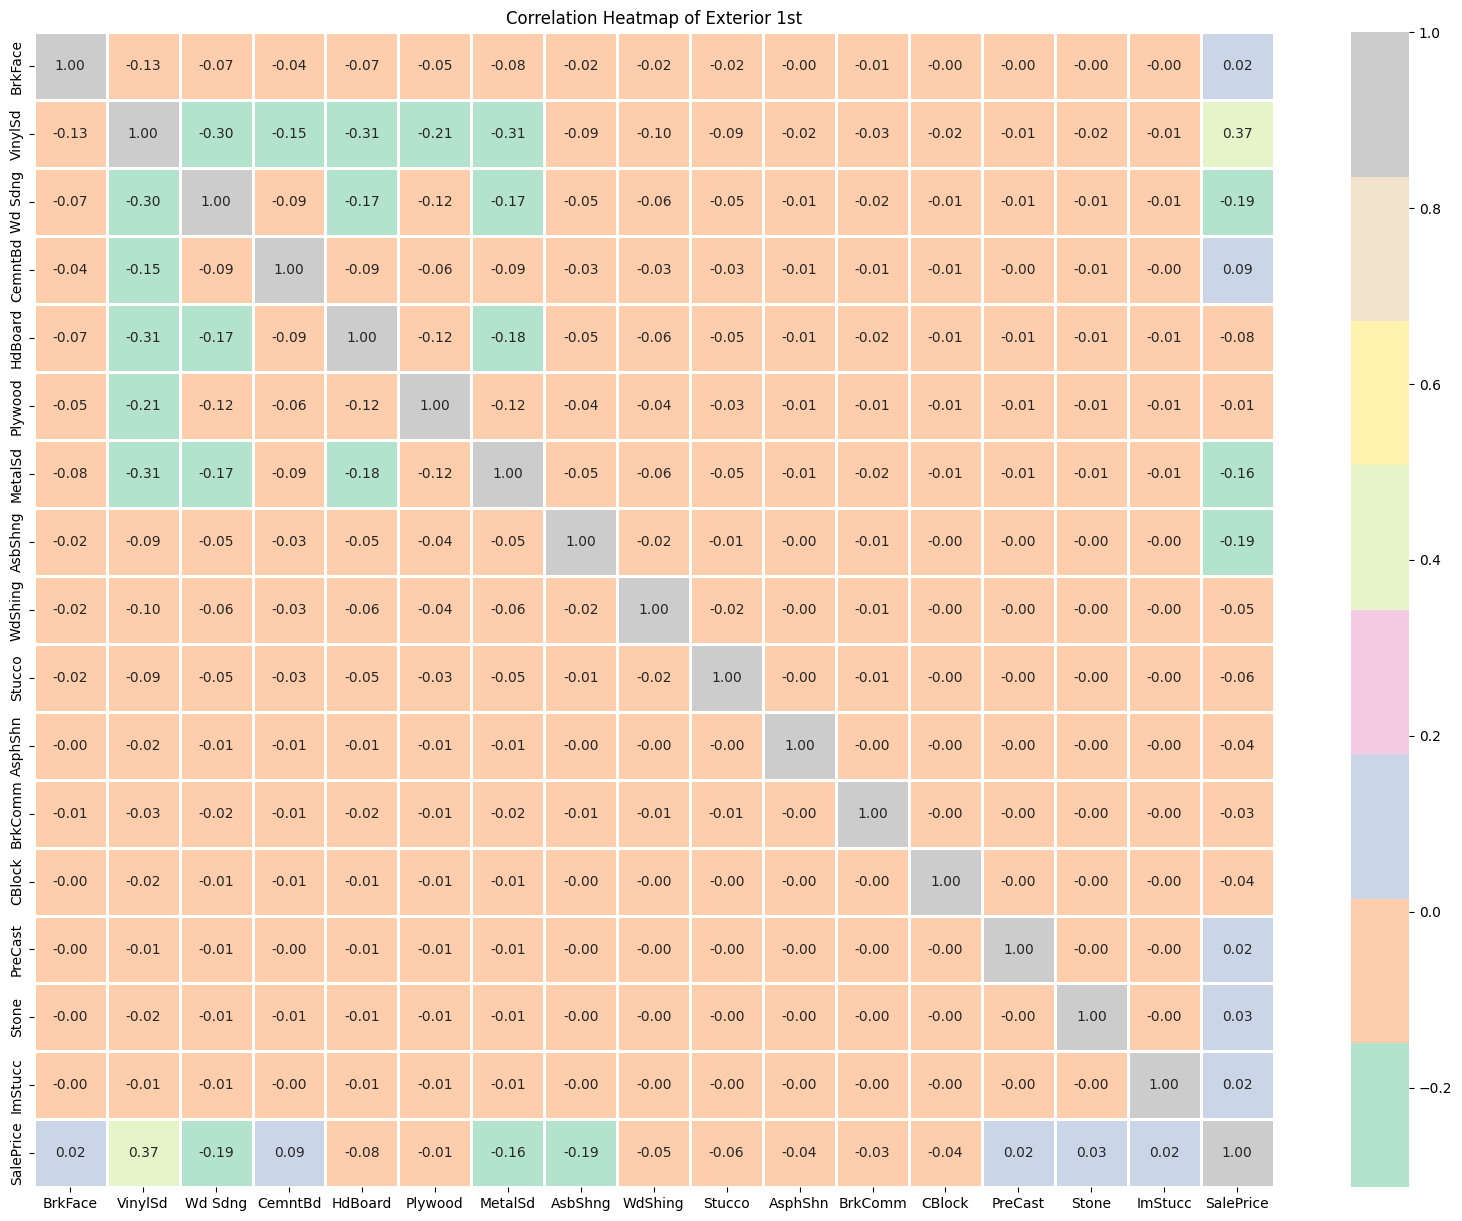

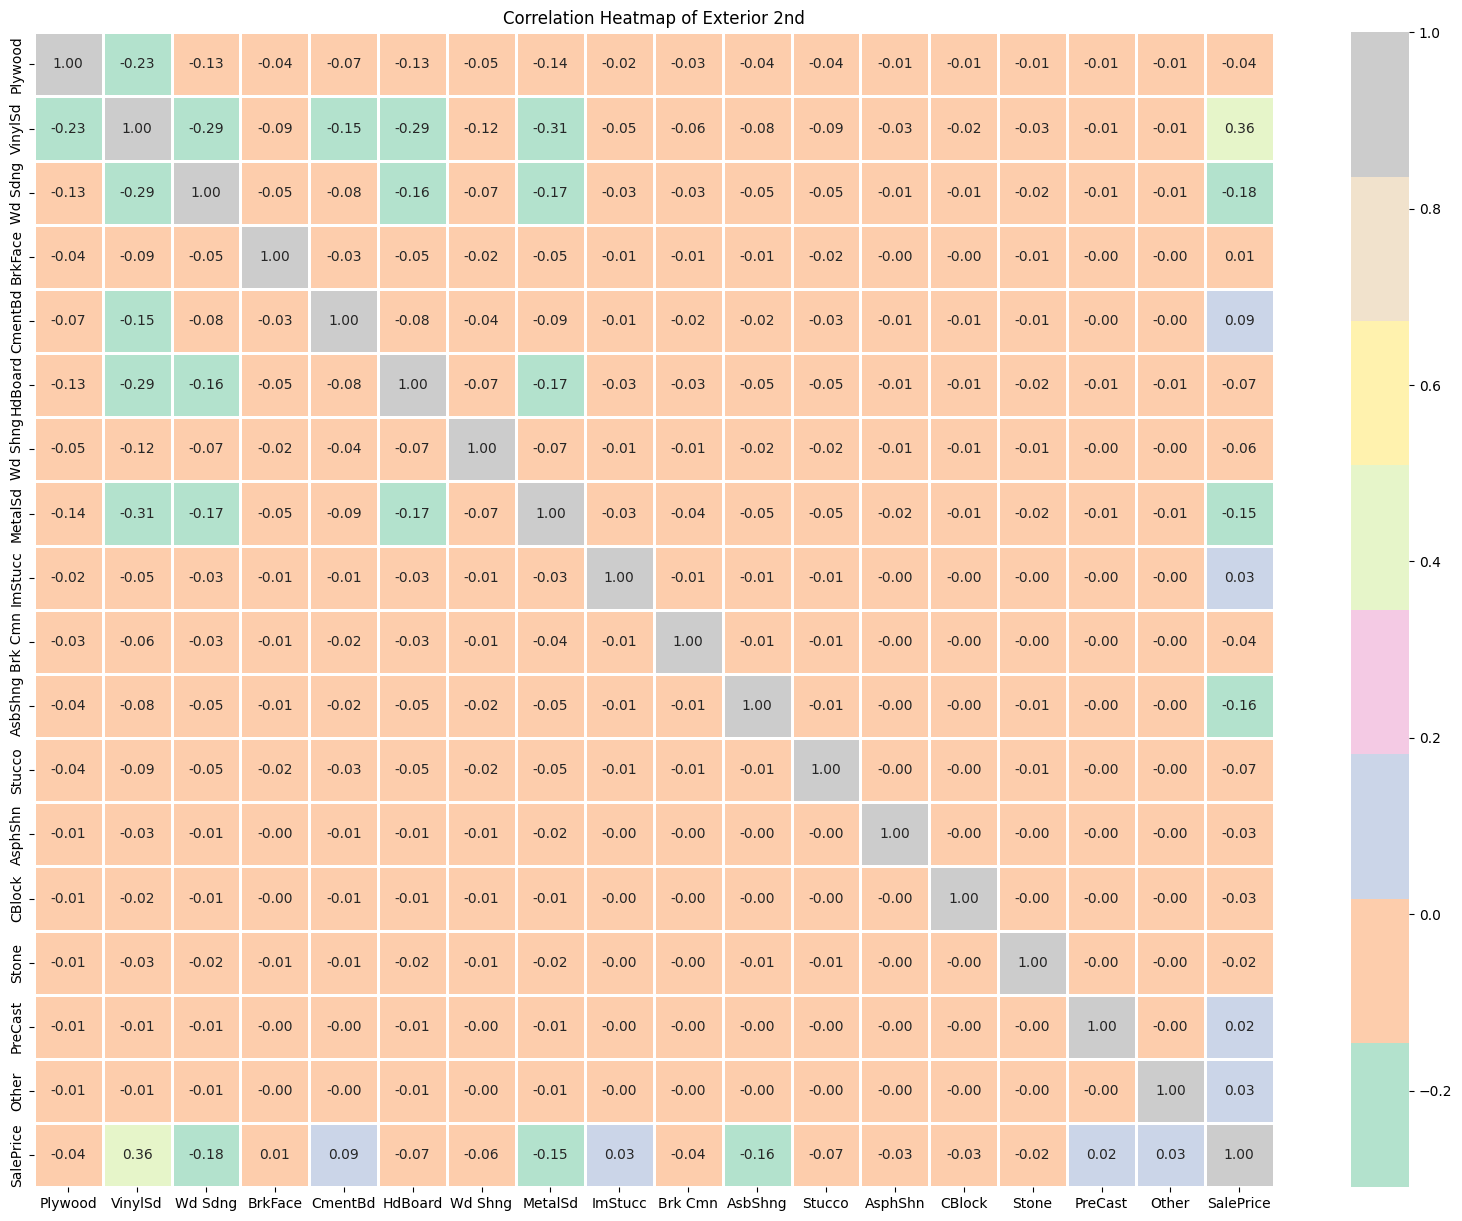

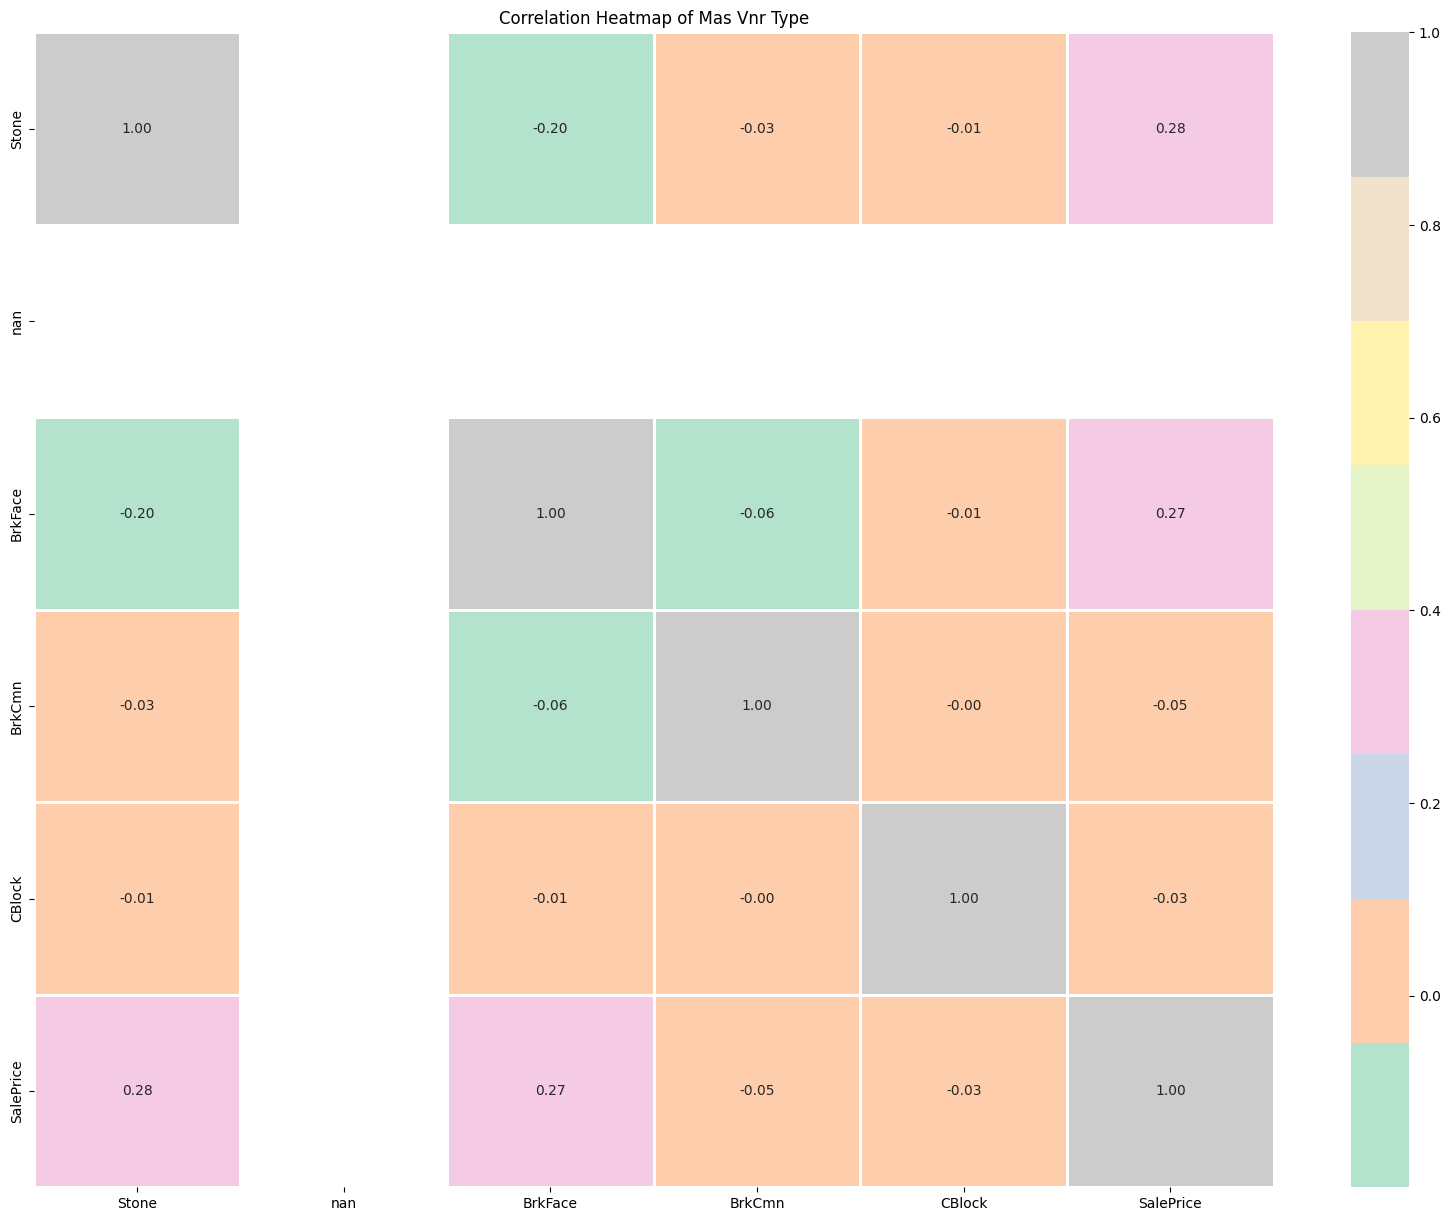

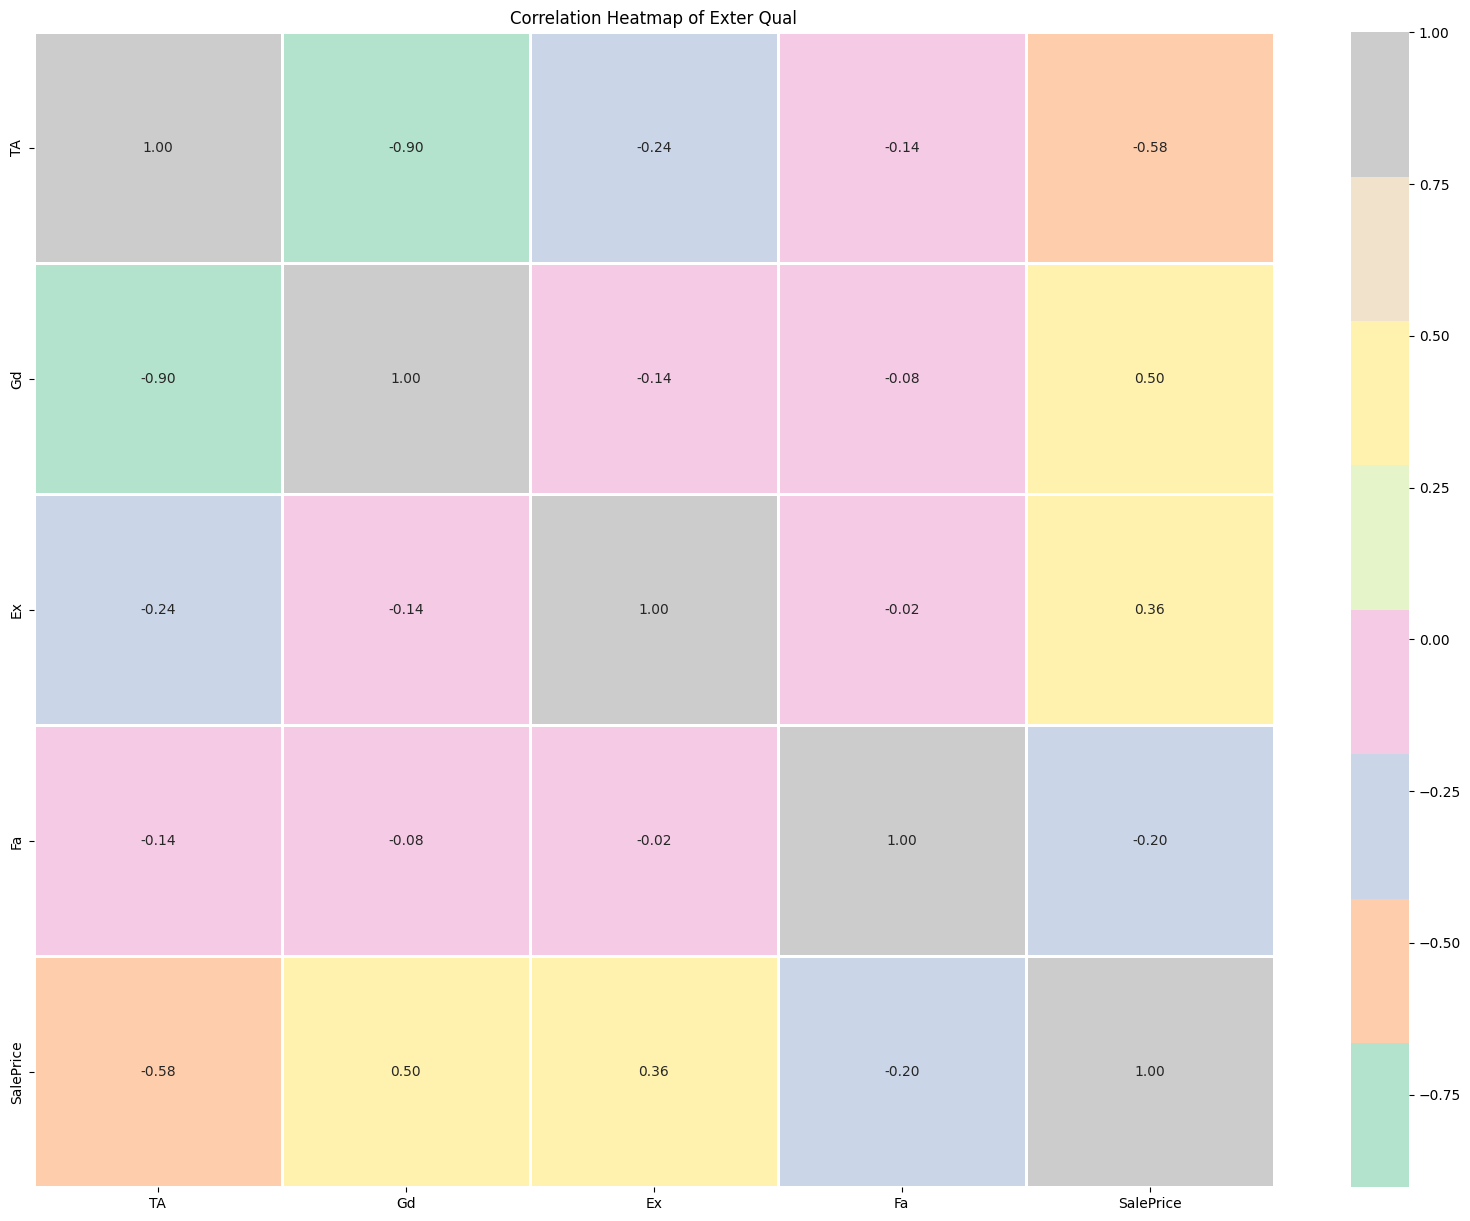

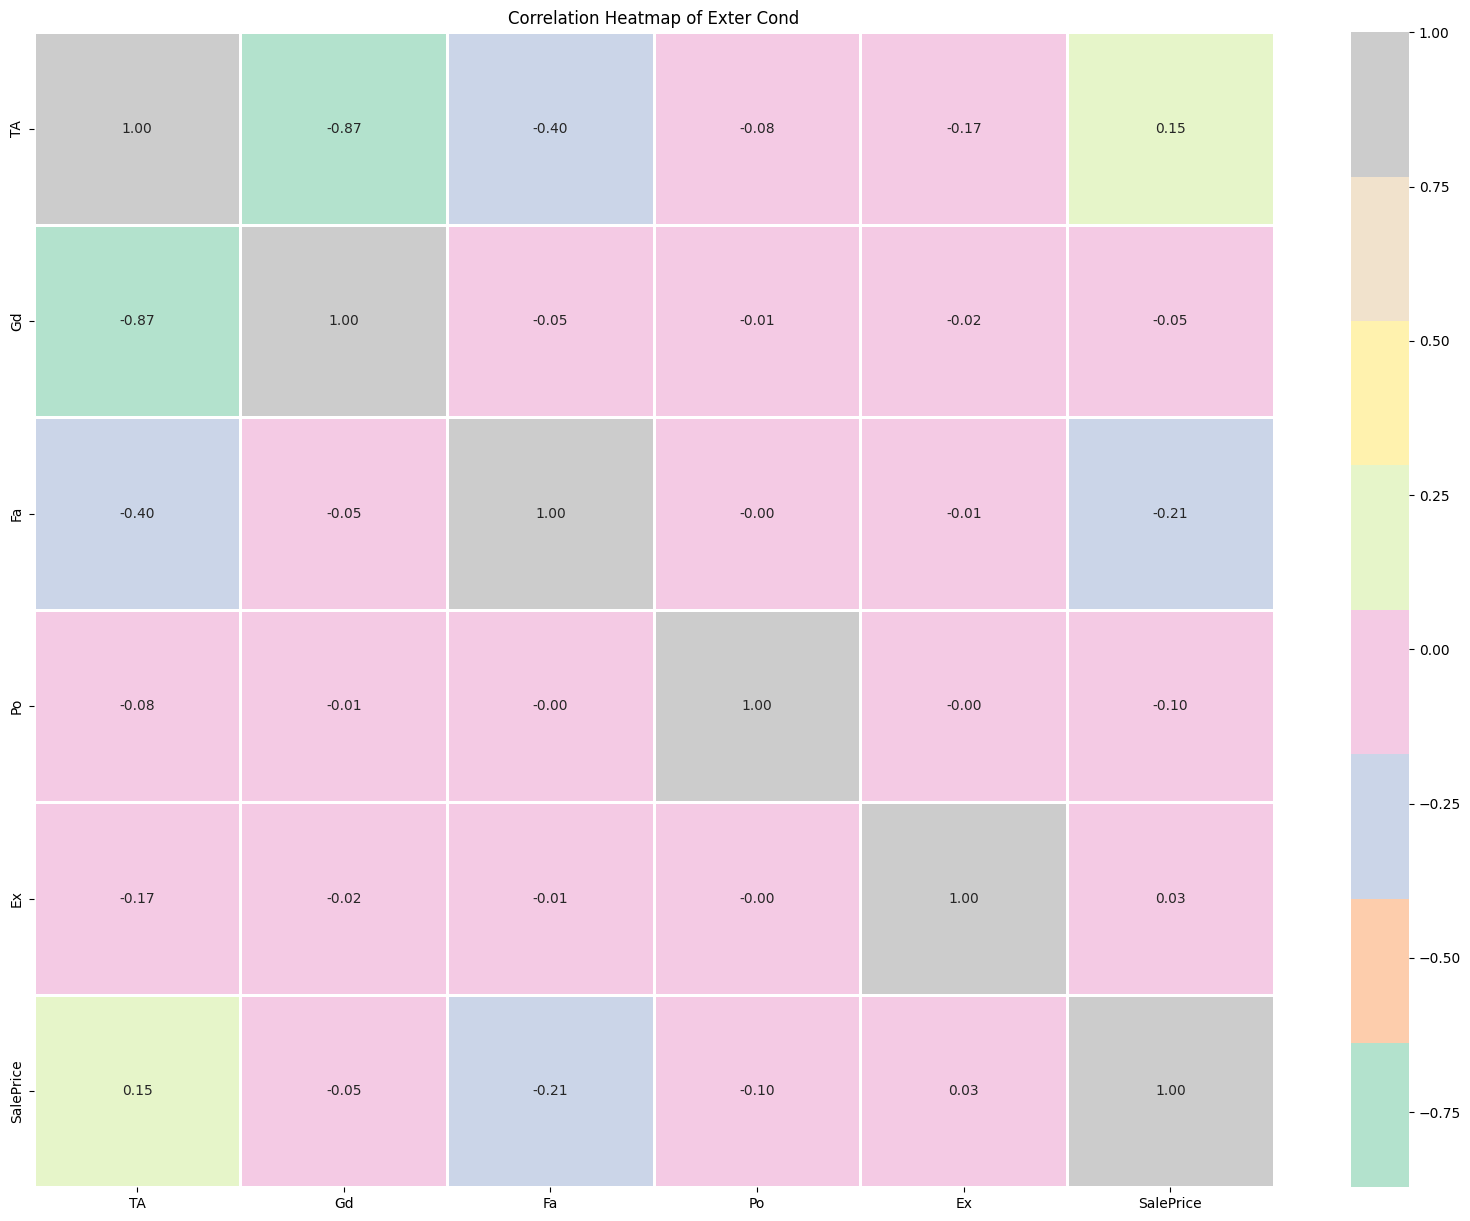

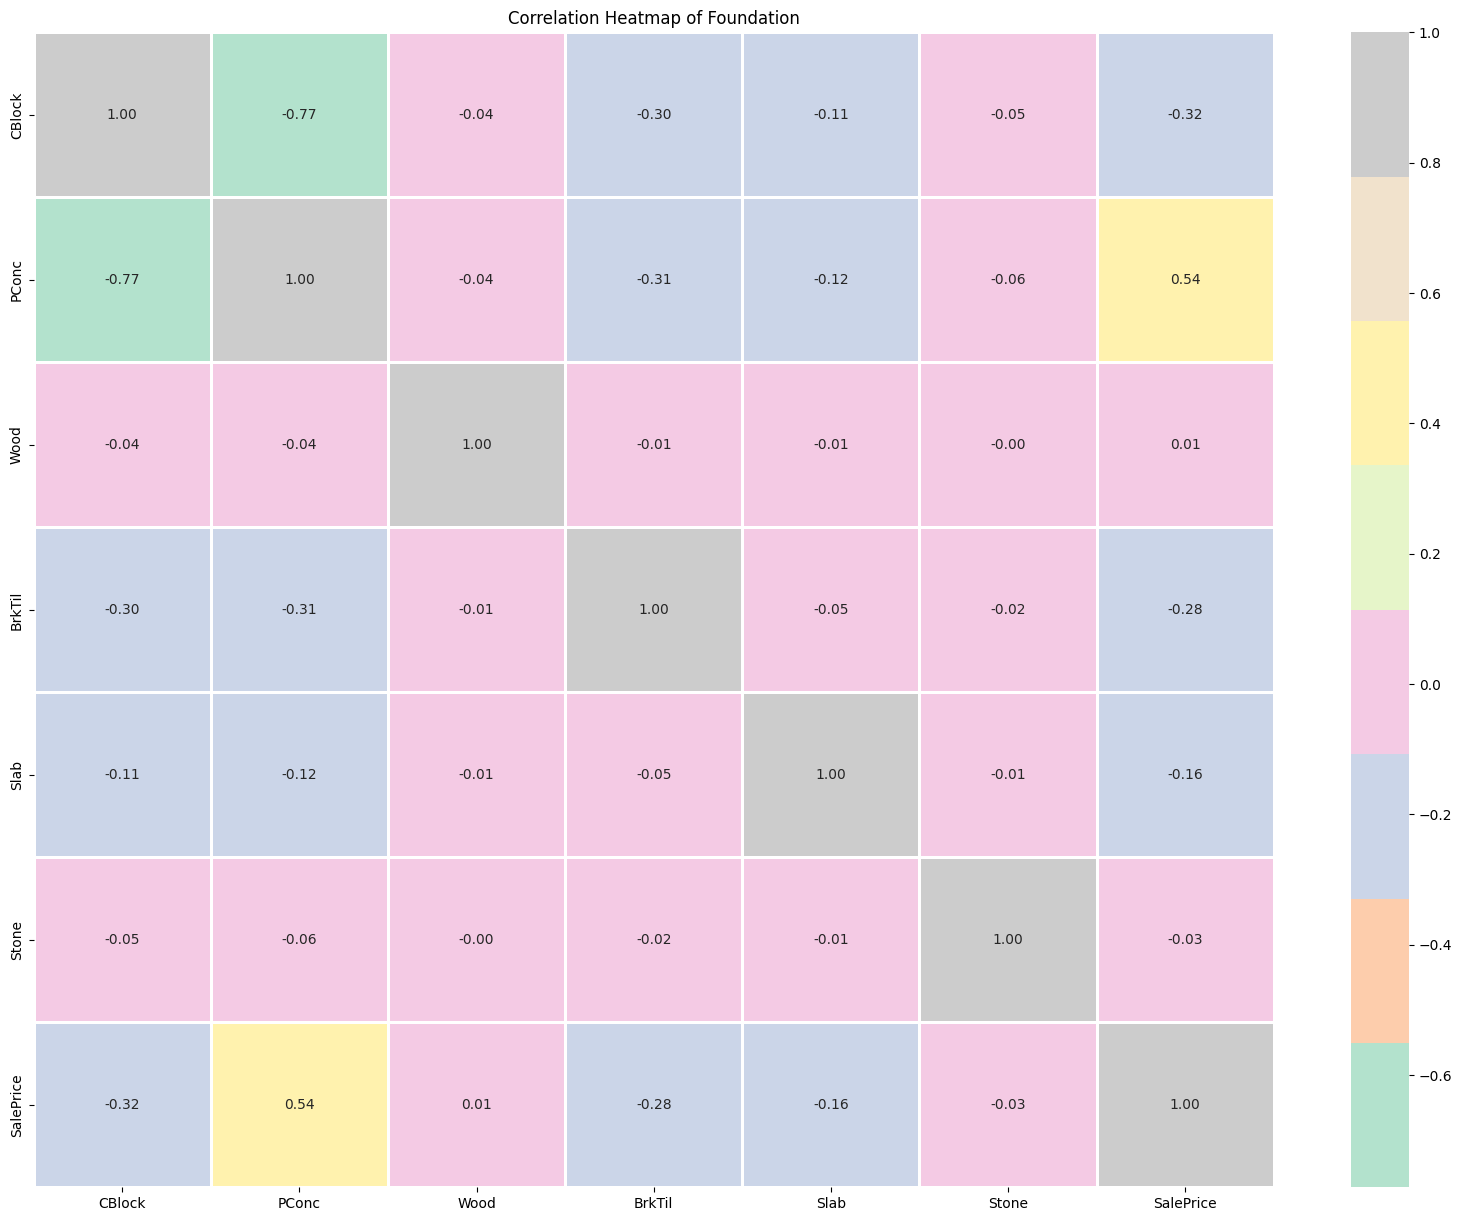

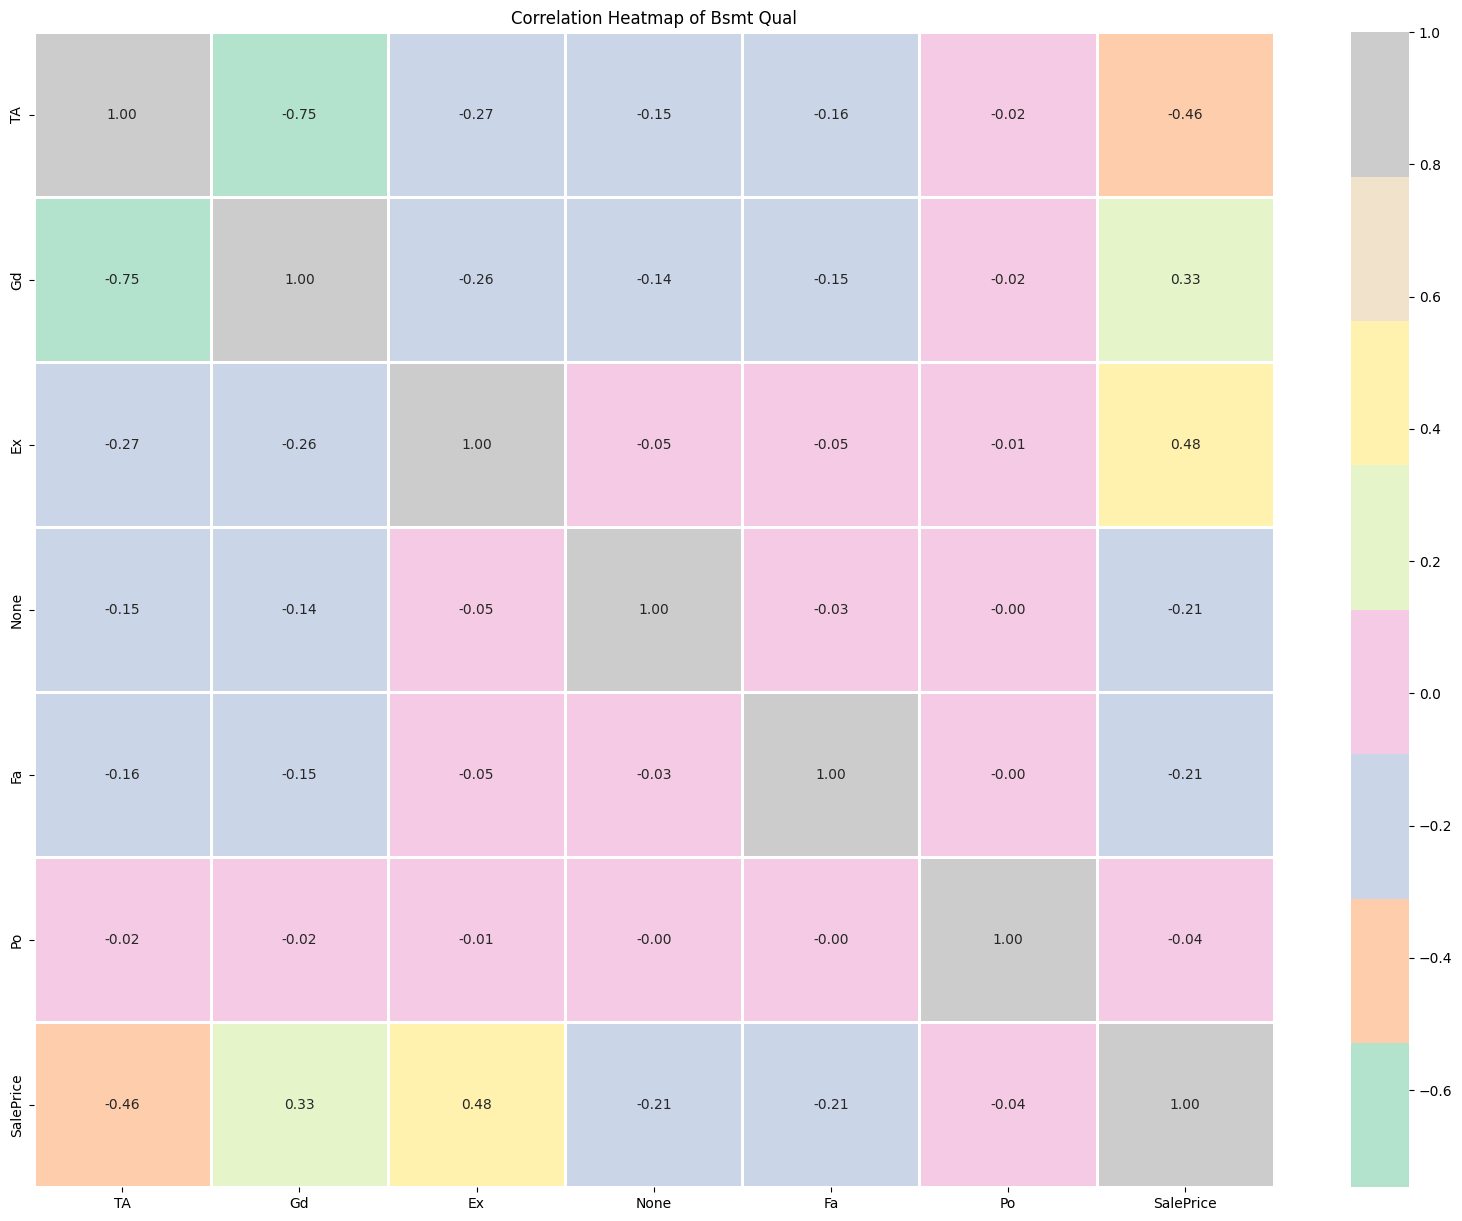

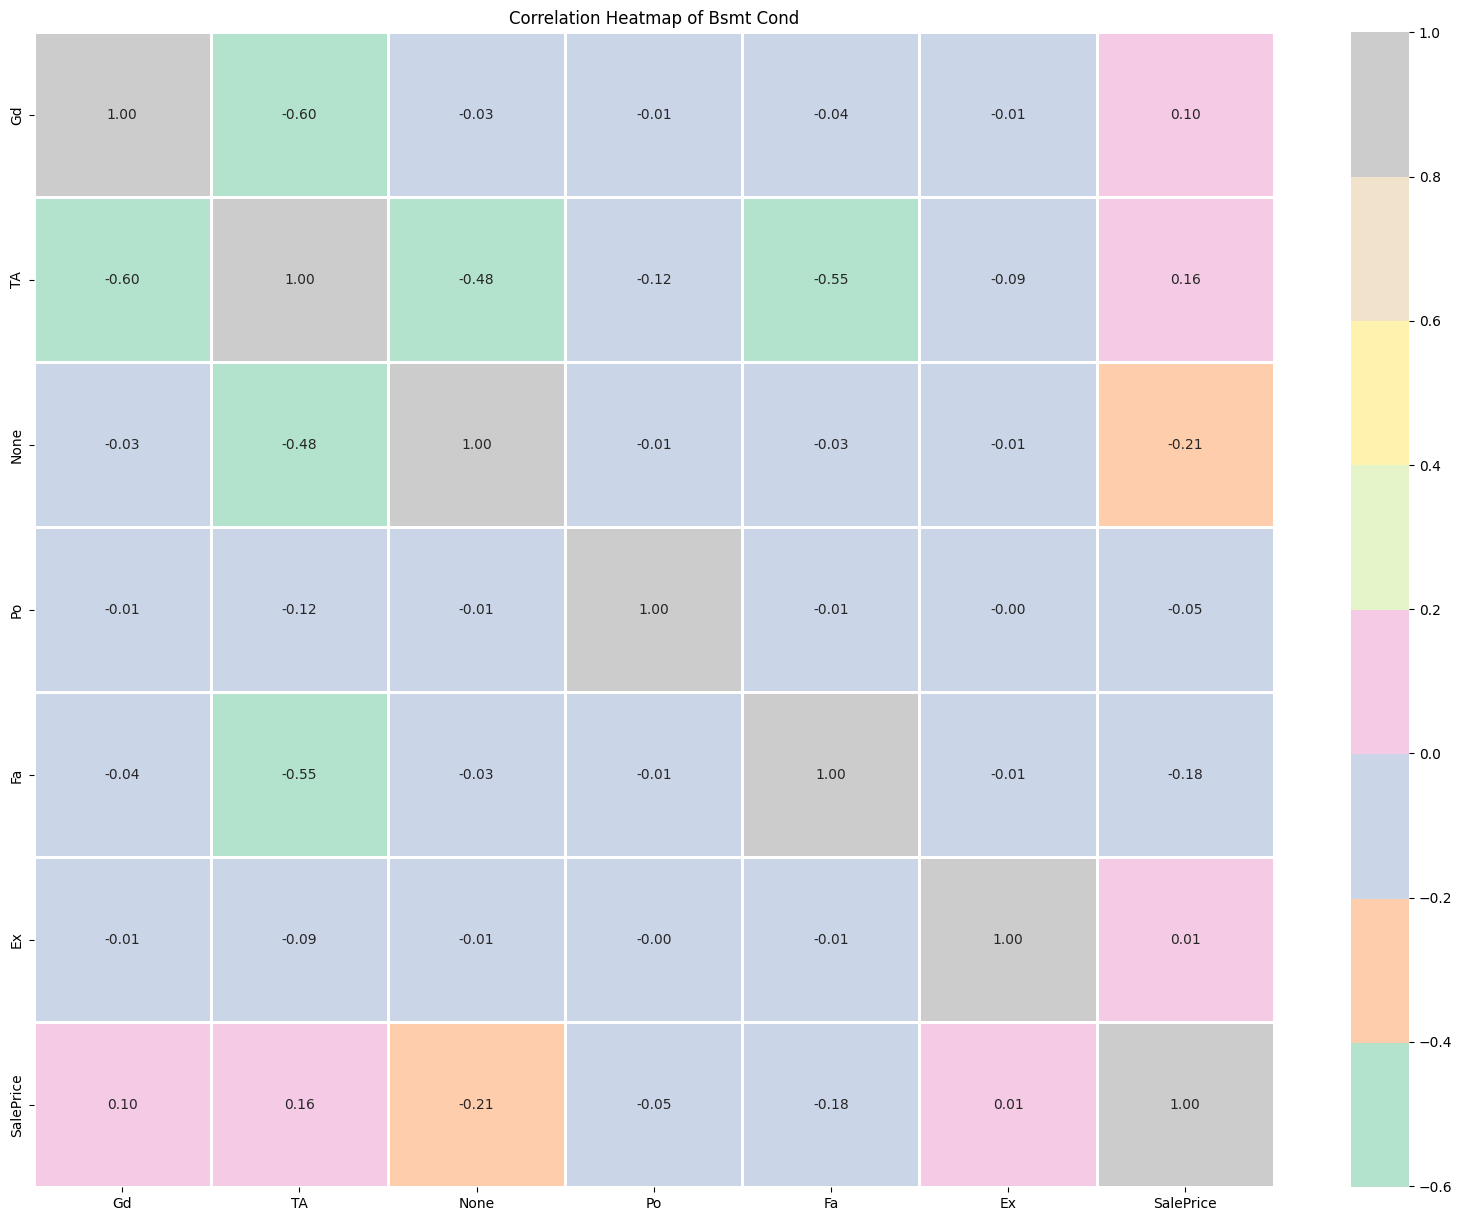

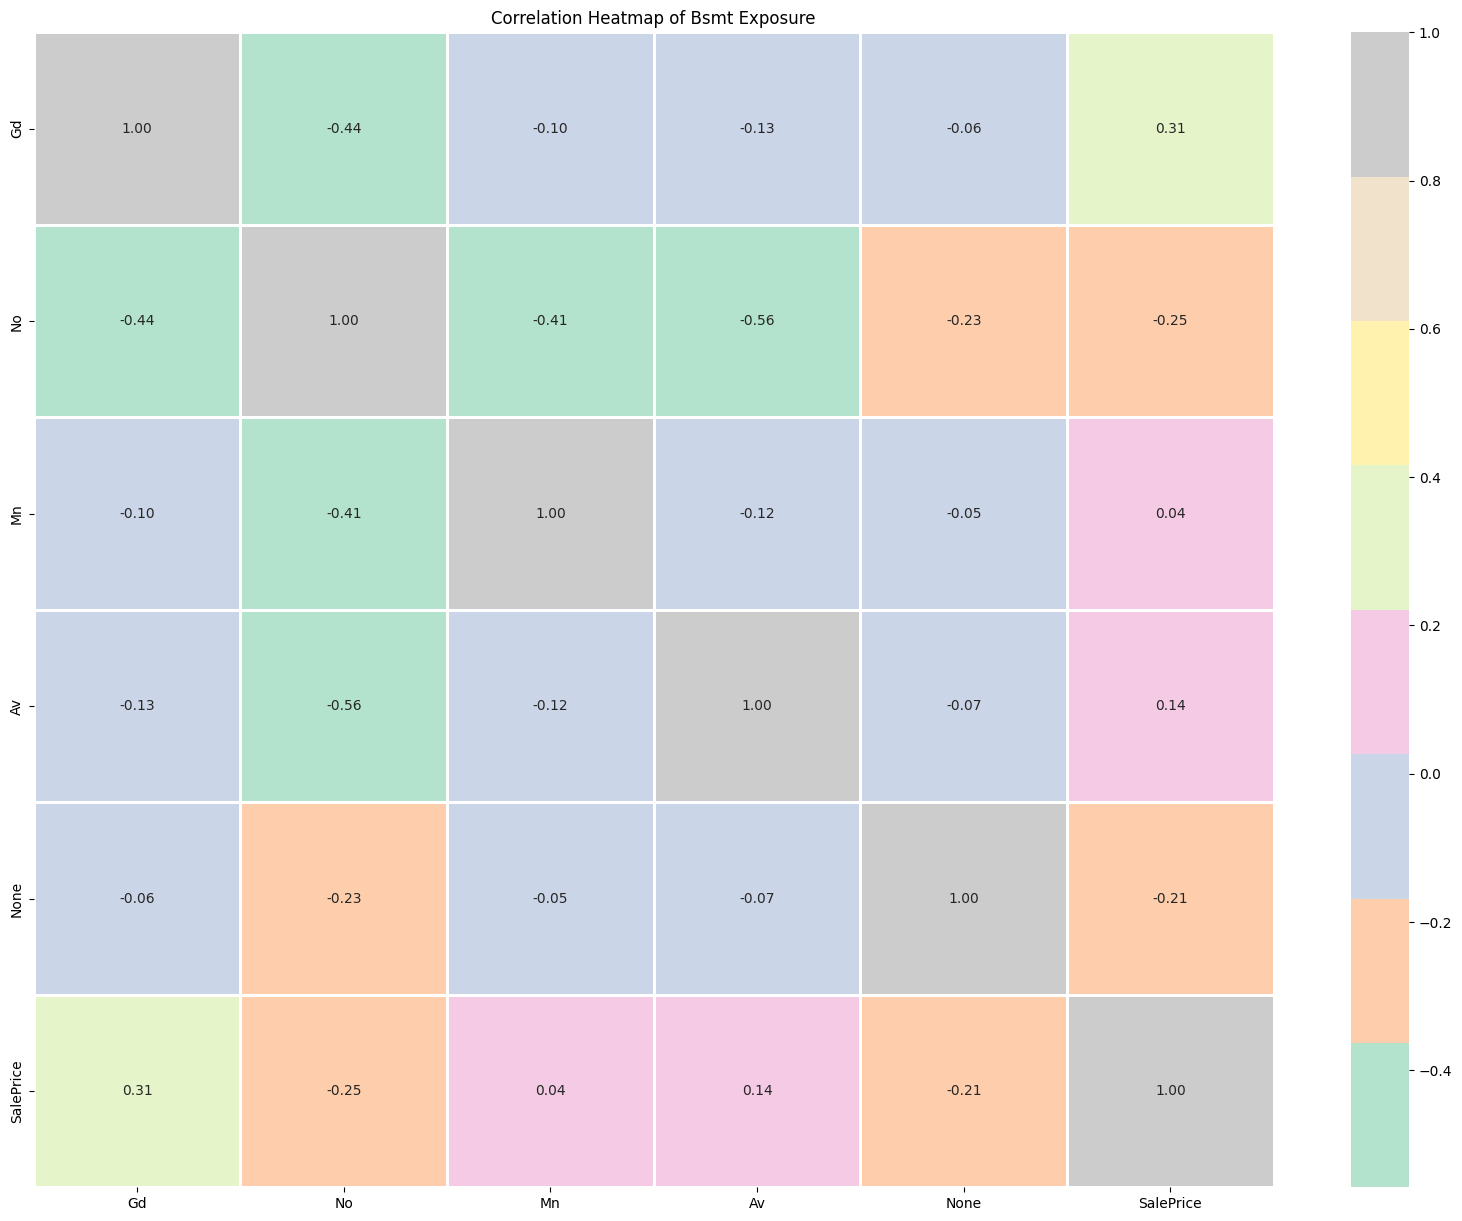

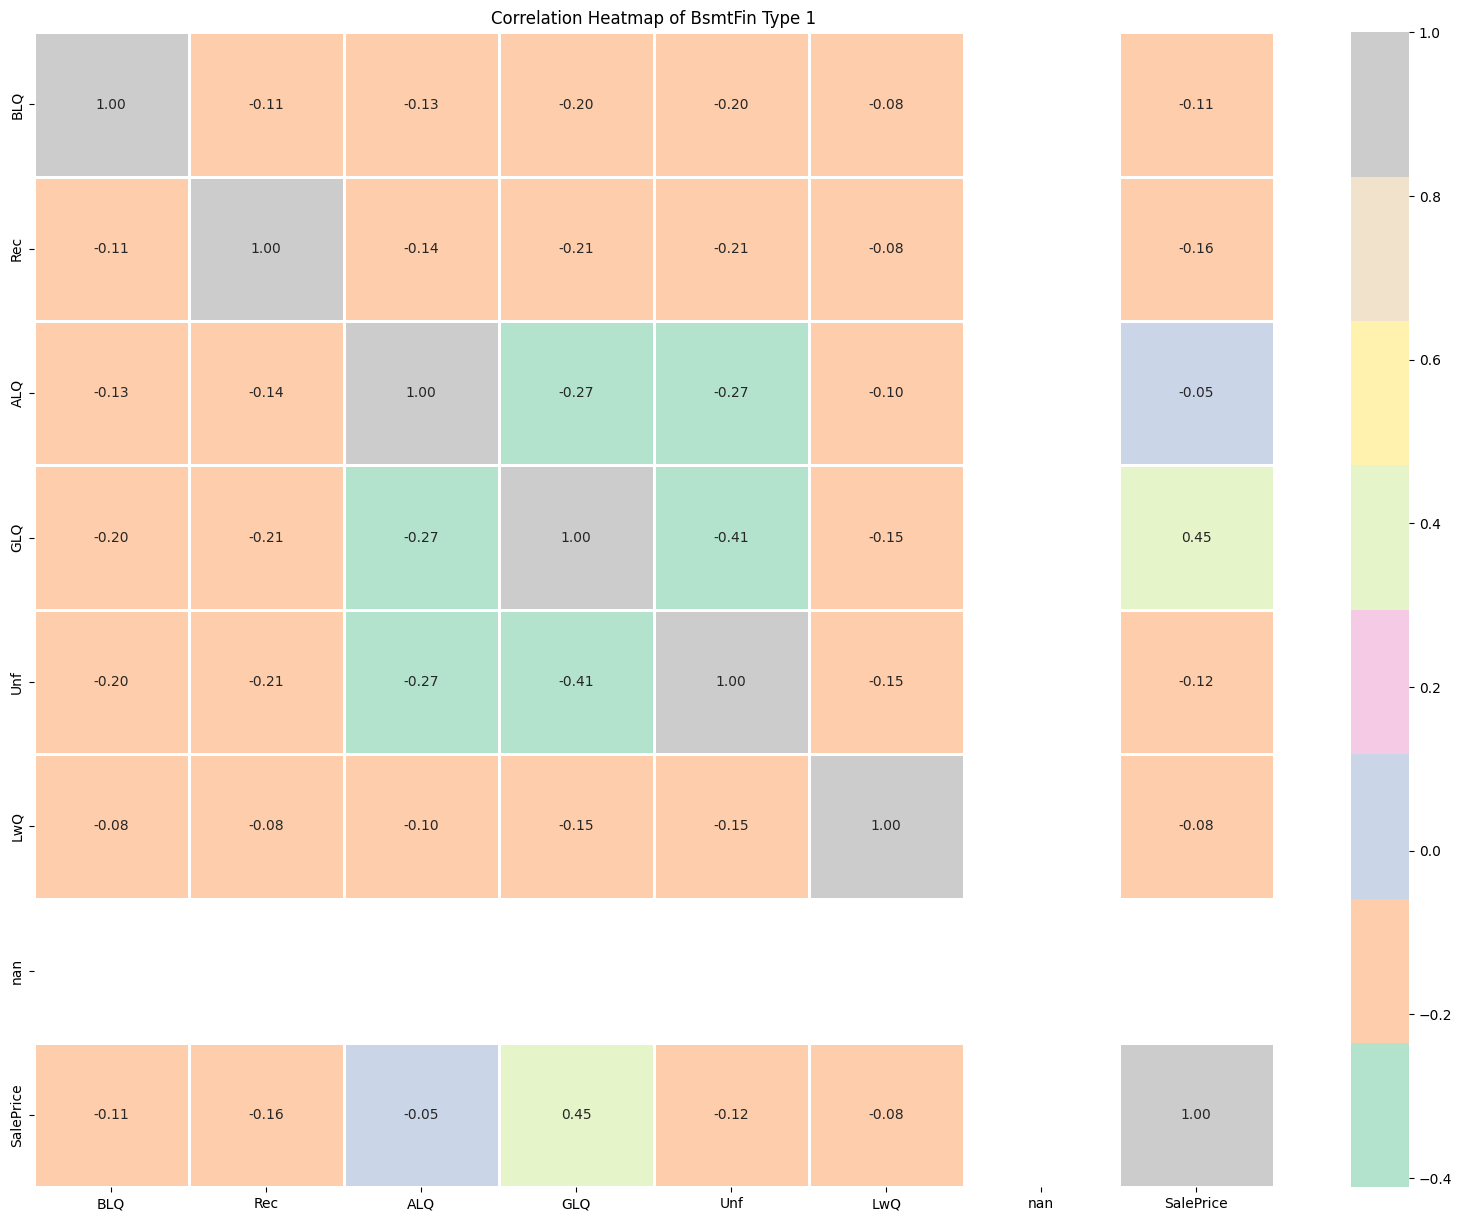

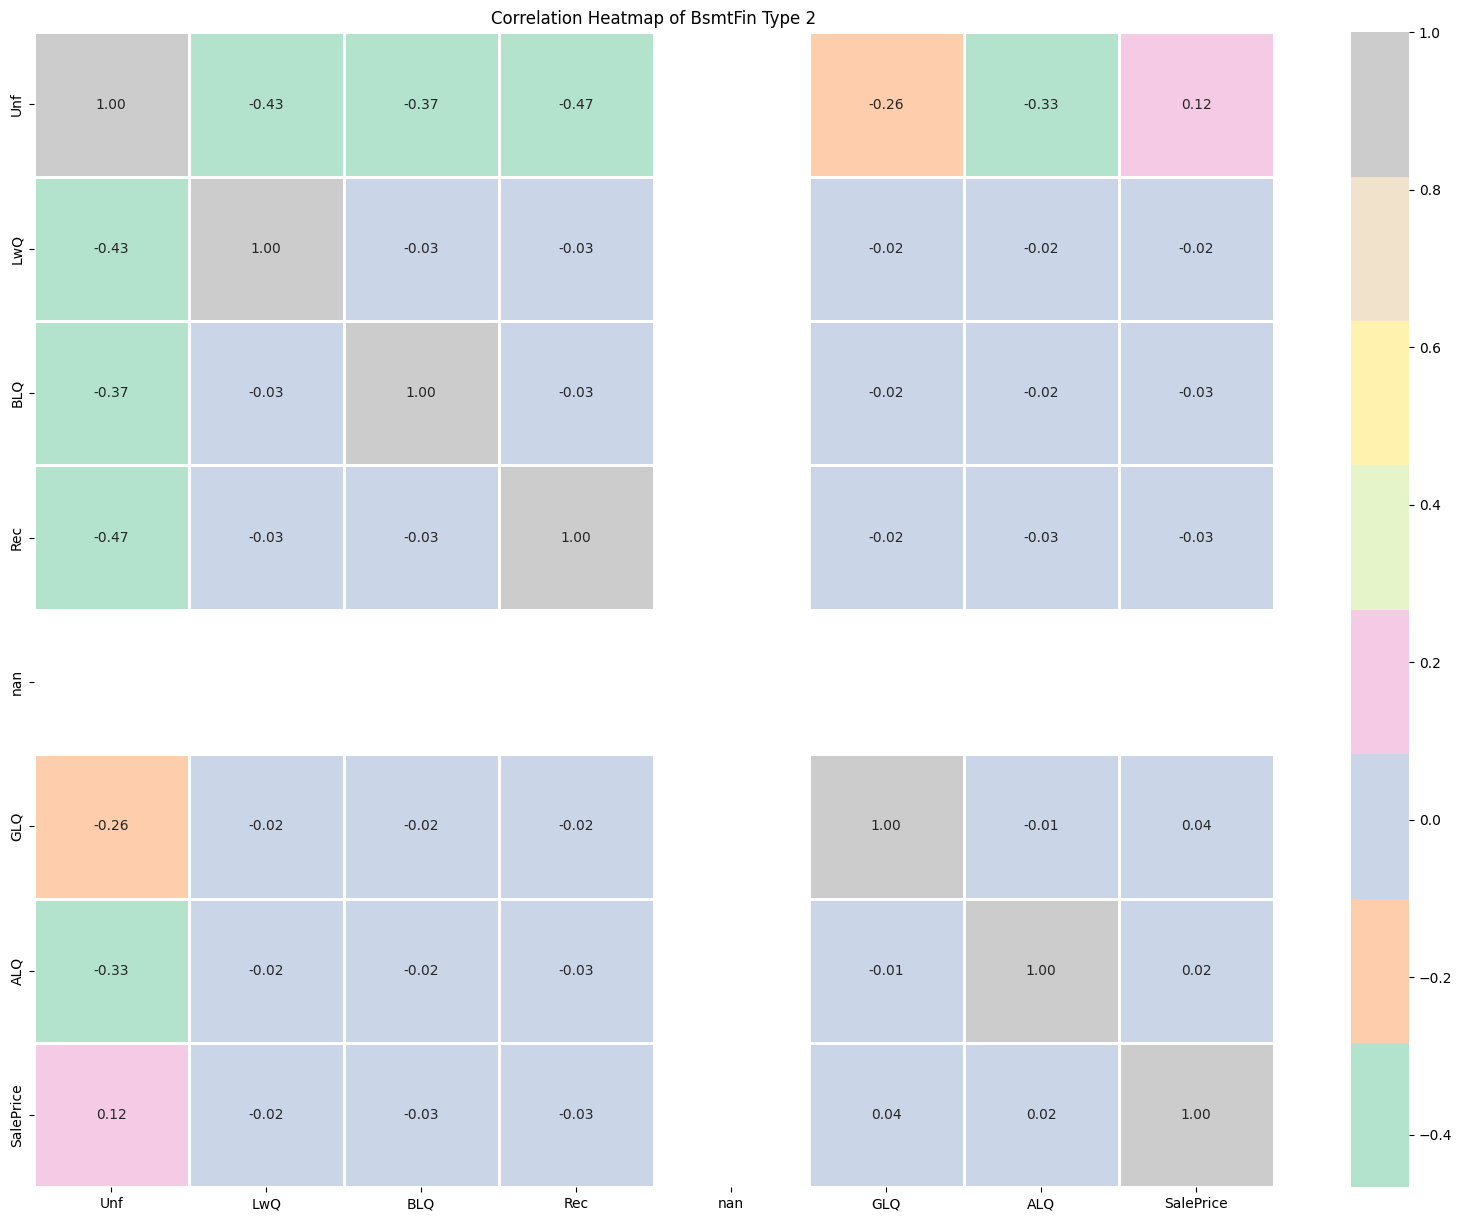

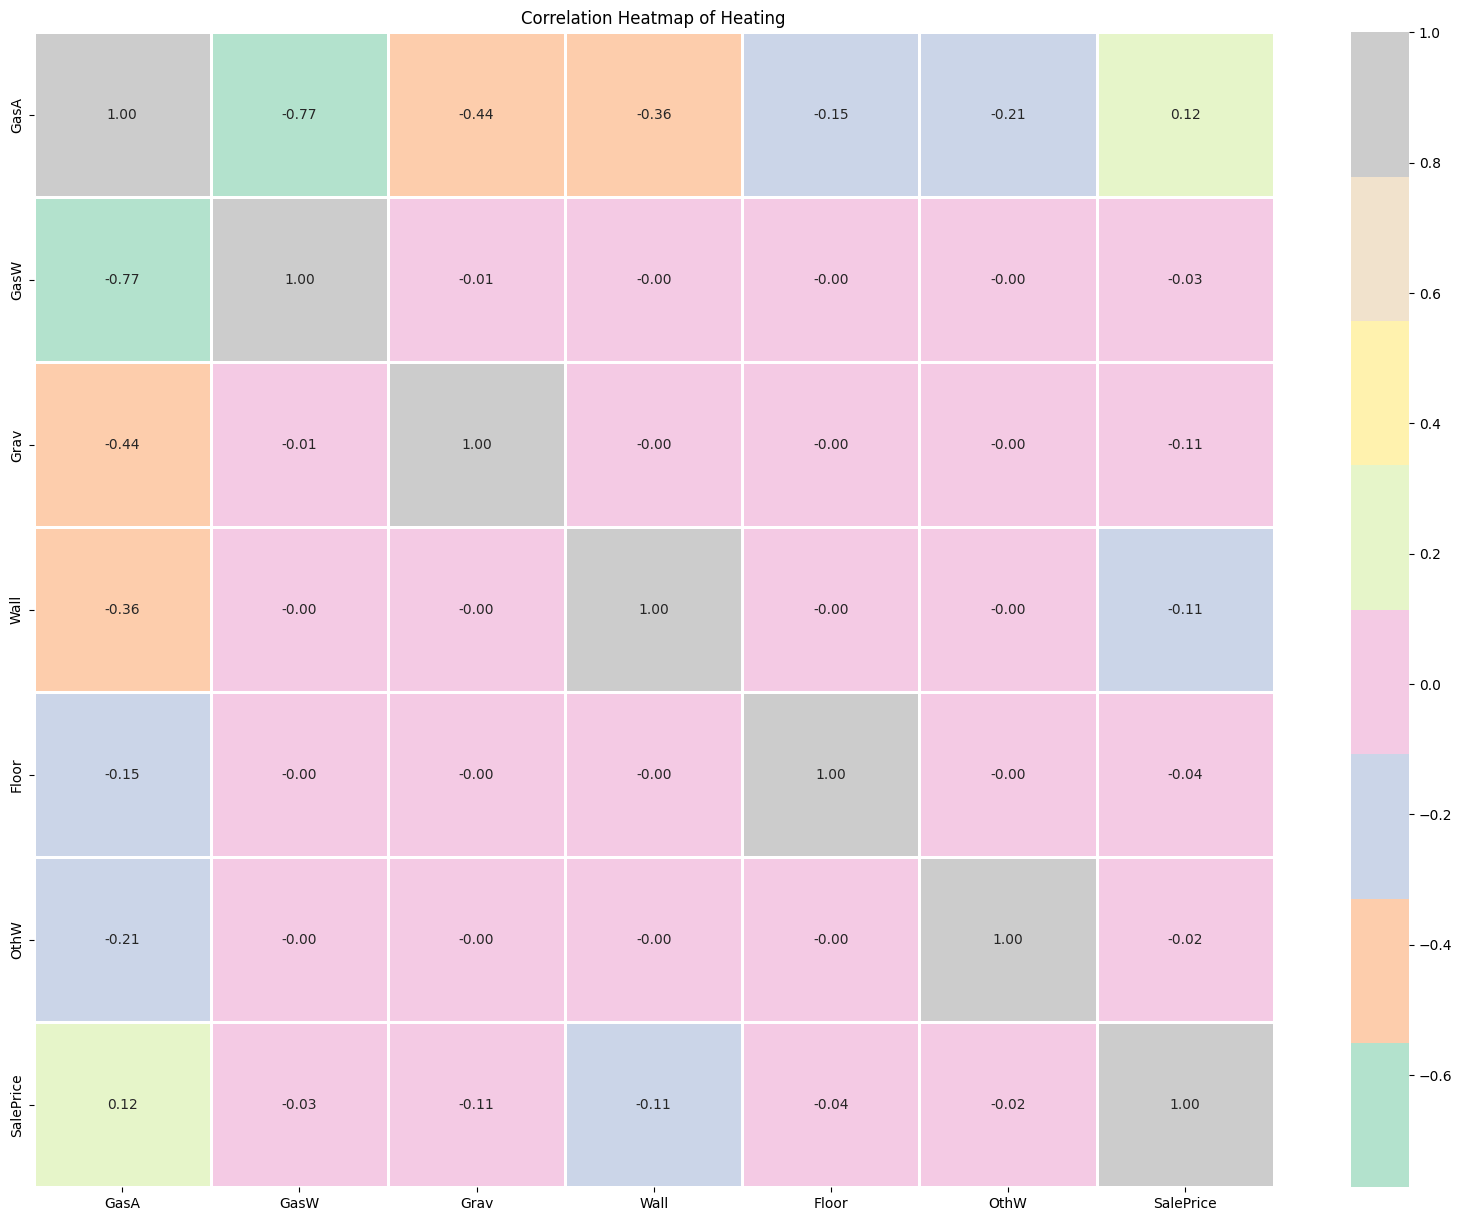

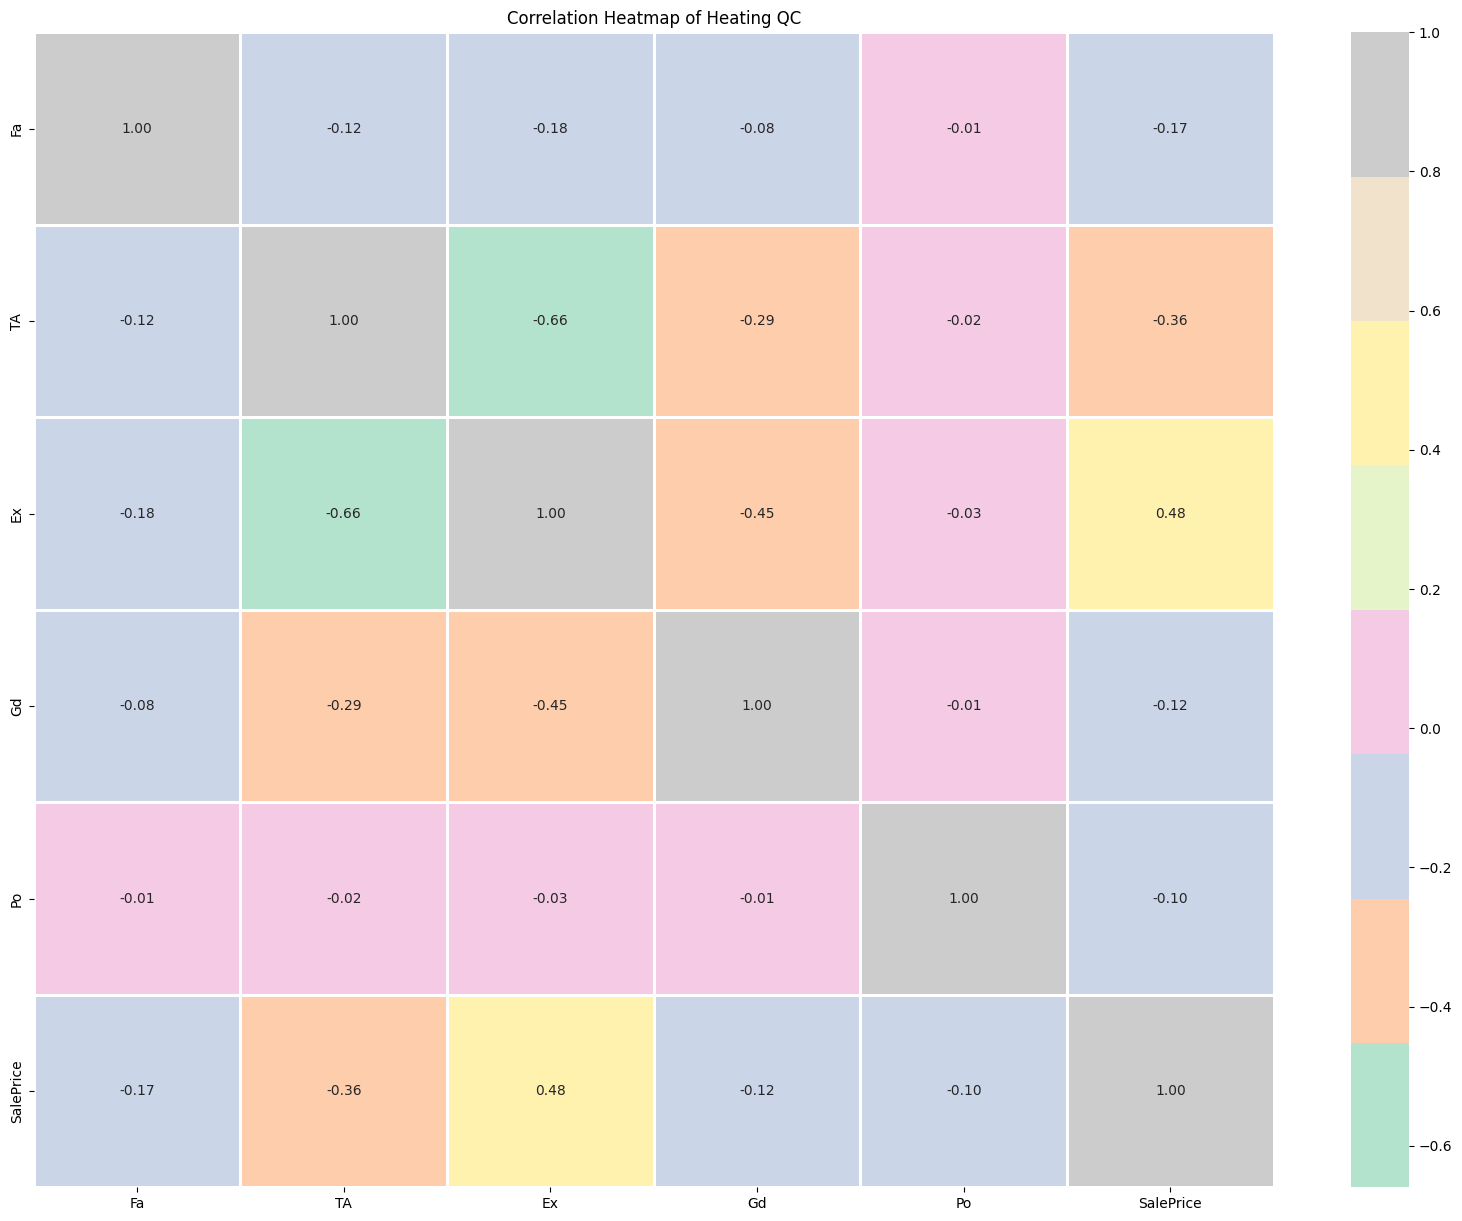

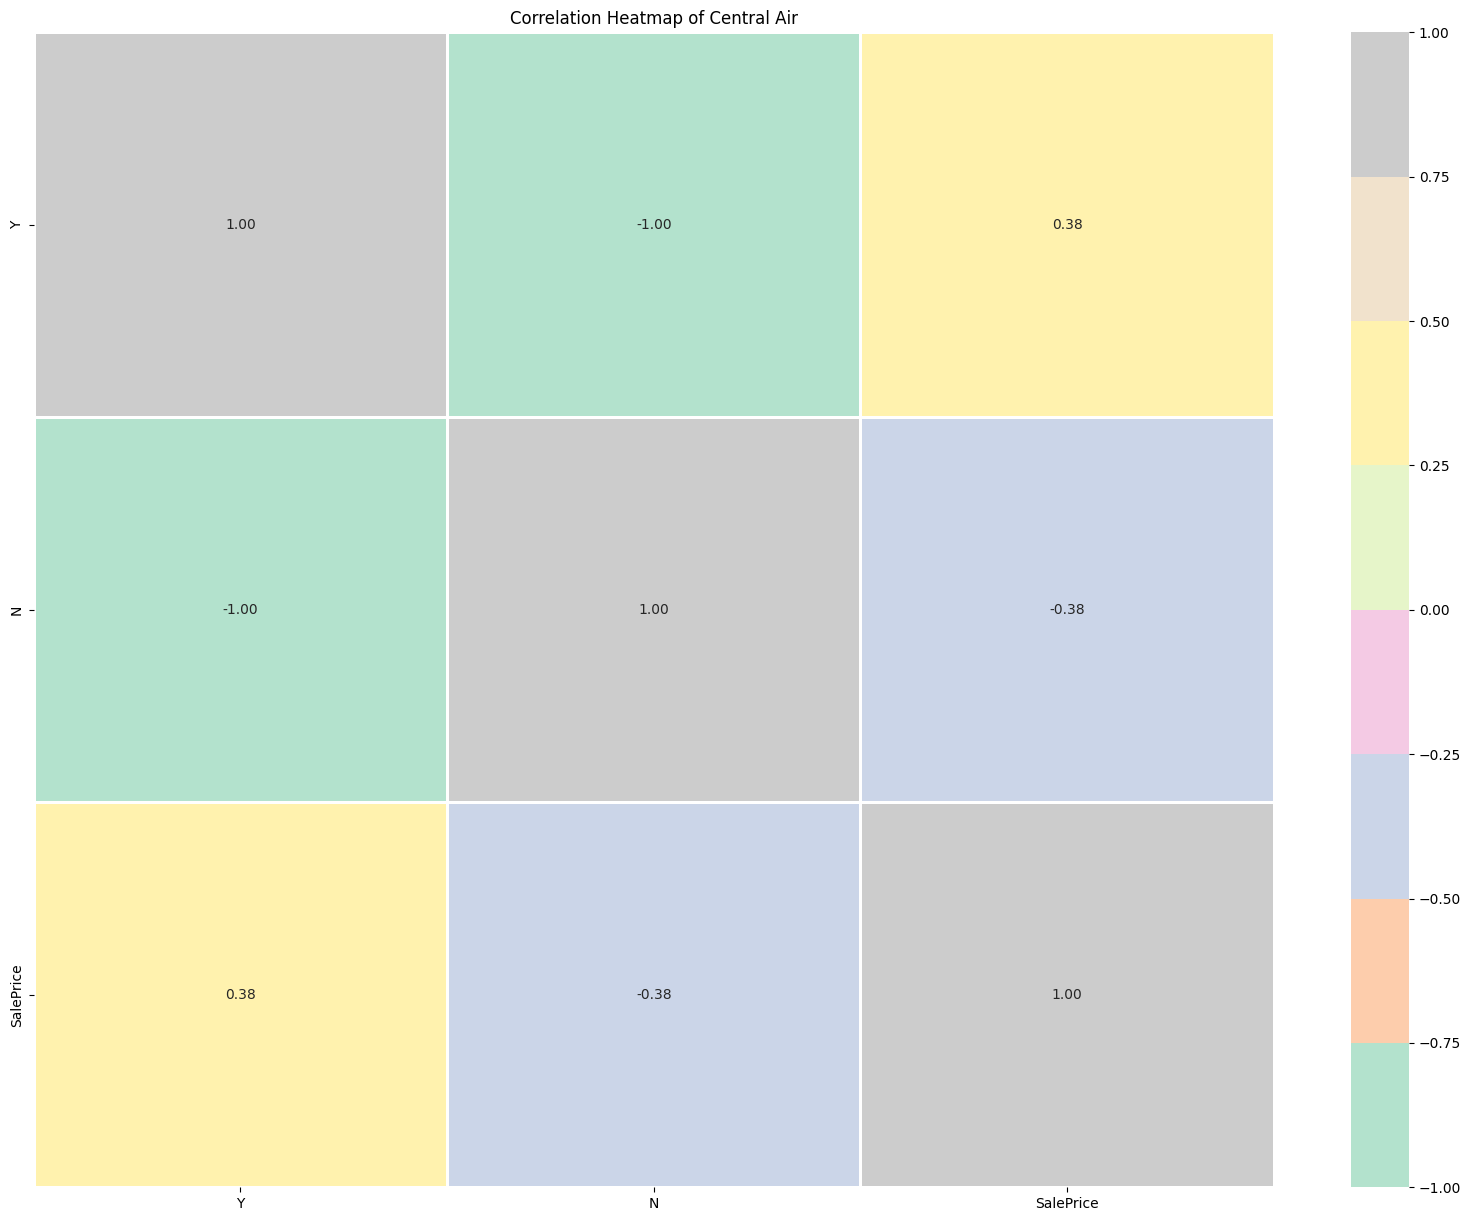

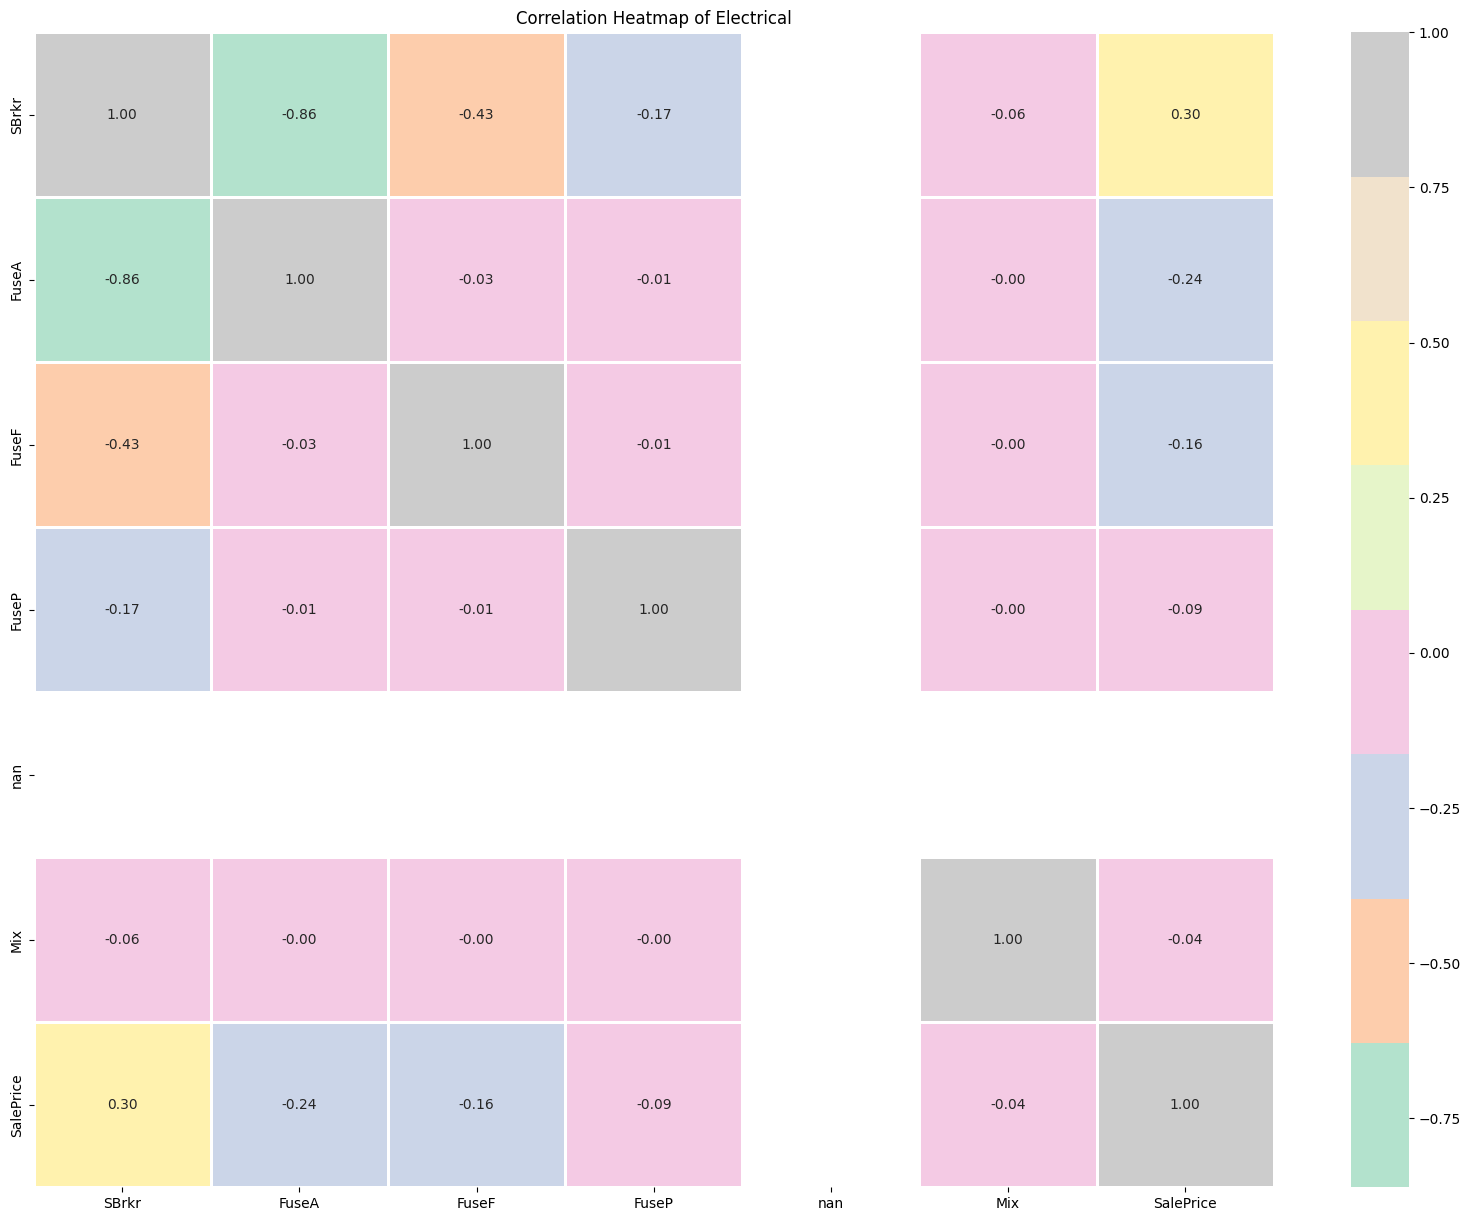

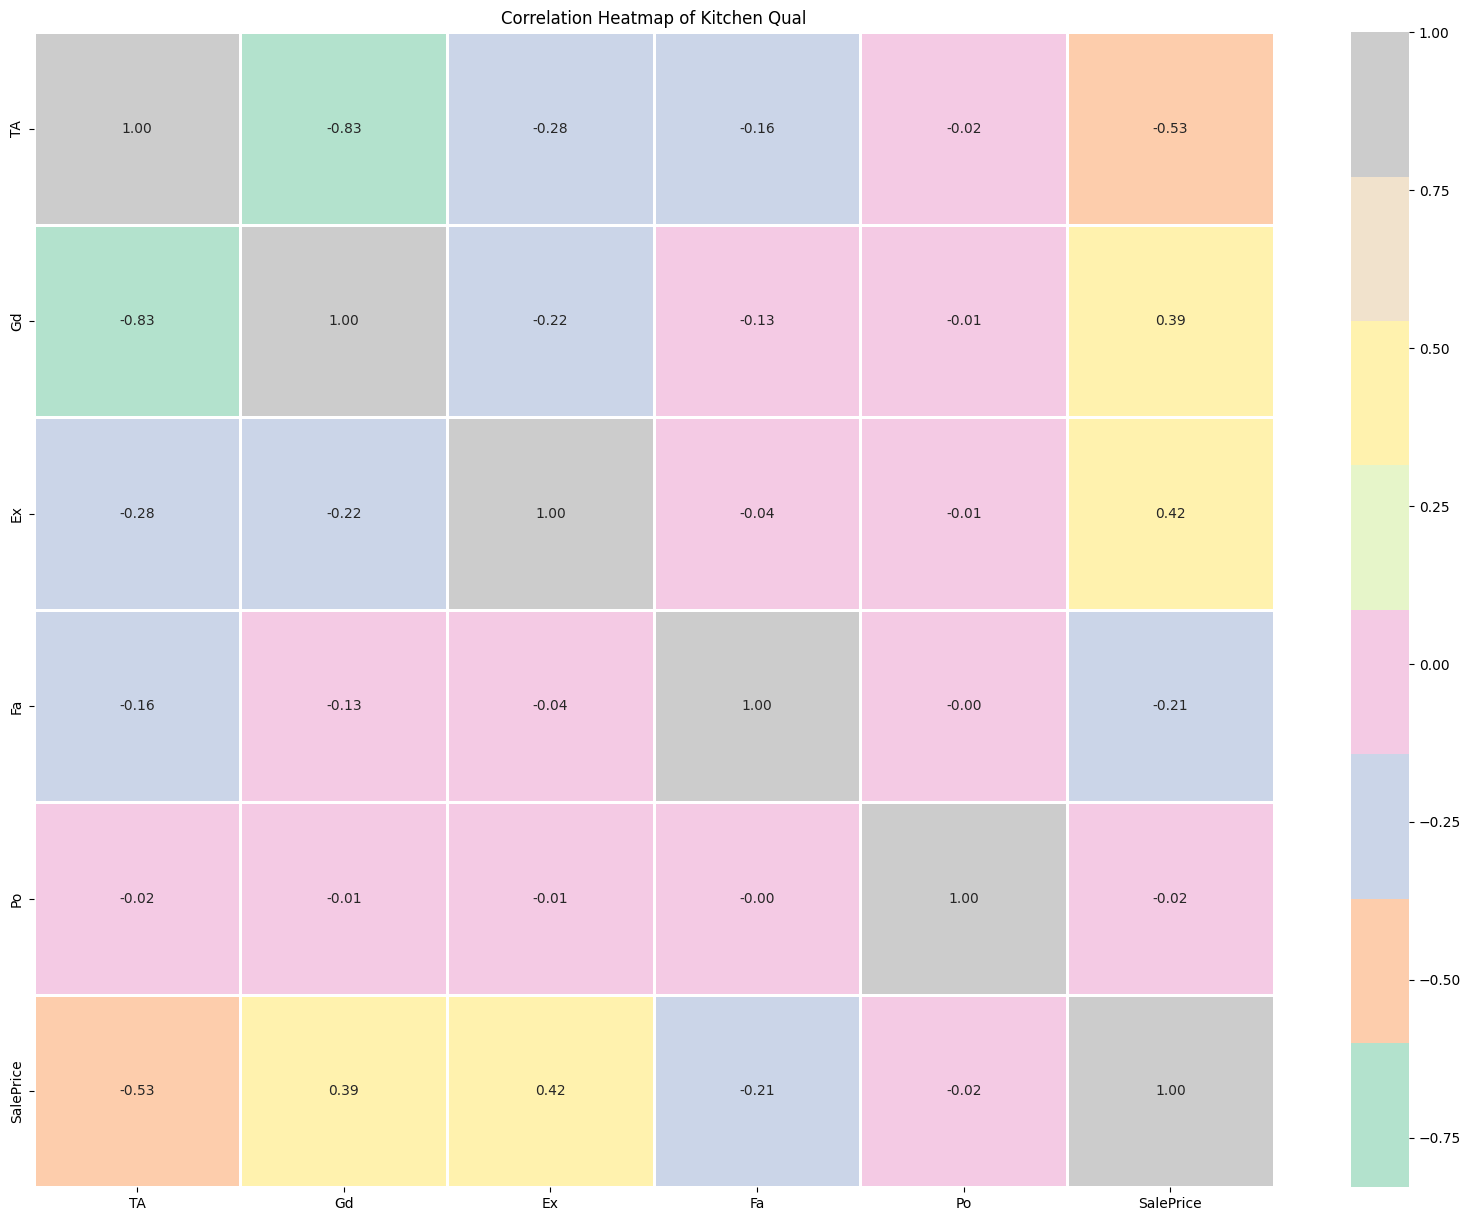

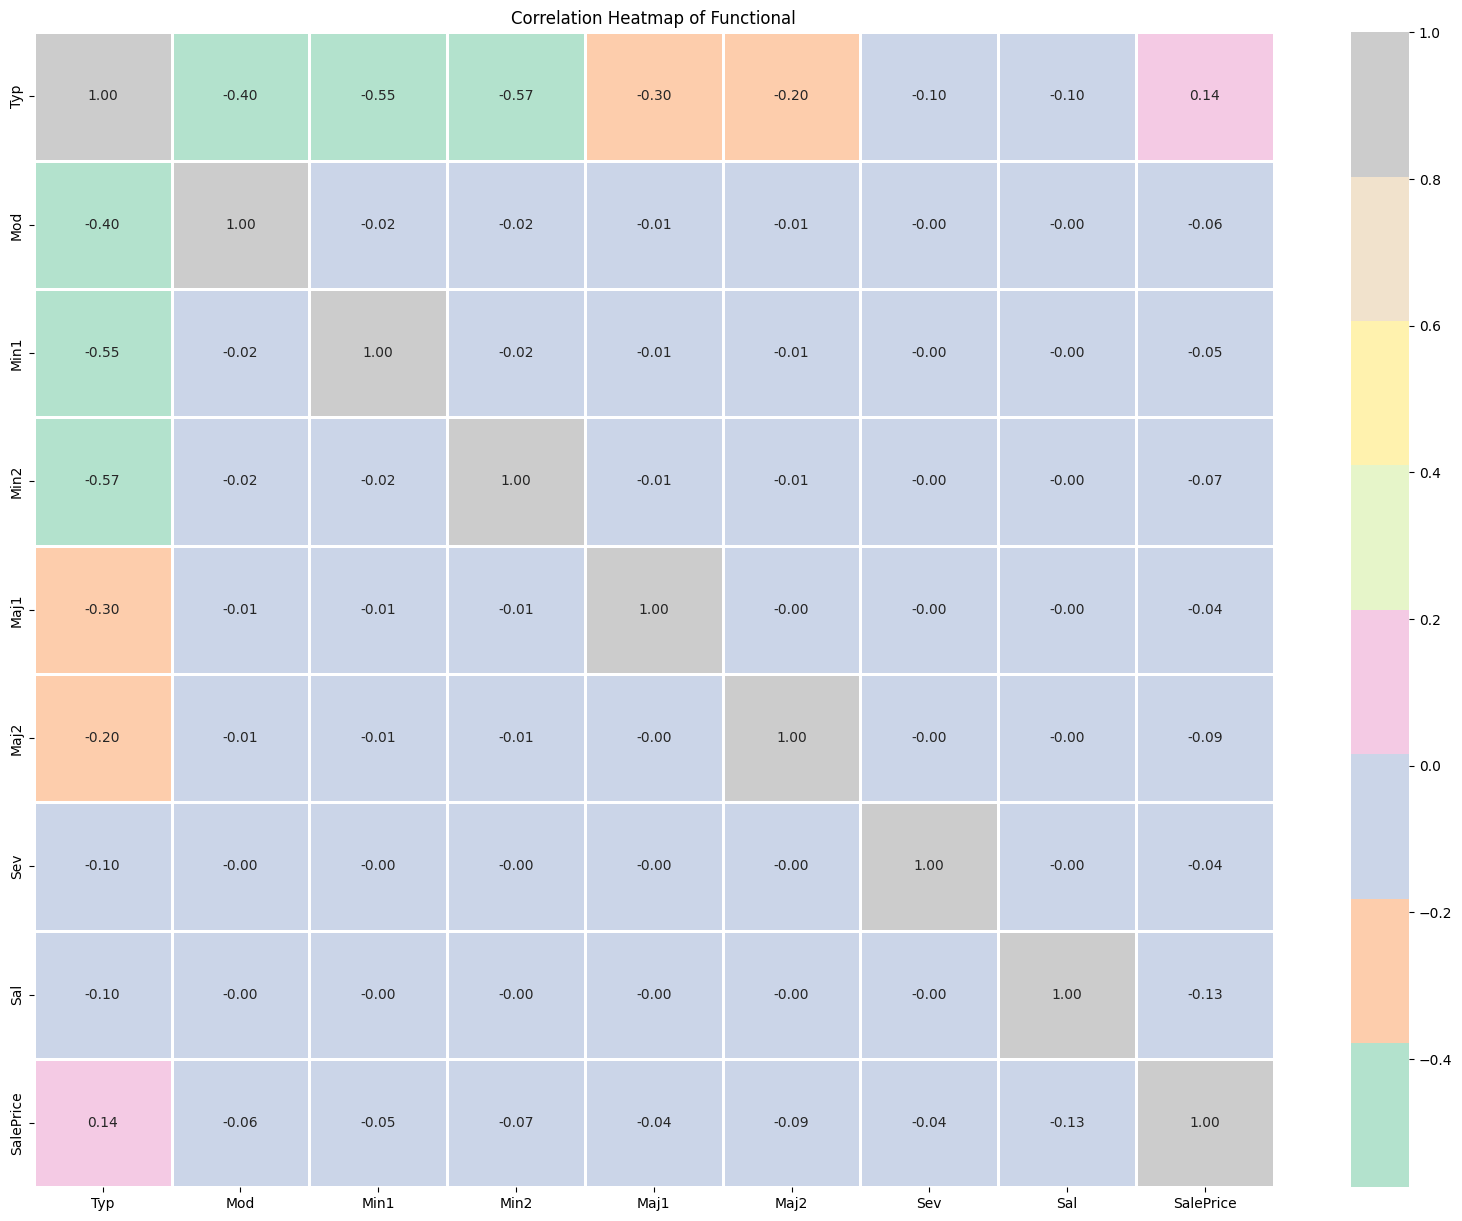

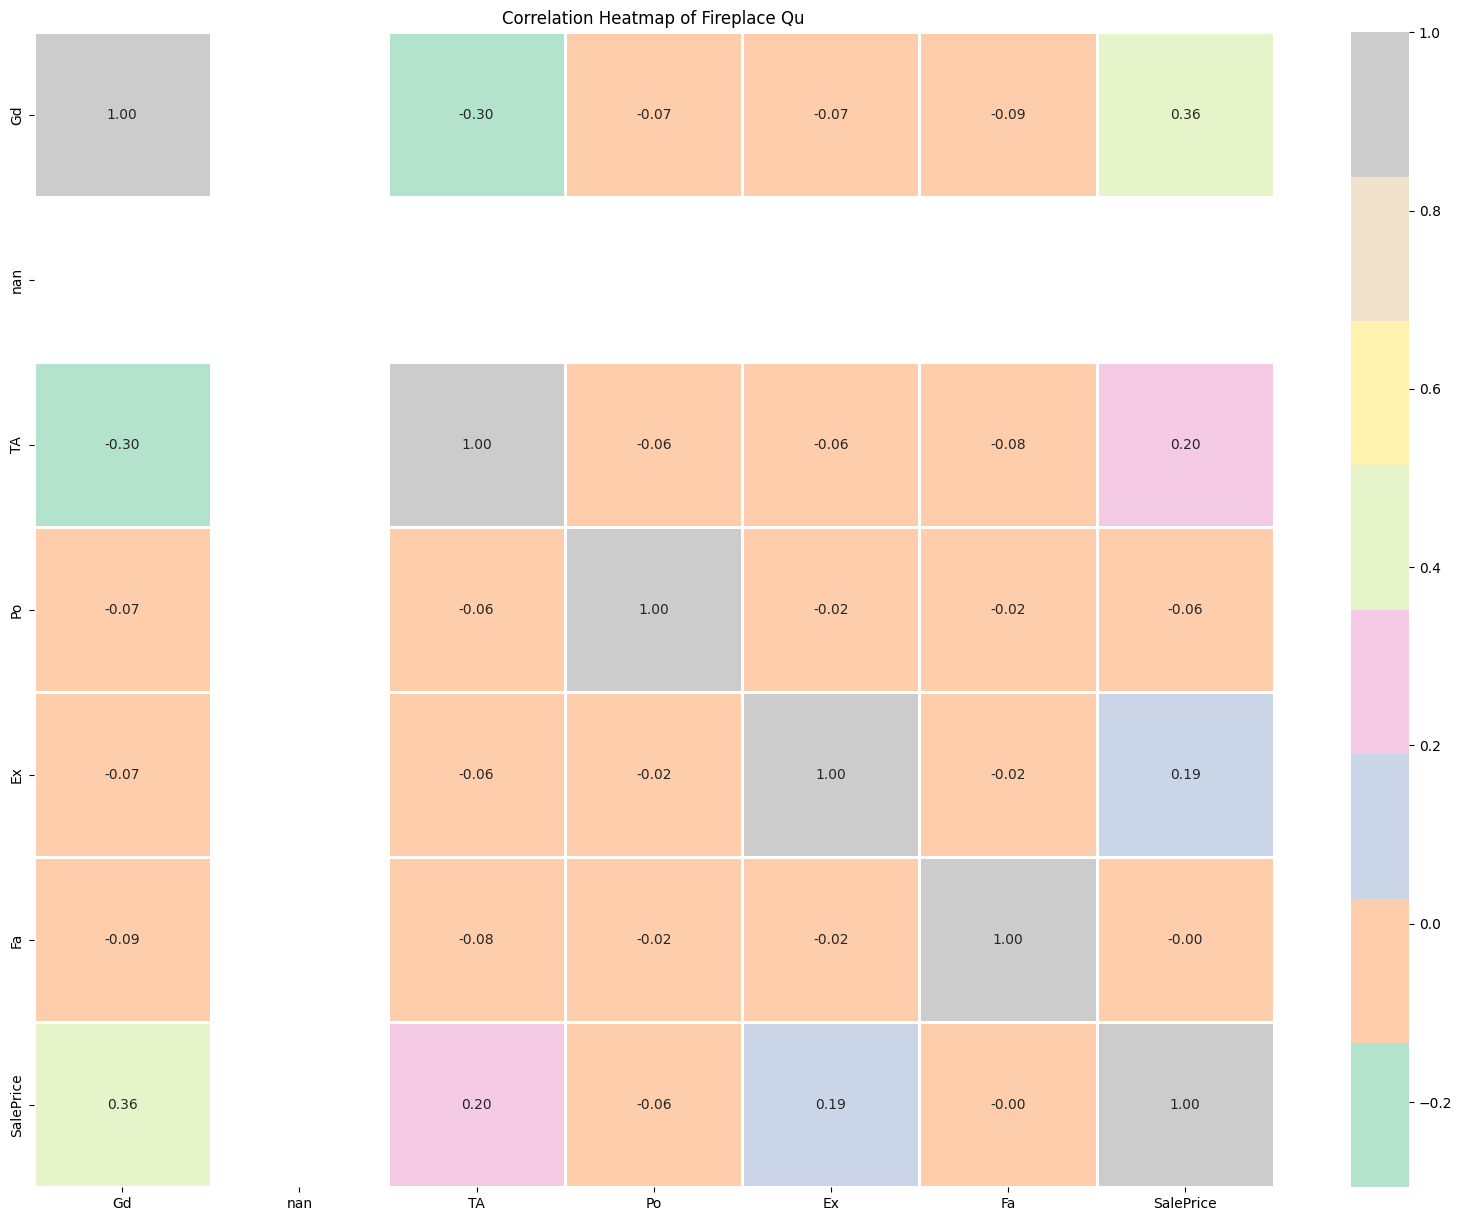

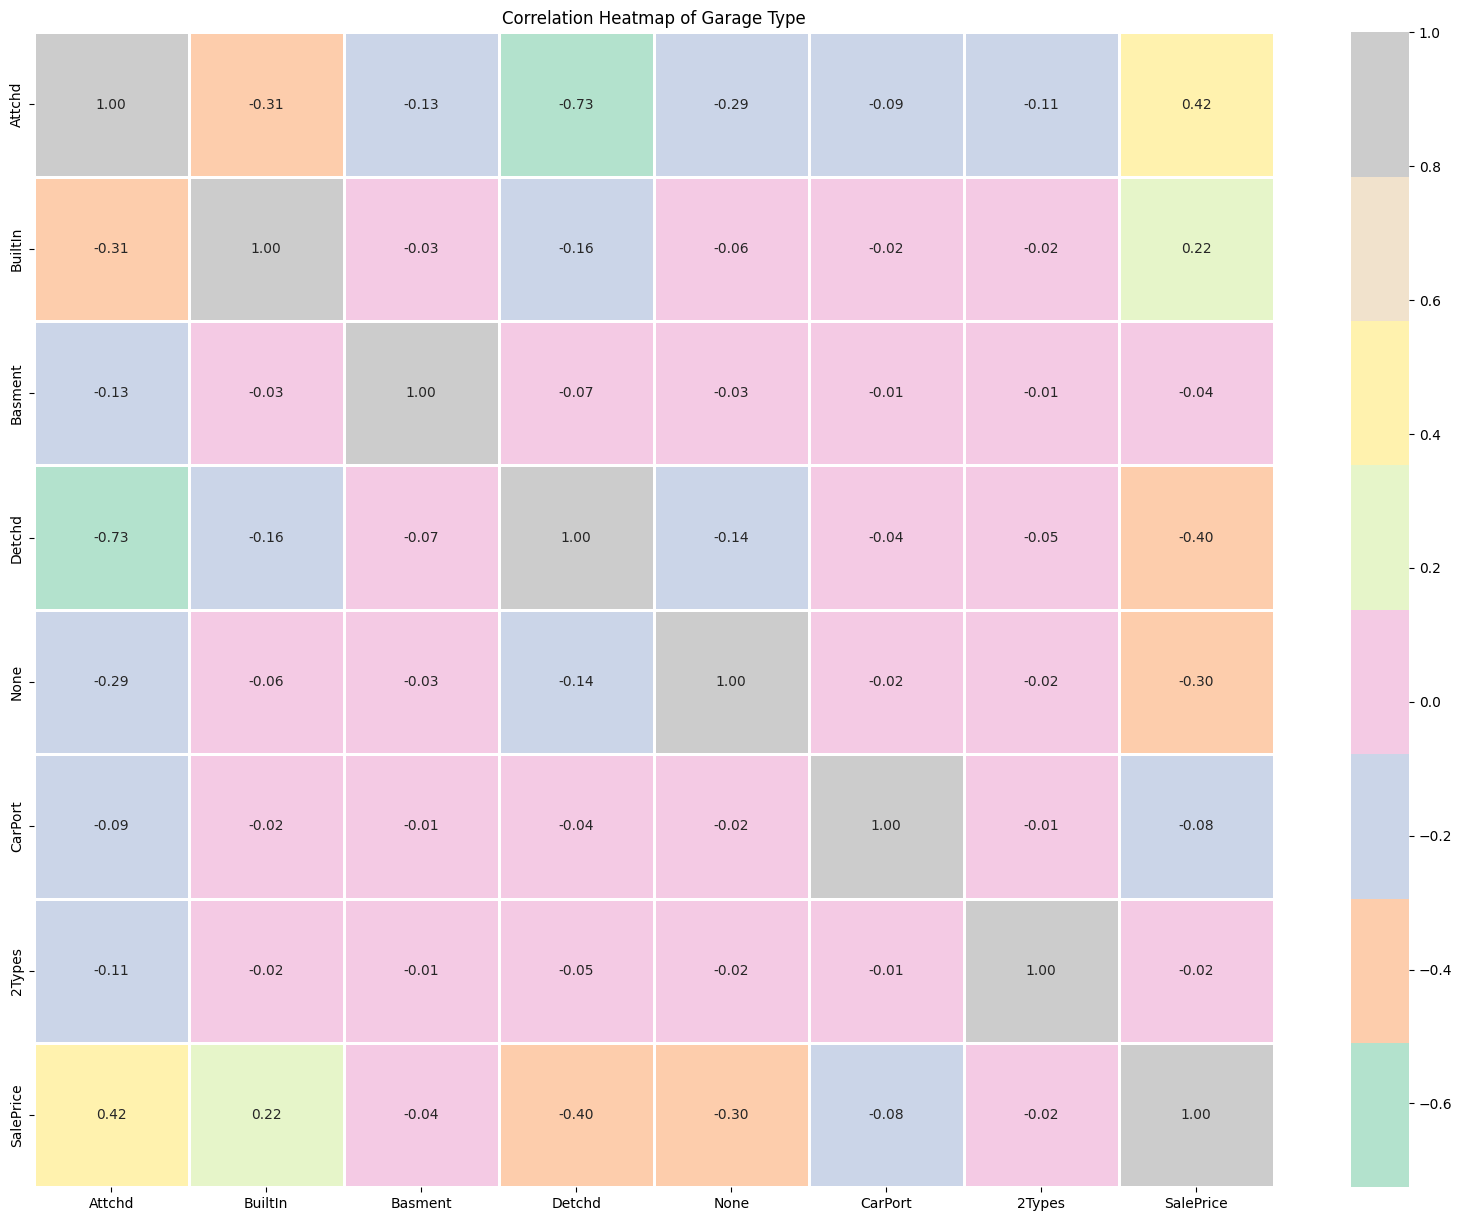

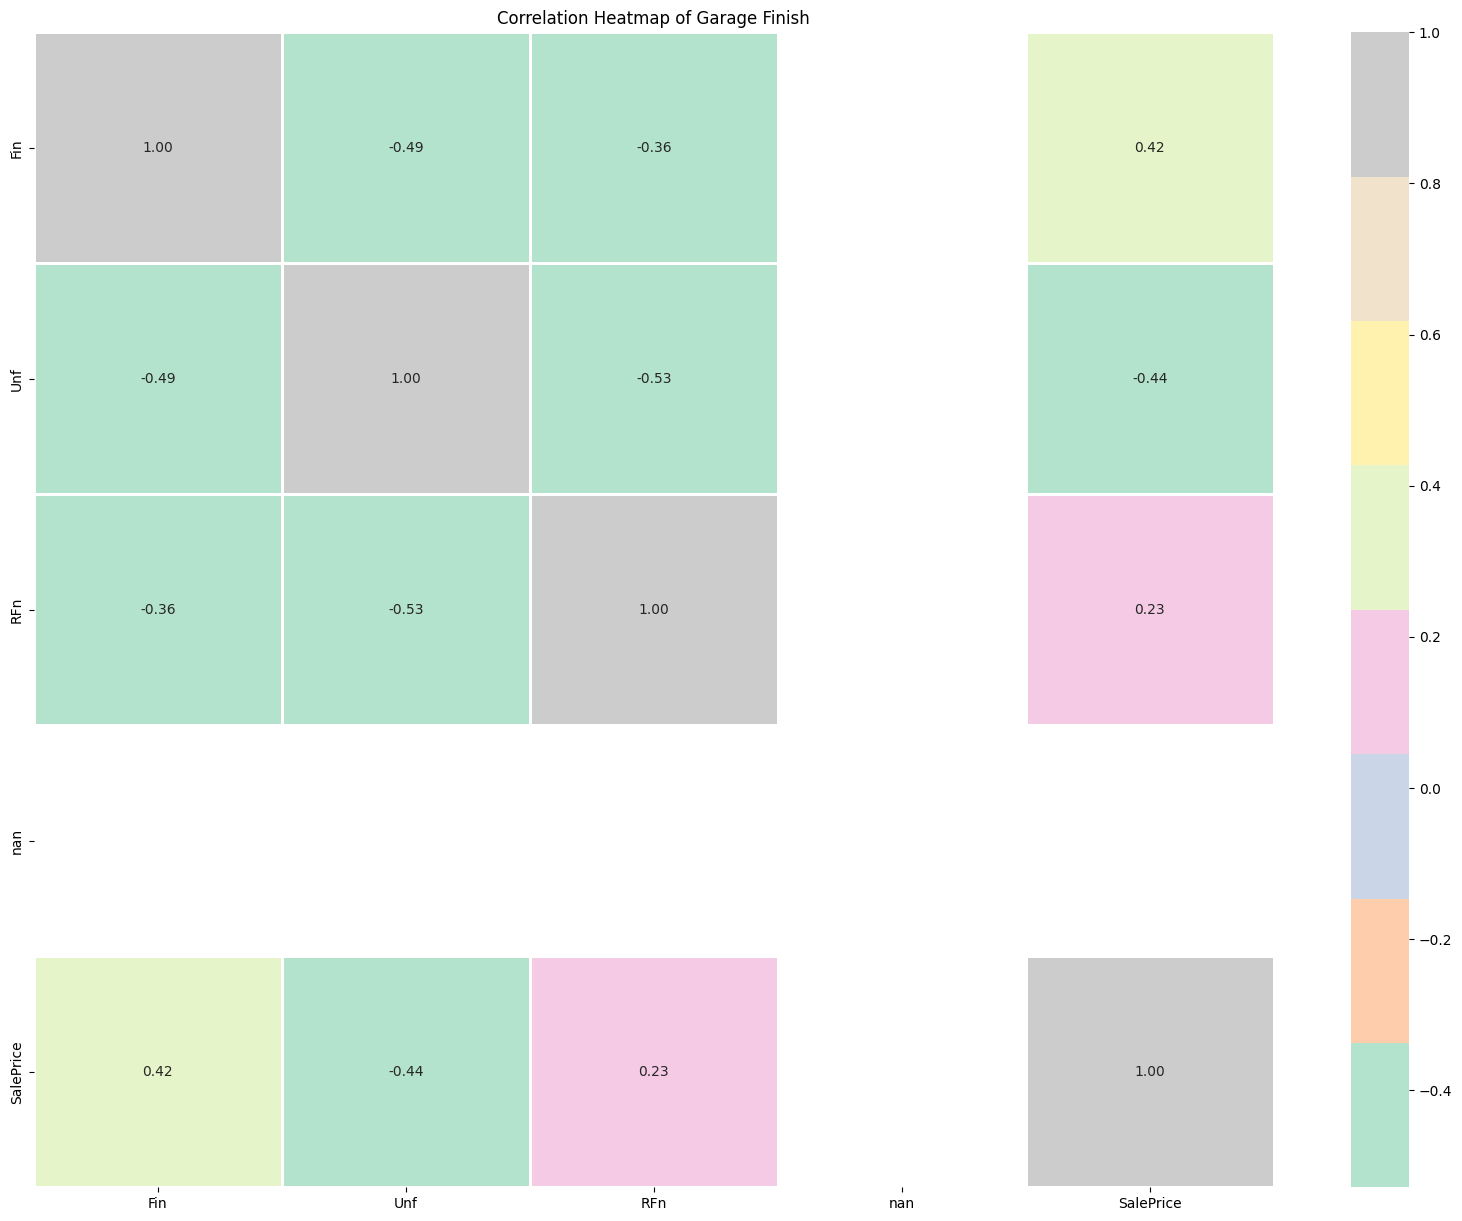

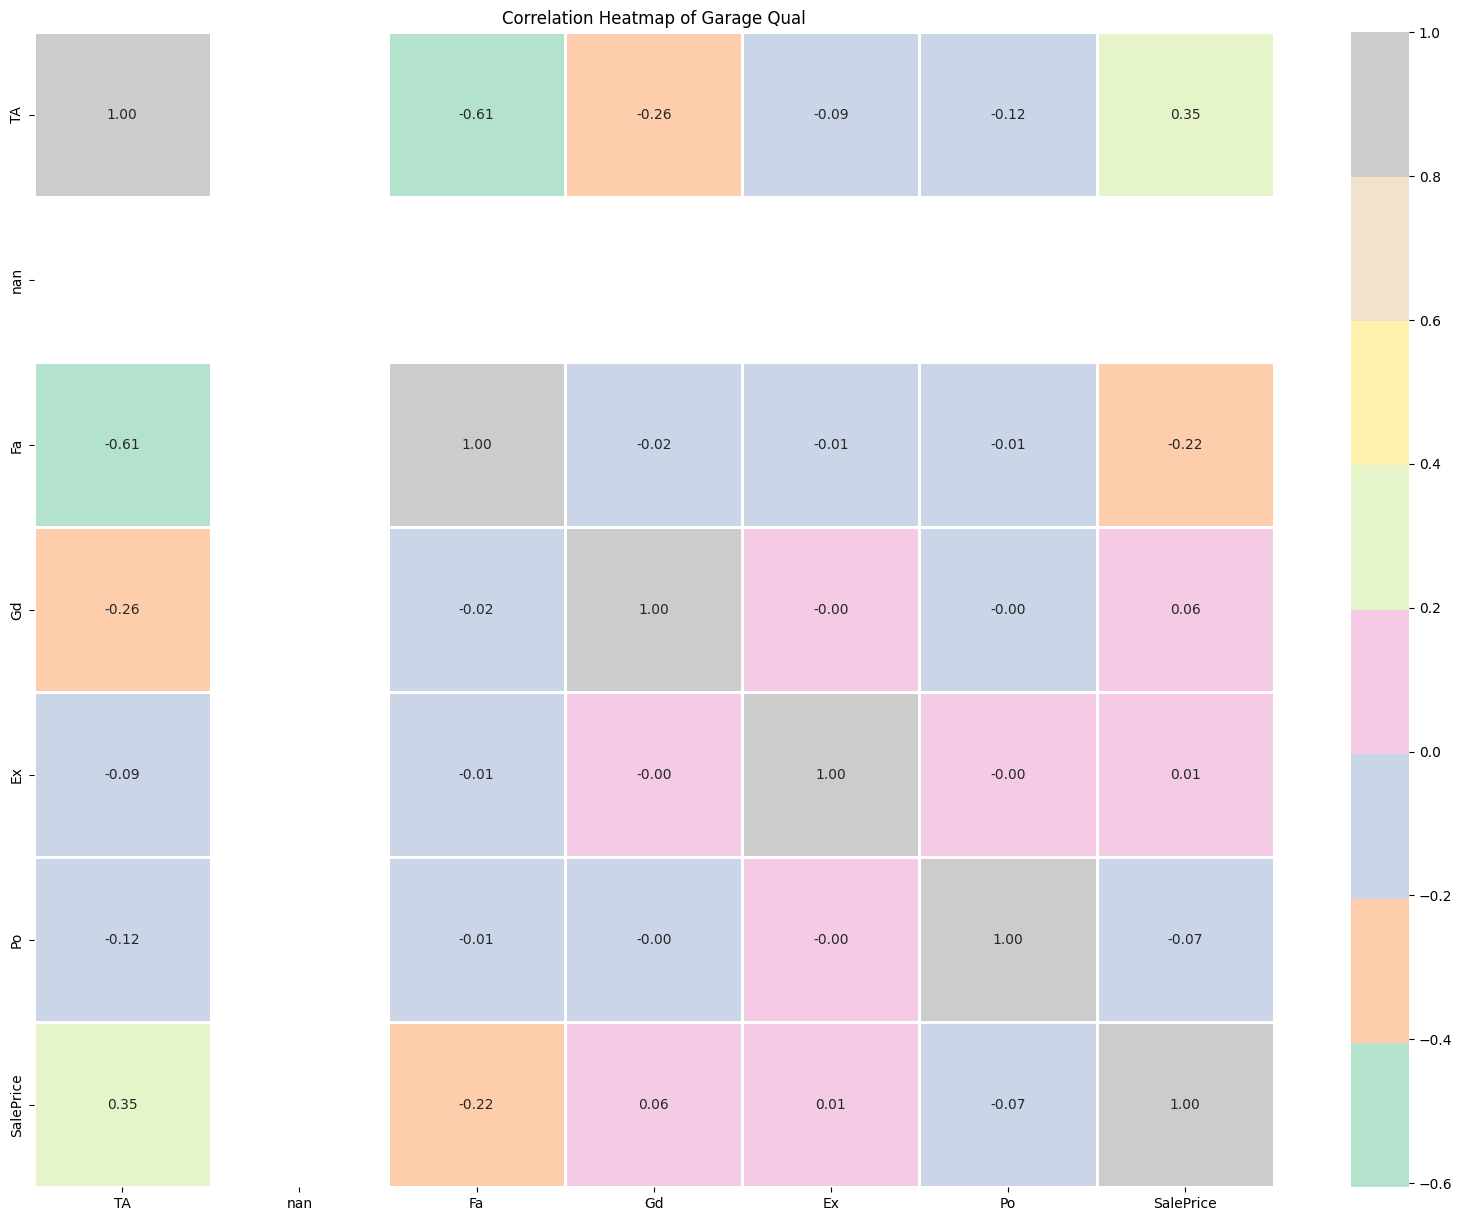

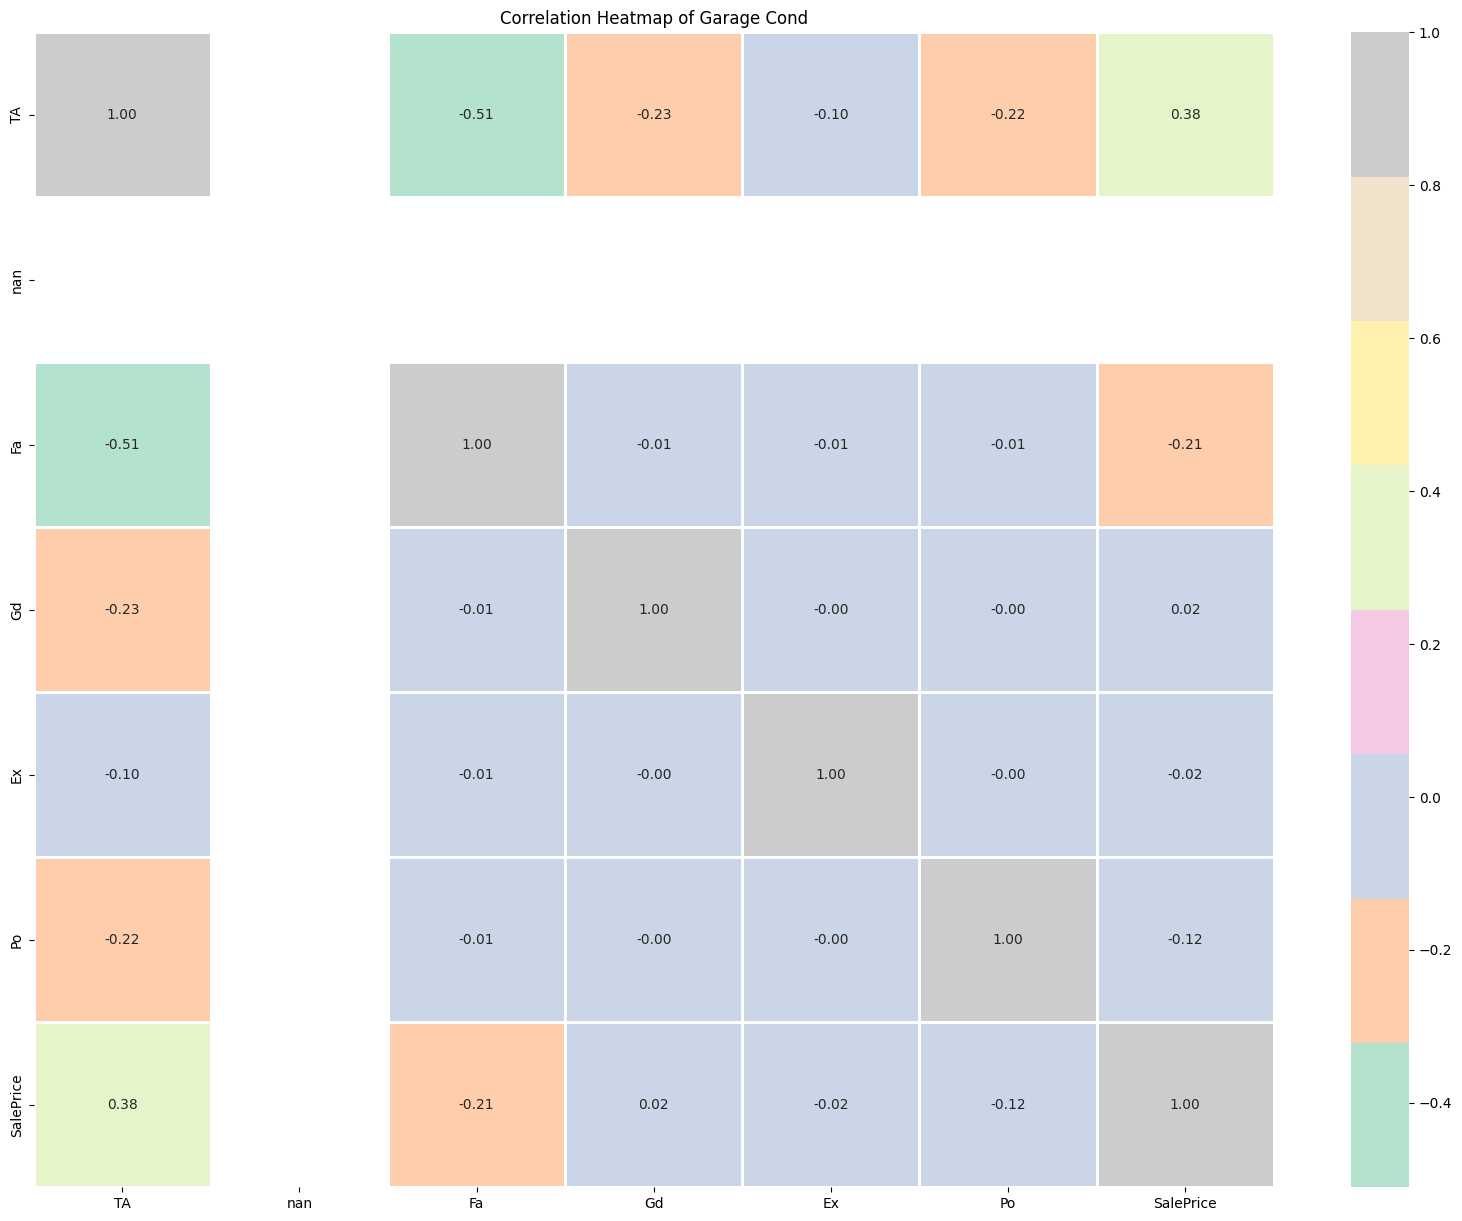

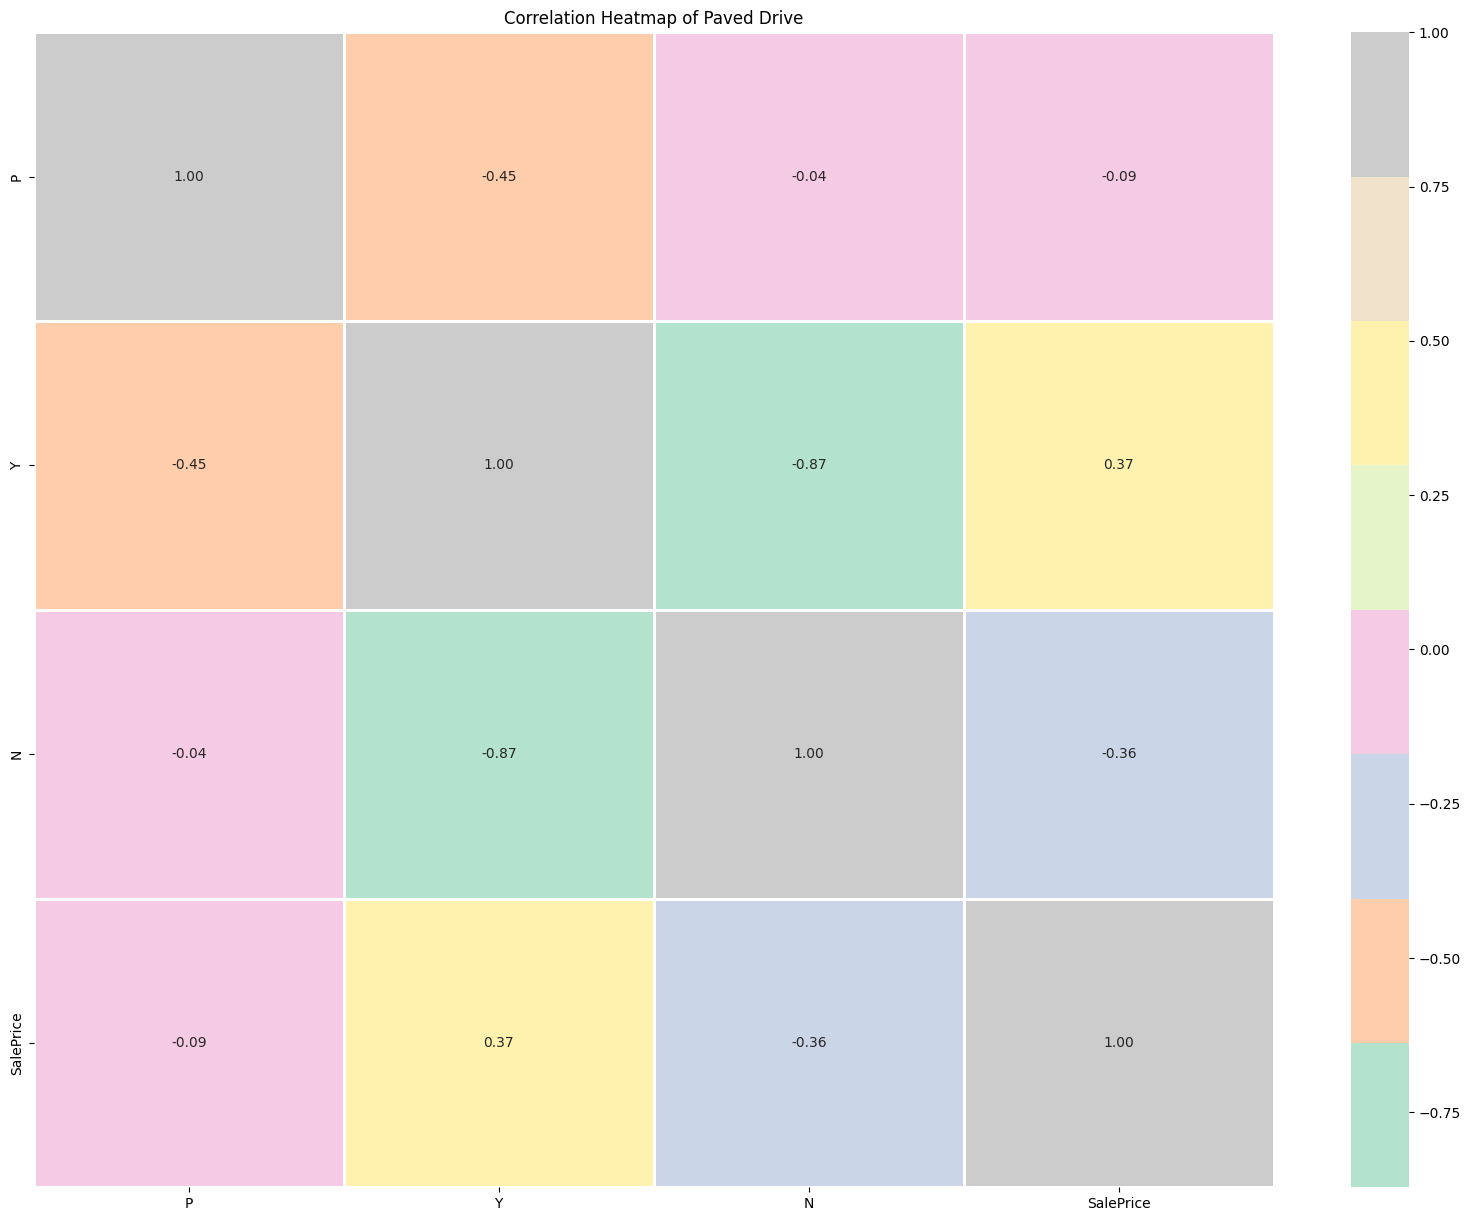

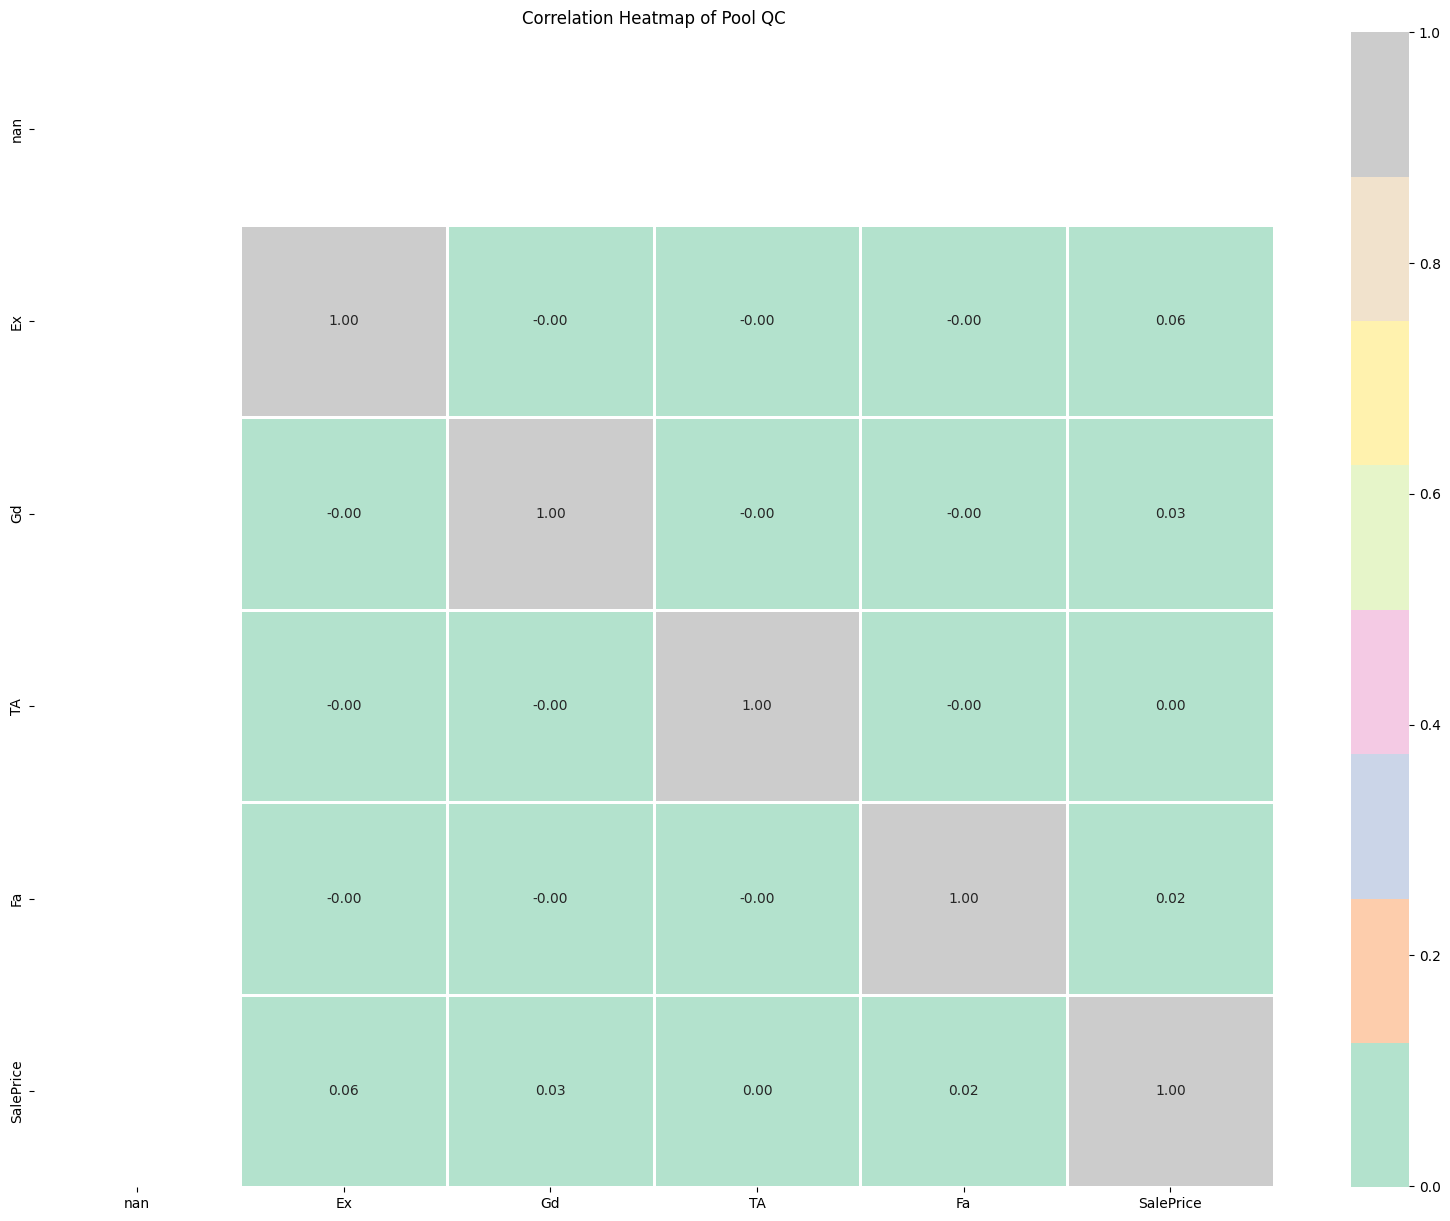

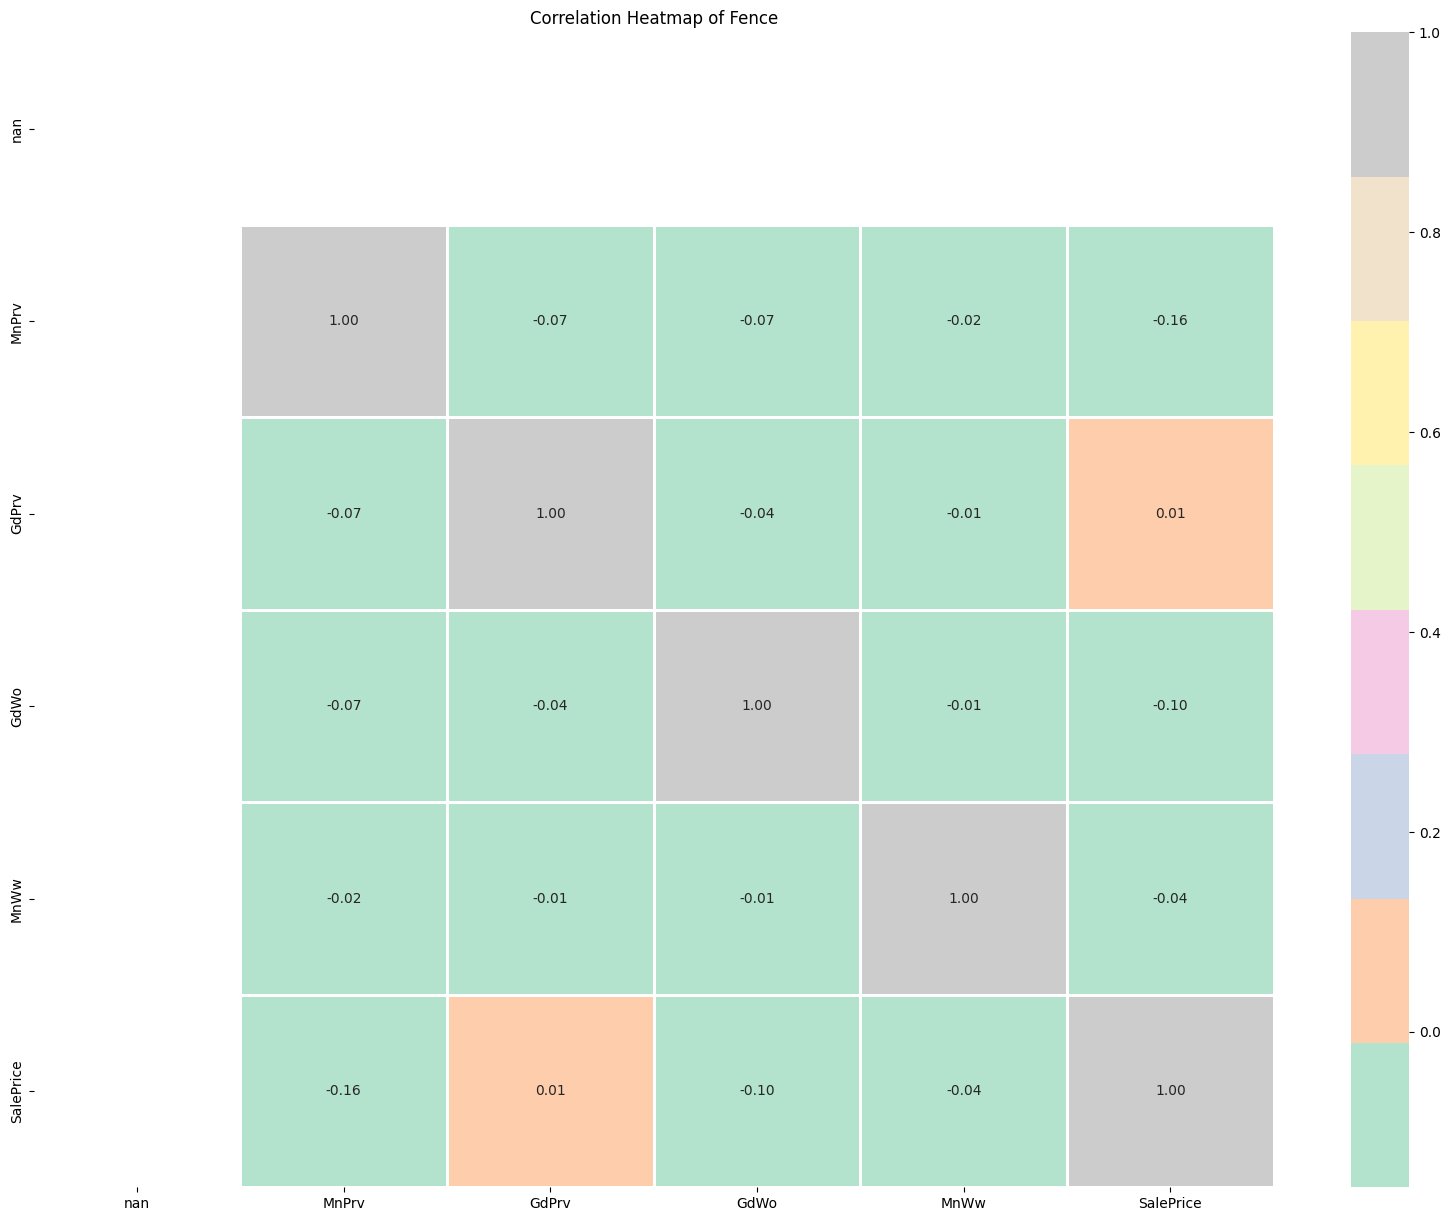

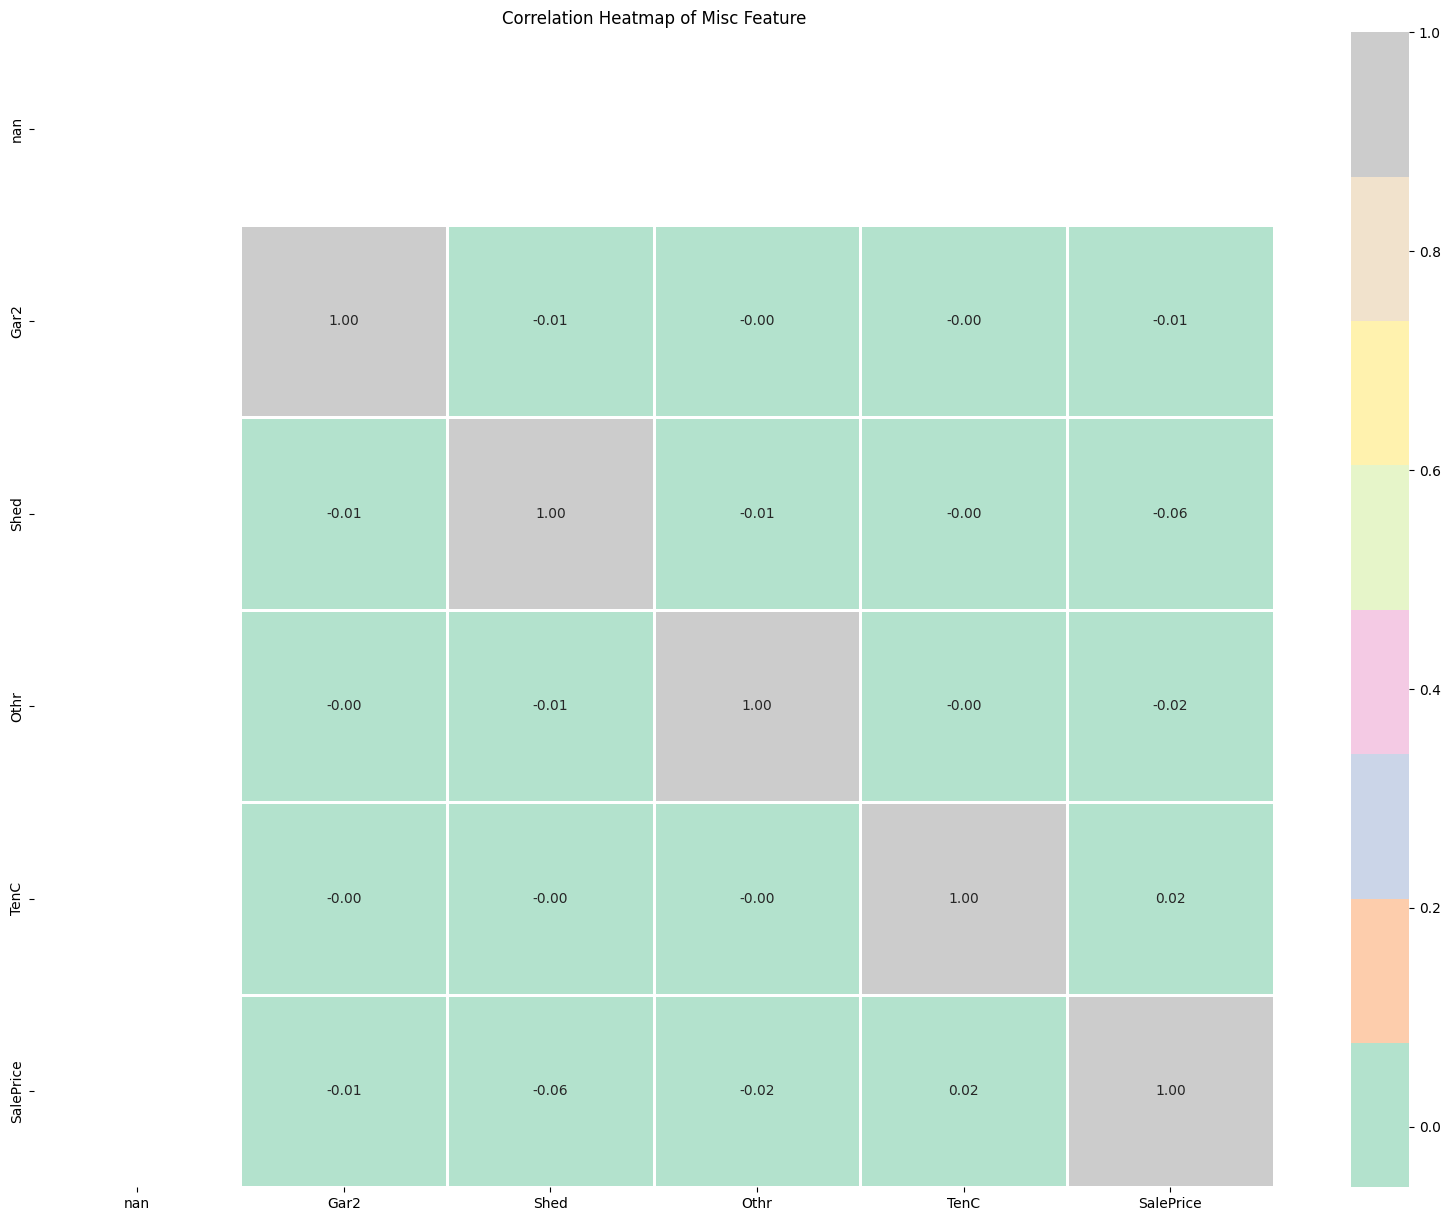

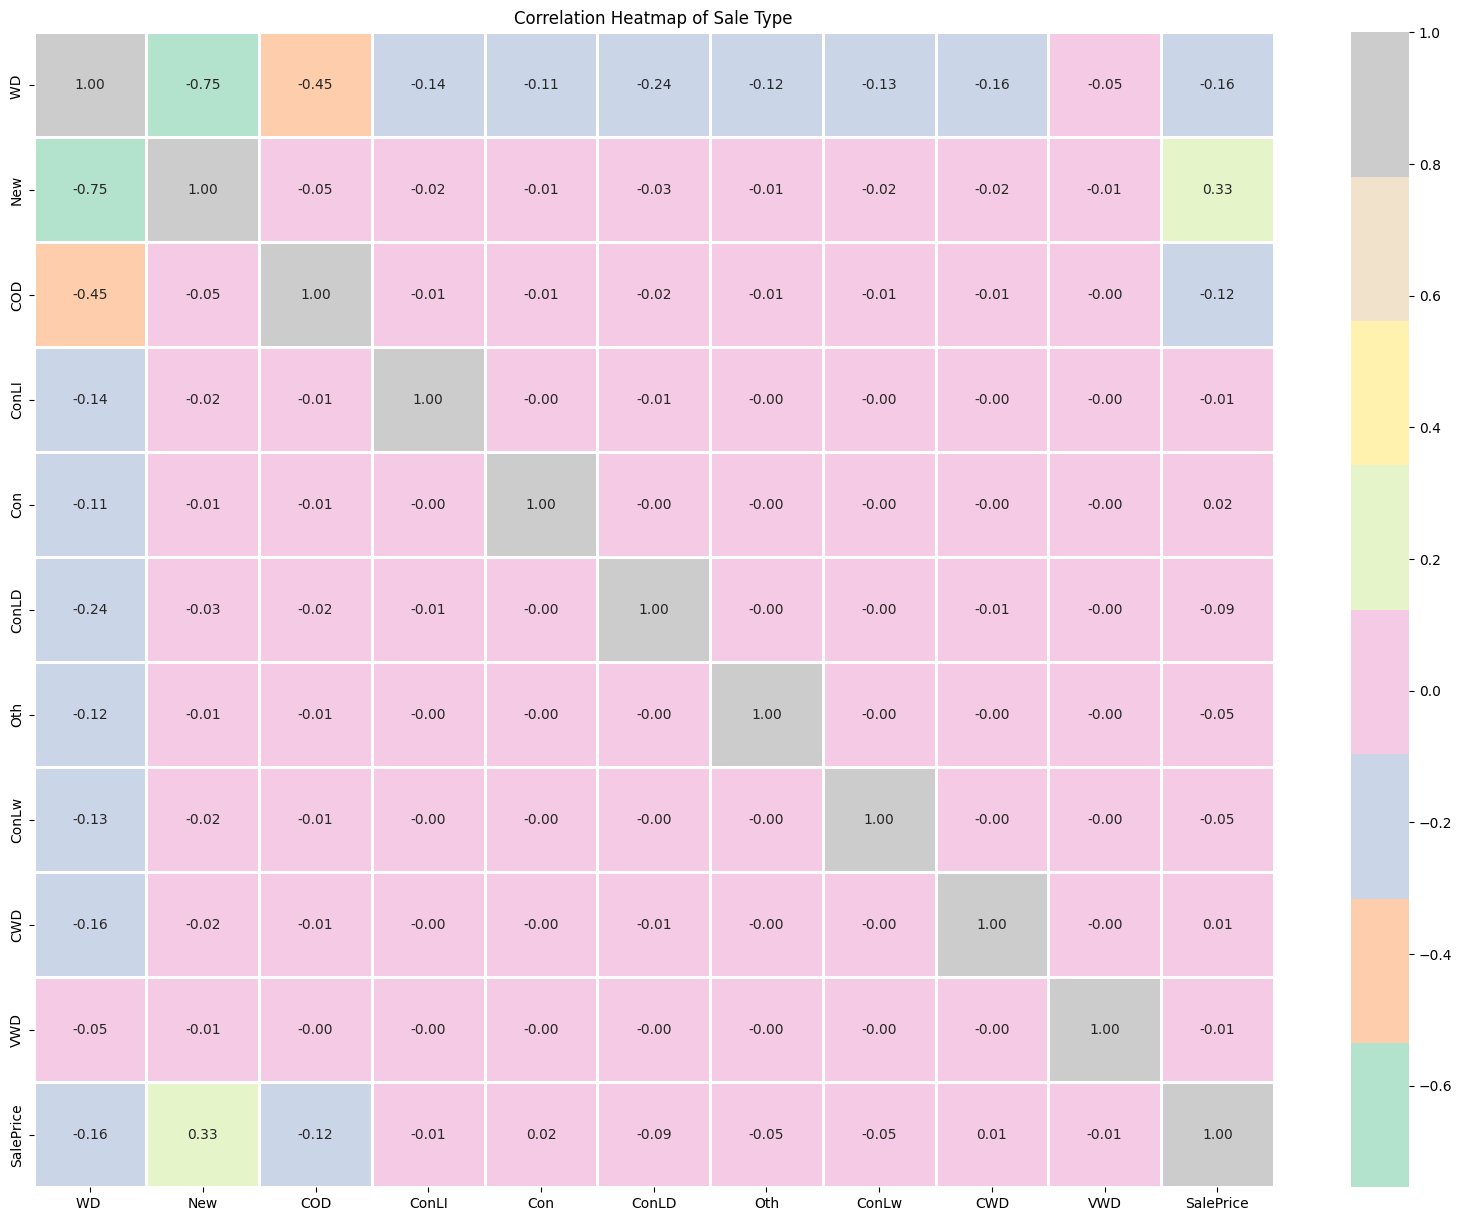

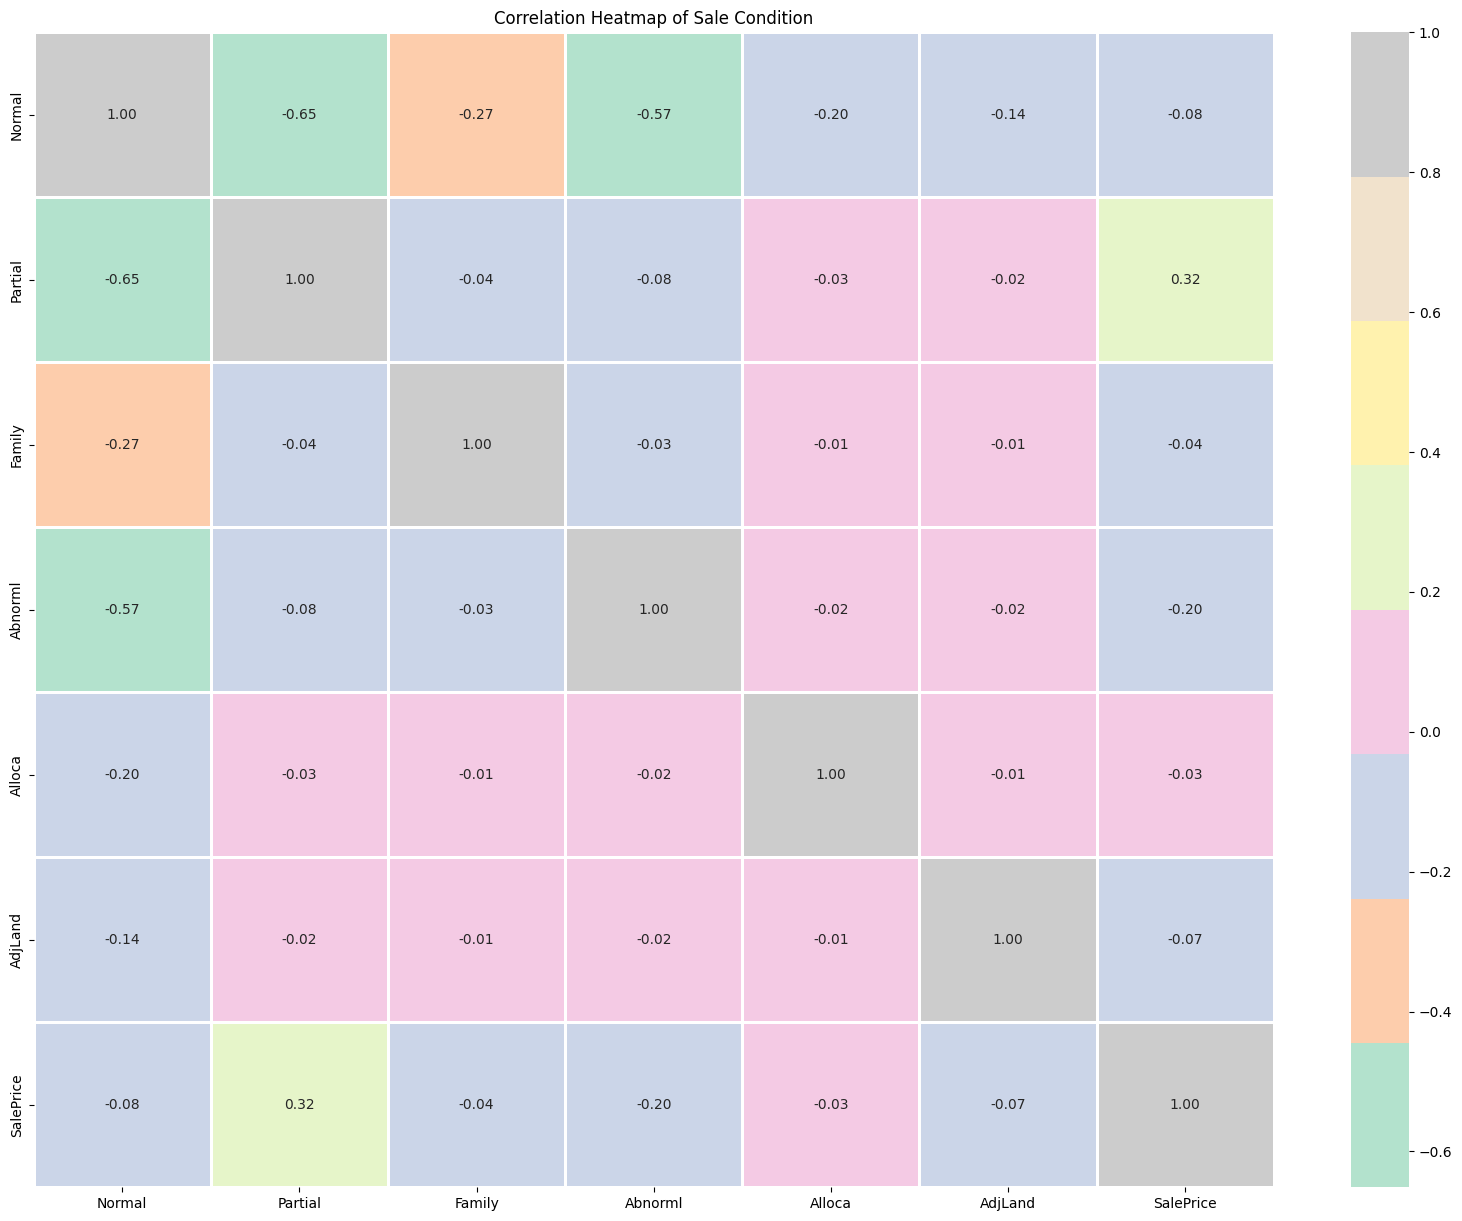

In [9]:
# Draw correlation matrix for all columns with categorical features
for column in data.columns:
    if data[column].dtype == object:
        encoding = apply_onehot_encoding(data[column])
        encoding["SalePrice"] = data["SalePrice"]
        draw_correlation_matrix(encoding, figsize=(20, 15), title="Correlation Heatmap of " + column)